In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score

from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV  #Perforing grid search

from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem.snowball import SnowballStemmer

import re 

In [2]:
sample = pd.read_csv("sample_submission.csv",encoding = "ISO-8859-1")
sample.head(2)

,id,target
0,0,0
1,2,0


In [3]:
train_limpio = pd.read_csv("train_limpio_con_BOW_de_5000_y_Stemming_2.csv",encoding = "ISO-8859-1")
train_limpio.head(2)

,aa,ab,aba,abandon,abbott,abbswinston,abc,abcnew,abe,abil,...,wildfir-keyword,windstorm-keyword,wound-keyword,wreck-keyword,wreckag-keyword,isRealPlace,longitud_tweet,letras_seguidas,sentimiento,objetividad
0,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,70,2,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,40,1,0.1,0.4


In [4]:
test_limpio = pd.read_csv("test_limpio_con_BOW_de_5000_y_Stemming_2.csv",encoding = "ISO-8859-1")
test_limpio.head()

,aa,ab,aba,abandon,abbott,abbswinston,abc,abcnew,abe,abil,...,wildfir-keyword,windstorm-keyword,wound-keyword,wreck-keyword,wreckag-keyword,isRealPlace,longitud_tweet,letras_seguidas,sentimiento,objetividad
0,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,40,2,-1.00,1.00
1,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,70,2,0.25,0.55
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,100,2,0.00,0.00
3,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,40,1,0.00,0.00
4,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,50,2,0.00,0.00


In [5]:
train_y=train_limpio.target

In [6]:
train_limpio = train_limpio.drop(columns = ['target'])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(train_limpio, train_y, test_size=0.2)

In [26]:
cb = CatBoostClassifier()
cb.fit(x_train, y_train)

Learning rate set to 0.022283
0:	learn: 0.6900142	total: 45.2ms	remaining: 45.1s
1:	learn: 0.6870259	total: 109ms	remaining: 54.5s
2:	learn: 0.6841781	total: 161ms	remaining: 53.4s
3:	learn: 0.6811582	total: 212ms	remaining: 52.7s
4:	learn: 0.6782844	total: 257ms	remaining: 51.1s
5:	learn: 0.6755300	total: 302ms	remaining: 50.1s
6:	learn: 0.6729850	total: 365ms	remaining: 51.7s
7:	learn: 0.6707640	total: 410ms	remaining: 50.9s
8:	learn: 0.6678724	total: 457ms	remaining: 50.3s
9:	learn: 0.6653045	total: 508ms	remaining: 50.3s
10:	learn: 0.6628838	total: 553ms	remaining: 49.8s
11:	learn: 0.6606050	total: 624ms	remaining: 51.3s
12:	learn: 0.6585272	total: 669ms	remaining: 50.8s
13:	learn: 0.6563926	total: 741ms	remaining: 52.2s
14:	learn: 0.6545711	total: 800ms	remaining: 52.5s
15:	learn: 0.6525064	total: 855ms	remaining: 52.6s
16:	learn: 0.6505449	total: 932ms	remaining: 53.9s
17:	learn: 0.6490989	total: 992ms	remaining: 54.1s
18:	learn: 0.6472168	total: 1.04s	remaining: 53.6s
19:	learn:

165:	learn: 0.5415383	total: 8.29s	remaining: 41.7s
166:	learn: 0.5411703	total: 8.34s	remaining: 41.6s
167:	learn: 0.5407647	total: 8.38s	remaining: 41.5s
168:	learn: 0.5403461	total: 8.42s	remaining: 41.4s
169:	learn: 0.5400103	total: 8.47s	remaining: 41.3s
170:	learn: 0.5396522	total: 8.53s	remaining: 41.4s
171:	learn: 0.5393772	total: 8.58s	remaining: 41.3s
172:	learn: 0.5389593	total: 8.63s	remaining: 41.2s
173:	learn: 0.5387008	total: 8.67s	remaining: 41.2s
174:	learn: 0.5383748	total: 8.72s	remaining: 41.1s
175:	learn: 0.5381153	total: 8.78s	remaining: 41.1s
176:	learn: 0.5378024	total: 8.82s	remaining: 41s
177:	learn: 0.5374894	total: 8.87s	remaining: 40.9s
178:	learn: 0.5371888	total: 8.91s	remaining: 40.9s
179:	learn: 0.5367636	total: 8.96s	remaining: 40.8s
180:	learn: 0.5363064	total: 9.02s	remaining: 40.8s
181:	learn: 0.5359332	total: 9.06s	remaining: 40.7s
182:	learn: 0.5354654	total: 9.11s	remaining: 40.7s
183:	learn: 0.5350180	total: 9.15s	remaining: 40.6s
184:	learn: 0.

325:	learn: 0.4981136	total: 16s	remaining: 33s
326:	learn: 0.4979357	total: 16s	remaining: 33s
327:	learn: 0.4977371	total: 16.1s	remaining: 32.9s
328:	learn: 0.4975199	total: 16.1s	remaining: 32.8s
329:	learn: 0.4972220	total: 16.2s	remaining: 32.8s
330:	learn: 0.4970278	total: 16.2s	remaining: 32.8s
331:	learn: 0.4968496	total: 16.3s	remaining: 32.7s
332:	learn: 0.4966350	total: 16.3s	remaining: 32.6s
333:	learn: 0.4962910	total: 16.3s	remaining: 32.6s
334:	learn: 0.4960777	total: 16.4s	remaining: 32.5s
335:	learn: 0.4958599	total: 16.4s	remaining: 32.5s
336:	learn: 0.4955516	total: 16.5s	remaining: 32.4s
337:	learn: 0.4952929	total: 16.5s	remaining: 32.4s
338:	learn: 0.4950937	total: 16.6s	remaining: 32.3s
339:	learn: 0.4949051	total: 16.6s	remaining: 32.3s
340:	learn: 0.4946479	total: 16.7s	remaining: 32.2s
341:	learn: 0.4943998	total: 16.7s	remaining: 32.2s
342:	learn: 0.4941524	total: 16.8s	remaining: 32.1s
343:	learn: 0.4939848	total: 16.8s	remaining: 32.1s
344:	learn: 0.493729

484:	learn: 0.4611039	total: 23.6s	remaining: 25.1s
485:	learn: 0.4608980	total: 23.7s	remaining: 25.1s
486:	learn: 0.4606622	total: 23.7s	remaining: 25s
487:	learn: 0.4604867	total: 23.8s	remaining: 25s
488:	learn: 0.4602490	total: 23.8s	remaining: 24.9s
489:	learn: 0.4600271	total: 23.9s	remaining: 24.9s
490:	learn: 0.4597946	total: 23.9s	remaining: 24.8s
491:	learn: 0.4596118	total: 24s	remaining: 24.8s
492:	learn: 0.4593775	total: 24s	remaining: 24.7s
493:	learn: 0.4591028	total: 24.1s	remaining: 24.7s
494:	learn: 0.4588955	total: 24.1s	remaining: 24.6s
495:	learn: 0.4587188	total: 24.2s	remaining: 24.6s
496:	learn: 0.4585090	total: 24.2s	remaining: 24.5s
497:	learn: 0.4582409	total: 24.3s	remaining: 24.5s
498:	learn: 0.4580606	total: 24.3s	remaining: 24.4s
499:	learn: 0.4578541	total: 24.4s	remaining: 24.4s
500:	learn: 0.4576107	total: 24.4s	remaining: 24.3s
501:	learn: 0.4573324	total: 24.5s	remaining: 24.3s
502:	learn: 0.4570522	total: 24.5s	remaining: 24.2s
503:	learn: 0.456841

643:	learn: 0.4292619	total: 31.3s	remaining: 17.3s
644:	learn: 0.4291145	total: 31.4s	remaining: 17.3s
645:	learn: 0.4289297	total: 31.4s	remaining: 17.2s
646:	learn: 0.4288012	total: 31.5s	remaining: 17.2s
647:	learn: 0.4285964	total: 31.5s	remaining: 17.1s
648:	learn: 0.4284249	total: 31.6s	remaining: 17.1s
649:	learn: 0.4282545	total: 31.6s	remaining: 17s
650:	learn: 0.4280684	total: 31.7s	remaining: 17s
651:	learn: 0.4279101	total: 31.7s	remaining: 16.9s
652:	learn: 0.4277816	total: 31.7s	remaining: 16.9s
653:	learn: 0.4275675	total: 31.8s	remaining: 16.8s
654:	learn: 0.4273829	total: 31.8s	remaining: 16.8s
655:	learn: 0.4272579	total: 31.9s	remaining: 16.7s
656:	learn: 0.4270064	total: 31.9s	remaining: 16.7s
657:	learn: 0.4268021	total: 32s	remaining: 16.6s
658:	learn: 0.4265919	total: 32s	remaining: 16.6s
659:	learn: 0.4264635	total: 32.1s	remaining: 16.5s
660:	learn: 0.4262956	total: 32.1s	remaining: 16.5s
661:	learn: 0.4261029	total: 32.2s	remaining: 16.4s
662:	learn: 0.425923

803:	learn: 0.4039276	total: 39s	remaining: 9.5s
804:	learn: 0.4037163	total: 39s	remaining: 9.45s
805:	learn: 0.4035299	total: 39.1s	remaining: 9.4s
806:	learn: 0.4033671	total: 39.1s	remaining: 9.36s
807:	learn: 0.4032920	total: 39.2s	remaining: 9.3s
808:	learn: 0.4031344	total: 39.2s	remaining: 9.26s
809:	learn: 0.4030709	total: 39.3s	remaining: 9.21s
810:	learn: 0.4030202	total: 39.3s	remaining: 9.16s
811:	learn: 0.4028840	total: 39.3s	remaining: 9.11s
812:	learn: 0.4028256	total: 39.4s	remaining: 9.06s
813:	learn: 0.4026553	total: 39.4s	remaining: 9.01s
814:	learn: 0.4024744	total: 39.5s	remaining: 8.96s
815:	learn: 0.4022761	total: 39.5s	remaining: 8.91s
816:	learn: 0.4020995	total: 39.6s	remaining: 8.87s
817:	learn: 0.4019207	total: 39.6s	remaining: 8.82s
818:	learn: 0.4017703	total: 39.7s	remaining: 8.77s
819:	learn: 0.4015962	total: 39.7s	remaining: 8.72s
820:	learn: 0.4014983	total: 39.8s	remaining: 8.67s
821:	learn: 0.4013506	total: 39.8s	remaining: 8.62s
822:	learn: 0.40114

962:	learn: 0.3847883	total: 46.6s	remaining: 1.79s
963:	learn: 0.3847369	total: 46.6s	remaining: 1.74s
964:	learn: 0.3846290	total: 46.7s	remaining: 1.69s
965:	learn: 0.3845741	total: 46.7s	remaining: 1.65s
966:	learn: 0.3844549	total: 46.8s	remaining: 1.6s
967:	learn: 0.3843241	total: 46.8s	remaining: 1.55s
968:	learn: 0.3843042	total: 46.9s	remaining: 1.5s
969:	learn: 0.3842282	total: 46.9s	remaining: 1.45s
970:	learn: 0.3840361	total: 47s	remaining: 1.4s
971:	learn: 0.3839096	total: 47s	remaining: 1.35s
972:	learn: 0.3837881	total: 47.1s	remaining: 1.31s
973:	learn: 0.3837501	total: 47.1s	remaining: 1.26s
974:	learn: 0.3835912	total: 47.2s	remaining: 1.21s
975:	learn: 0.3834476	total: 47.2s	remaining: 1.16s
976:	learn: 0.3834290	total: 47.3s	remaining: 1.11s
977:	learn: 0.3834051	total: 47.3s	remaining: 1.06s
978:	learn: 0.3833848	total: 47.4s	remaining: 1.02s
979:	learn: 0.3832190	total: 47.4s	remaining: 968ms
980:	learn: 0.3831736	total: 47.5s	remaining: 919ms
981:	learn: 0.38304

In [27]:
pred = cb.predict(x_train)
f1_score(y_train.values, pred, average='macro')

0.8596682605672774

In [28]:
pred = cb.predict(x_test)
f1_score(y_test.values, pred, average='macro')

0.7926243436962157

# Controlo con k-folds

In [31]:
kf = KFold(n_splits = 5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [20]:
training_error=[]
test_error=[]

for train_index,test_index in kf.split(train_limpio):
    x_train,x_test = train_limpio.loc[train_index], train_limpio.loc[test_index]
    y_train,y_test = train_y[train_index], train_y[test_index]
    
    cb = CatBoostClassifier()
    cb.fit(x_train, y_train)
    
    #error de entrenamiento:
    pred = cb.predict(x_train)
    training_error.append(f1_score(y_train.values, pred, average='macro'))
    
    
        
    #error de test:
    pred = cb.predict(x_test)
    test_error.append(f1_score(y_test.values, pred, average='macro'))
    
print('Error de entrenamiento:',training_error)
print('Error de test:',test_error)

Learning rate set to 0.022283
0:	learn: 0.6899575	total: 43.1ms	remaining: 43s
1:	learn: 0.6868479	total: 86.1ms	remaining: 43s
2:	learn: 0.6834430	total: 145ms	remaining: 48.1s
3:	learn: 0.6810630	total: 206ms	remaining: 51.3s
4:	learn: 0.6781019	total: 250ms	remaining: 49.8s
5:	learn: 0.6749550	total: 293ms	remaining: 48.6s
6:	learn: 0.6716343	total: 337ms	remaining: 47.8s
7:	learn: 0.6697302	total: 407ms	remaining: 50.5s
8:	learn: 0.6668837	total: 451ms	remaining: 49.7s
9:	learn: 0.6645277	total: 494ms	remaining: 48.9s
10:	learn: 0.6622468	total: 538ms	remaining: 48.4s
11:	learn: 0.6598216	total: 582ms	remaining: 47.9s
12:	learn: 0.6576351	total: 656ms	remaining: 49.8s
13:	learn: 0.6551588	total: 701ms	remaining: 49.4s
14:	learn: 0.6534119	total: 745ms	remaining: 48.9s
15:	learn: 0.6516387	total: 788ms	remaining: 48.5s
16:	learn: 0.6495214	total: 831ms	remaining: 48.1s
17:	learn: 0.6477826	total: 898ms	remaining: 49s
18:	learn: 0.6465403	total: 945ms	remaining: 48.8s
19:	learn: 0.64

162:	learn: 0.5388100	total: 7.64s	remaining: 39.2s
163:	learn: 0.5385129	total: 7.68s	remaining: 39.2s
164:	learn: 0.5381302	total: 7.72s	remaining: 39.1s
165:	learn: 0.5377991	total: 7.77s	remaining: 39s
166:	learn: 0.5374143	total: 7.81s	remaining: 39s
167:	learn: 0.5369234	total: 7.86s	remaining: 38.9s
168:	learn: 0.5365149	total: 7.91s	remaining: 38.9s
169:	learn: 0.5362265	total: 7.95s	remaining: 38.8s
170:	learn: 0.5359835	total: 7.99s	remaining: 38.7s
171:	learn: 0.5356792	total: 8.03s	remaining: 38.7s
172:	learn: 0.5354030	total: 8.09s	remaining: 38.7s
173:	learn: 0.5351657	total: 8.13s	remaining: 38.6s
174:	learn: 0.5347901	total: 8.17s	remaining: 38.5s
175:	learn: 0.5344204	total: 8.22s	remaining: 38.5s
176:	learn: 0.5341391	total: 8.26s	remaining: 38.4s
177:	learn: 0.5337312	total: 8.31s	remaining: 38.4s
178:	learn: 0.5334591	total: 8.36s	remaining: 38.3s
179:	learn: 0.5330533	total: 8.4s	remaining: 38.3s
180:	learn: 0.5327400	total: 8.44s	remaining: 38.2s
181:	learn: 0.532

322:	learn: 0.4946573	total: 14.9s	remaining: 31.2s
323:	learn: 0.4944060	total: 14.9s	remaining: 31.1s
324:	learn: 0.4942070	total: 15s	remaining: 31.1s
325:	learn: 0.4940203	total: 15s	remaining: 31s
326:	learn: 0.4937827	total: 15s	remaining: 31s
327:	learn: 0.4935356	total: 15.1s	remaining: 30.9s
328:	learn: 0.4932193	total: 15.1s	remaining: 30.9s
329:	learn: 0.4931091	total: 15.2s	remaining: 30.8s
330:	learn: 0.4928924	total: 15.2s	remaining: 30.8s
331:	learn: 0.4927070	total: 15.3s	remaining: 30.7s
332:	learn: 0.4924983	total: 15.3s	remaining: 30.7s
333:	learn: 0.4923301	total: 15.4s	remaining: 30.7s
334:	learn: 0.4921282	total: 15.4s	remaining: 30.6s
335:	learn: 0.4918218	total: 15.5s	remaining: 30.6s
336:	learn: 0.4916085	total: 15.5s	remaining: 30.5s
337:	learn: 0.4914240	total: 15.6s	remaining: 30.5s
338:	learn: 0.4911823	total: 15.6s	remaining: 30.4s
339:	learn: 0.4910253	total: 15.6s	remaining: 30.4s
340:	learn: 0.4908533	total: 15.7s	remaining: 30.3s
341:	learn: 0.4905763	

482:	learn: 0.4591310	total: 22s	remaining: 23.6s
483:	learn: 0.4589730	total: 22.1s	remaining: 23.5s
484:	learn: 0.4587210	total: 22.1s	remaining: 23.5s
485:	learn: 0.4584570	total: 22.2s	remaining: 23.4s
486:	learn: 0.4582103	total: 22.2s	remaining: 23.4s
487:	learn: 0.4579481	total: 22.3s	remaining: 23.4s
488:	learn: 0.4577302	total: 22.3s	remaining: 23.3s
489:	learn: 0.4575370	total: 22.4s	remaining: 23.3s
490:	learn: 0.4573831	total: 22.4s	remaining: 23.2s
491:	learn: 0.4571715	total: 22.4s	remaining: 23.2s
492:	learn: 0.4569649	total: 22.5s	remaining: 23.1s
493:	learn: 0.4567291	total: 22.5s	remaining: 23.1s
494:	learn: 0.4565159	total: 22.6s	remaining: 23s
495:	learn: 0.4563594	total: 22.6s	remaining: 23s
496:	learn: 0.4561444	total: 22.7s	remaining: 22.9s
497:	learn: 0.4559387	total: 22.7s	remaining: 22.9s
498:	learn: 0.4557492	total: 22.8s	remaining: 22.8s
499:	learn: 0.4555137	total: 22.8s	remaining: 22.8s
500:	learn: 0.4553577	total: 22.8s	remaining: 22.7s
501:	learn: 0.4551

642:	learn: 0.4288008	total: 29.3s	remaining: 16.3s
643:	learn: 0.4286653	total: 29.3s	remaining: 16.2s
644:	learn: 0.4284724	total: 29.4s	remaining: 16.2s
645:	learn: 0.4282509	total: 29.4s	remaining: 16.1s
646:	learn: 0.4281797	total: 29.4s	remaining: 16.1s
647:	learn: 0.4279600	total: 29.5s	remaining: 16s
648:	learn: 0.4277782	total: 29.5s	remaining: 16s
649:	learn: 0.4275466	total: 29.6s	remaining: 15.9s
650:	learn: 0.4273439	total: 29.6s	remaining: 15.9s
651:	learn: 0.4271880	total: 29.7s	remaining: 15.8s
652:	learn: 0.4269682	total: 29.7s	remaining: 15.8s
653:	learn: 0.4268330	total: 29.8s	remaining: 15.7s
654:	learn: 0.4266846	total: 29.8s	remaining: 15.7s
655:	learn: 0.4265178	total: 29.9s	remaining: 15.7s
656:	learn: 0.4263408	total: 29.9s	remaining: 15.6s
657:	learn: 0.4261371	total: 30s	remaining: 15.6s
658:	learn: 0.4259440	total: 30s	remaining: 15.5s
659:	learn: 0.4258879	total: 30s	remaining: 15.5s
660:	learn: 0.4258244	total: 30.1s	remaining: 15.4s
661:	learn: 0.4256195	

802:	learn: 0.4046514	total: 36.5s	remaining: 8.95s
803:	learn: 0.4045430	total: 36.5s	remaining: 8.9s
804:	learn: 0.4044010	total: 36.5s	remaining: 8.85s
805:	learn: 0.4042879	total: 36.6s	remaining: 8.81s
806:	learn: 0.4041123	total: 36.6s	remaining: 8.76s
807:	learn: 0.4039598	total: 36.7s	remaining: 8.72s
808:	learn: 0.4038132	total: 36.7s	remaining: 8.67s
809:	learn: 0.4037292	total: 36.8s	remaining: 8.62s
810:	learn: 0.4035898	total: 36.8s	remaining: 8.58s
811:	learn: 0.4034254	total: 36.9s	remaining: 8.53s
812:	learn: 0.4032752	total: 36.9s	remaining: 8.49s
813:	learn: 0.4031062	total: 37s	remaining: 8.44s
814:	learn: 0.4029980	total: 37s	remaining: 8.4s
815:	learn: 0.4028660	total: 37s	remaining: 8.35s
816:	learn: 0.4027052	total: 37.1s	remaining: 8.3s
817:	learn: 0.4025026	total: 37.1s	remaining: 8.26s
818:	learn: 0.4023288	total: 37.2s	remaining: 8.22s
819:	learn: 0.4021231	total: 37.2s	remaining: 8.17s
820:	learn: 0.4019980	total: 37.3s	remaining: 8.12s
821:	learn: 0.4018435

962:	learn: 0.3860463	total: 43.6s	remaining: 1.68s
963:	learn: 0.3859268	total: 43.7s	remaining: 1.63s
964:	learn: 0.3858779	total: 43.7s	remaining: 1.59s
965:	learn: 0.3857601	total: 43.8s	remaining: 1.54s
966:	learn: 0.3856230	total: 43.8s	remaining: 1.5s
967:	learn: 0.3855770	total: 43.9s	remaining: 1.45s
968:	learn: 0.3854385	total: 43.9s	remaining: 1.4s
969:	learn: 0.3853219	total: 44s	remaining: 1.36s
970:	learn: 0.3851908	total: 44s	remaining: 1.31s
971:	learn: 0.3851424	total: 44s	remaining: 1.27s
972:	learn: 0.3850623	total: 44.1s	remaining: 1.22s
973:	learn: 0.3850062	total: 44.1s	remaining: 1.18s
974:	learn: 0.3849393	total: 44.2s	remaining: 1.13s
975:	learn: 0.3848834	total: 44.2s	remaining: 1.09s
976:	learn: 0.3847082	total: 44.3s	remaining: 1.04s
977:	learn: 0.3845758	total: 44.3s	remaining: 997ms
978:	learn: 0.3843988	total: 44.4s	remaining: 952ms
979:	learn: 0.3843066	total: 44.4s	remaining: 906ms
980:	learn: 0.3842147	total: 44.4s	remaining: 861ms
981:	learn: 0.384057

127:	learn: 0.5444856	total: 5.86s	remaining: 39.9s
128:	learn: 0.5439934	total: 5.91s	remaining: 39.9s
129:	learn: 0.5433820	total: 5.95s	remaining: 39.8s
130:	learn: 0.5430061	total: 6s	remaining: 39.8s
131:	learn: 0.5424145	total: 6.04s	remaining: 39.7s
132:	learn: 0.5421115	total: 6.09s	remaining: 39.7s
133:	learn: 0.5416085	total: 6.14s	remaining: 39.7s
134:	learn: 0.5412946	total: 6.18s	remaining: 39.6s
135:	learn: 0.5407845	total: 6.22s	remaining: 39.5s
136:	learn: 0.5402110	total: 6.27s	remaining: 39.5s
137:	learn: 0.5398021	total: 6.32s	remaining: 39.5s
138:	learn: 0.5392998	total: 6.37s	remaining: 39.4s
139:	learn: 0.5388393	total: 6.41s	remaining: 39.4s
140:	learn: 0.5384967	total: 6.45s	remaining: 39.3s
141:	learn: 0.5381948	total: 6.5s	remaining: 39.3s
142:	learn: 0.5377607	total: 6.55s	remaining: 39.3s
143:	learn: 0.5374507	total: 6.59s	remaining: 39.2s
144:	learn: 0.5371047	total: 6.64s	remaining: 39.1s
145:	learn: 0.5366329	total: 6.68s	remaining: 39.1s
146:	learn: 0.53

287:	learn: 0.4942121	total: 13.2s	remaining: 32.5s
288:	learn: 0.4939887	total: 13.2s	remaining: 32.5s
289:	learn: 0.4937216	total: 13.2s	remaining: 32.4s
290:	learn: 0.4935603	total: 13.3s	remaining: 32.4s
291:	learn: 0.4932912	total: 13.3s	remaining: 32.3s
292:	learn: 0.4930438	total: 13.4s	remaining: 32.3s
293:	learn: 0.4928128	total: 13.4s	remaining: 32.2s
294:	learn: 0.4925960	total: 13.5s	remaining: 32.2s
295:	learn: 0.4923226	total: 13.5s	remaining: 32.1s
296:	learn: 0.4921880	total: 13.6s	remaining: 32.1s
297:	learn: 0.4919641	total: 13.6s	remaining: 32s
298:	learn: 0.4917360	total: 13.6s	remaining: 32s
299:	learn: 0.4915263	total: 13.7s	remaining: 31.9s
300:	learn: 0.4913011	total: 13.7s	remaining: 31.9s
301:	learn: 0.4910293	total: 13.8s	remaining: 31.8s
302:	learn: 0.4907967	total: 13.8s	remaining: 31.8s
303:	learn: 0.4905880	total: 13.9s	remaining: 31.8s
304:	learn: 0.4903565	total: 13.9s	remaining: 31.7s
305:	learn: 0.4901063	total: 14s	remaining: 31.7s
306:	learn: 0.4898

446:	learn: 0.4578456	total: 20.4s	remaining: 25.3s
447:	learn: 0.4576272	total: 20.5s	remaining: 25.2s
448:	learn: 0.4573628	total: 20.5s	remaining: 25.2s
449:	learn: 0.4571384	total: 20.6s	remaining: 25.1s
450:	learn: 0.4568959	total: 20.6s	remaining: 25.1s
451:	learn: 0.4567085	total: 20.7s	remaining: 25.1s
452:	learn: 0.4564278	total: 20.7s	remaining: 25s
453:	learn: 0.4561791	total: 20.8s	remaining: 25s
454:	learn: 0.4559574	total: 20.8s	remaining: 24.9s
455:	learn: 0.4557522	total: 20.8s	remaining: 24.9s
456:	learn: 0.4555454	total: 20.9s	remaining: 24.8s
457:	learn: 0.4552856	total: 20.9s	remaining: 24.8s
458:	learn: 0.4549526	total: 21s	remaining: 24.7s
459:	learn: 0.4547571	total: 21s	remaining: 24.7s
460:	learn: 0.4545059	total: 21.1s	remaining: 24.6s
461:	learn: 0.4542856	total: 21.1s	remaining: 24.6s
462:	learn: 0.4541054	total: 21.2s	remaining: 24.6s
463:	learn: 0.4539032	total: 21.2s	remaining: 24.5s
464:	learn: 0.4536066	total: 21.3s	remaining: 24.5s
465:	learn: 0.453307

606:	learn: 0.4236873	total: 27.8s	remaining: 18s
607:	learn: 0.4235267	total: 27.8s	remaining: 17.9s
608:	learn: 0.4233121	total: 27.9s	remaining: 17.9s
609:	learn: 0.4230507	total: 27.9s	remaining: 17.8s
610:	learn: 0.4228536	total: 27.9s	remaining: 17.8s
611:	learn: 0.4226708	total: 28s	remaining: 17.7s
612:	learn: 0.4224894	total: 28s	remaining: 17.7s
613:	learn: 0.4222540	total: 28.1s	remaining: 17.7s
614:	learn: 0.4220683	total: 28.1s	remaining: 17.6s
615:	learn: 0.4218480	total: 28.2s	remaining: 17.6s
616:	learn: 0.4216018	total: 28.2s	remaining: 17.5s
617:	learn: 0.4214141	total: 28.3s	remaining: 17.5s
618:	learn: 0.4211858	total: 28.3s	remaining: 17.4s
619:	learn: 0.4210859	total: 28.3s	remaining: 17.4s
620:	learn: 0.4209203	total: 28.4s	remaining: 17.3s
621:	learn: 0.4207642	total: 28.4s	remaining: 17.3s
622:	learn: 0.4205595	total: 28.5s	remaining: 17.2s
623:	learn: 0.4204147	total: 28.5s	remaining: 17.2s
624:	learn: 0.4202798	total: 28.6s	remaining: 17.1s
625:	learn: 0.4200

766:	learn: 0.3980170	total: 35s	remaining: 10.6s
767:	learn: 0.3978593	total: 35s	remaining: 10.6s
768:	learn: 0.3976829	total: 35.1s	remaining: 10.5s
769:	learn: 0.3975384	total: 35.1s	remaining: 10.5s
770:	learn: 0.3973835	total: 35.1s	remaining: 10.4s
771:	learn: 0.3972163	total: 35.2s	remaining: 10.4s
772:	learn: 0.3971441	total: 35.2s	remaining: 10.3s
773:	learn: 0.3970321	total: 35.3s	remaining: 10.3s
774:	learn: 0.3969310	total: 35.3s	remaining: 10.3s
775:	learn: 0.3967783	total: 35.4s	remaining: 10.2s
776:	learn: 0.3966675	total: 35.4s	remaining: 10.2s
777:	learn: 0.3964857	total: 35.5s	remaining: 10.1s
778:	learn: 0.3963974	total: 35.5s	remaining: 10.1s
779:	learn: 0.3962695	total: 35.6s	remaining: 10s
780:	learn: 0.3961402	total: 35.6s	remaining: 9.98s
781:	learn: 0.3960325	total: 35.6s	remaining: 9.94s
782:	learn: 0.3958977	total: 35.7s	remaining: 9.89s
783:	learn: 0.3957114	total: 35.7s	remaining: 9.85s
784:	learn: 0.3956122	total: 35.8s	remaining: 9.8s
785:	learn: 0.39548

926:	learn: 0.3776746	total: 42.2s	remaining: 3.33s
927:	learn: 0.3775132	total: 42.3s	remaining: 3.28s
928:	learn: 0.3773484	total: 42.3s	remaining: 3.23s
929:	learn: 0.3772901	total: 42.4s	remaining: 3.19s
930:	learn: 0.3771057	total: 42.4s	remaining: 3.14s
931:	learn: 0.3769712	total: 42.5s	remaining: 3.1s
932:	learn: 0.3769293	total: 42.5s	remaining: 3.05s
933:	learn: 0.3767910	total: 42.6s	remaining: 3.01s
934:	learn: 0.3766420	total: 42.6s	remaining: 2.96s
935:	learn: 0.3765093	total: 42.6s	remaining: 2.92s
936:	learn: 0.3764626	total: 42.7s	remaining: 2.87s
937:	learn: 0.3763300	total: 42.7s	remaining: 2.82s
938:	learn: 0.3761863	total: 42.8s	remaining: 2.78s
939:	learn: 0.3760986	total: 42.8s	remaining: 2.73s
940:	learn: 0.3759445	total: 42.9s	remaining: 2.69s
941:	learn: 0.3757892	total: 42.9s	remaining: 2.64s
942:	learn: 0.3756256	total: 43s	remaining: 2.6s
943:	learn: 0.3755035	total: 43s	remaining: 2.55s
944:	learn: 0.3753612	total: 43s	remaining: 2.5s
945:	learn: 0.3752459

89:	learn: 0.5608940	total: 4.26s	remaining: 43.1s
90:	learn: 0.5603190	total: 4.31s	remaining: 43s
91:	learn: 0.5598358	total: 4.35s	remaining: 42.9s
92:	learn: 0.5592269	total: 4.39s	remaining: 42.8s
93:	learn: 0.5586773	total: 4.43s	remaining: 42.7s
94:	learn: 0.5579887	total: 4.49s	remaining: 42.8s
95:	learn: 0.5572395	total: 4.53s	remaining: 42.7s
96:	learn: 0.5565652	total: 4.57s	remaining: 42.6s
97:	learn: 0.5559024	total: 4.62s	remaining: 42.5s
98:	learn: 0.5553787	total: 4.66s	remaining: 42.4s
99:	learn: 0.5548872	total: 4.72s	remaining: 42.4s
100:	learn: 0.5544053	total: 4.76s	remaining: 42.4s
101:	learn: 0.5538440	total: 4.8s	remaining: 42.3s
102:	learn: 0.5531988	total: 4.84s	remaining: 42.2s
103:	learn: 0.5526075	total: 4.89s	remaining: 42.1s
104:	learn: 0.5521965	total: 4.94s	remaining: 42.1s
105:	learn: 0.5516321	total: 4.99s	remaining: 42.1s
106:	learn: 0.5508333	total: 5.03s	remaining: 42s
107:	learn: 0.5502525	total: 5.07s	remaining: 41.9s
108:	learn: 0.5496280	total:

249:	learn: 0.4975351	total: 11.5s	remaining: 34.4s
250:	learn: 0.4972259	total: 11.5s	remaining: 34.4s
251:	learn: 0.4969976	total: 11.6s	remaining: 34.3s
252:	learn: 0.4967666	total: 11.6s	remaining: 34.3s
253:	learn: 0.4965345	total: 11.6s	remaining: 34.2s
254:	learn: 0.4962368	total: 11.7s	remaining: 34.2s
255:	learn: 0.4960260	total: 11.7s	remaining: 34.1s
256:	learn: 0.4957589	total: 11.8s	remaining: 34s
257:	learn: 0.4955523	total: 11.8s	remaining: 34s
258:	learn: 0.4952633	total: 11.9s	remaining: 33.9s
259:	learn: 0.4950222	total: 11.9s	remaining: 33.9s
260:	learn: 0.4946401	total: 12s	remaining: 33.9s
261:	learn: 0.4943967	total: 12s	remaining: 33.8s
262:	learn: 0.4942076	total: 12s	remaining: 33.7s
263:	learn: 0.4939650	total: 12.1s	remaining: 33.7s
264:	learn: 0.4937098	total: 12.1s	remaining: 33.7s
265:	learn: 0.4934194	total: 12.2s	remaining: 33.6s
266:	learn: 0.4931034	total: 12.2s	remaining: 33.5s
267:	learn: 0.4928798	total: 12.3s	remaining: 33.5s
268:	learn: 0.4926290	

411:	learn: 0.4596521	total: 19s	remaining: 27.1s
412:	learn: 0.4594691	total: 19s	remaining: 27s
413:	learn: 0.4592098	total: 19.1s	remaining: 27s
414:	learn: 0.4590056	total: 19.1s	remaining: 26.9s
415:	learn: 0.4587334	total: 19.2s	remaining: 26.9s
416:	learn: 0.4585334	total: 19.2s	remaining: 26.9s
417:	learn: 0.4583309	total: 19.3s	remaining: 26.8s
418:	learn: 0.4581121	total: 19.3s	remaining: 26.8s
419:	learn: 0.4578952	total: 19.3s	remaining: 26.7s
420:	learn: 0.4575876	total: 19.4s	remaining: 26.7s
421:	learn: 0.4572480	total: 19.4s	remaining: 26.6s
422:	learn: 0.4570730	total: 19.5s	remaining: 26.6s
423:	learn: 0.4568473	total: 19.5s	remaining: 26.5s
424:	learn: 0.4566610	total: 19.6s	remaining: 26.5s
425:	learn: 0.4564293	total: 19.6s	remaining: 26.4s
426:	learn: 0.4562056	total: 19.7s	remaining: 26.4s
427:	learn: 0.4560001	total: 19.7s	remaining: 26.3s
428:	learn: 0.4558216	total: 19.7s	remaining: 26.3s
429:	learn: 0.4555764	total: 19.8s	remaining: 26.2s
430:	learn: 0.455349

571:	learn: 0.4246868	total: 26.2s	remaining: 19.6s
572:	learn: 0.4244892	total: 26.2s	remaining: 19.5s
573:	learn: 0.4243211	total: 26.3s	remaining: 19.5s
574:	learn: 0.4241234	total: 26.3s	remaining: 19.4s
575:	learn: 0.4239655	total: 26.3s	remaining: 19.4s
576:	learn: 0.4237099	total: 26.4s	remaining: 19.4s
577:	learn: 0.4235647	total: 26.4s	remaining: 19.3s
578:	learn: 0.4233275	total: 26.5s	remaining: 19.3s
579:	learn: 0.4231510	total: 26.5s	remaining: 19.2s
580:	learn: 0.4230703	total: 26.6s	remaining: 19.2s
581:	learn: 0.4229885	total: 26.6s	remaining: 19.1s
582:	learn: 0.4227398	total: 26.7s	remaining: 19.1s
583:	learn: 0.4225107	total: 26.7s	remaining: 19s
584:	learn: 0.4223073	total: 26.7s	remaining: 19s
585:	learn: 0.4221469	total: 26.8s	remaining: 18.9s
586:	learn: 0.4219206	total: 26.8s	remaining: 18.9s
587:	learn: 0.4217397	total: 26.9s	remaining: 18.8s
588:	learn: 0.4215362	total: 26.9s	remaining: 18.8s
589:	learn: 0.4212255	total: 27s	remaining: 18.7s
590:	learn: 0.4209

731:	learn: 0.3973429	total: 33.3s	remaining: 12.2s
732:	learn: 0.3971194	total: 33.4s	remaining: 12.2s
733:	learn: 0.3970241	total: 33.4s	remaining: 12.1s
734:	learn: 0.3968779	total: 33.4s	remaining: 12.1s
735:	learn: 0.3967520	total: 33.5s	remaining: 12s
736:	learn: 0.3966161	total: 33.5s	remaining: 12s
737:	learn: 0.3964400	total: 33.6s	remaining: 11.9s
738:	learn: 0.3962592	total: 33.6s	remaining: 11.9s
739:	learn: 0.3960665	total: 33.7s	remaining: 11.8s
740:	learn: 0.3960058	total: 33.7s	remaining: 11.8s
741:	learn: 0.3958946	total: 33.8s	remaining: 11.7s
742:	learn: 0.3957495	total: 33.8s	remaining: 11.7s
743:	learn: 0.3955726	total: 33.9s	remaining: 11.6s
744:	learn: 0.3954042	total: 33.9s	remaining: 11.6s
745:	learn: 0.3953178	total: 33.9s	remaining: 11.6s
746:	learn: 0.3951881	total: 34s	remaining: 11.5s
747:	learn: 0.3950235	total: 34s	remaining: 11.5s
748:	learn: 0.3948788	total: 34.1s	remaining: 11.4s
749:	learn: 0.3946923	total: 34.1s	remaining: 11.4s
750:	learn: 0.394522

891:	learn: 0.3759192	total: 40.5s	remaining: 4.9s
892:	learn: 0.3758834	total: 40.5s	remaining: 4.86s
893:	learn: 0.3757356	total: 40.6s	remaining: 4.81s
894:	learn: 0.3755992	total: 40.6s	remaining: 4.77s
895:	learn: 0.3755782	total: 40.7s	remaining: 4.72s
896:	learn: 0.3754882	total: 40.7s	remaining: 4.68s
897:	learn: 0.3753784	total: 40.8s	remaining: 4.63s
898:	learn: 0.3752661	total: 40.8s	remaining: 4.58s
899:	learn: 0.3751316	total: 40.9s	remaining: 4.54s
900:	learn: 0.3750291	total: 40.9s	remaining: 4.49s
901:	learn: 0.3748858	total: 41s	remaining: 4.45s
902:	learn: 0.3747317	total: 41s	remaining: 4.4s
903:	learn: 0.3745470	total: 41s	remaining: 4.36s
904:	learn: 0.3745275	total: 41.1s	remaining: 4.31s
905:	learn: 0.3744389	total: 41.1s	remaining: 4.27s
906:	learn: 0.3742635	total: 41.2s	remaining: 4.22s
907:	learn: 0.3741425	total: 41.2s	remaining: 4.18s
908:	learn: 0.3740948	total: 41.3s	remaining: 4.13s
909:	learn: 0.3738950	total: 41.3s	remaining: 4.08s
910:	learn: 0.373753

52:	learn: 0.5997351	total: 2.46s	remaining: 44s
53:	learn: 0.5987469	total: 2.5s	remaining: 43.9s
54:	learn: 0.5976705	total: 2.55s	remaining: 43.8s
55:	learn: 0.5967609	total: 2.59s	remaining: 43.6s
56:	learn: 0.5954997	total: 2.63s	remaining: 43.6s
57:	learn: 0.5945661	total: 2.69s	remaining: 43.6s
58:	learn: 0.5933301	total: 2.73s	remaining: 43.6s
59:	learn: 0.5925223	total: 2.77s	remaining: 43.5s
60:	learn: 0.5915625	total: 2.82s	remaining: 43.4s
61:	learn: 0.5906646	total: 2.86s	remaining: 43.3s
62:	learn: 0.5899926	total: 2.92s	remaining: 43.4s
63:	learn: 0.5892766	total: 2.96s	remaining: 43.3s
64:	learn: 0.5884201	total: 3s	remaining: 43.2s
65:	learn: 0.5874095	total: 3.05s	remaining: 43.1s
66:	learn: 0.5865624	total: 3.09s	remaining: 43.1s
67:	learn: 0.5858374	total: 3.15s	remaining: 43.1s
68:	learn: 0.5850173	total: 3.19s	remaining: 43s
69:	learn: 0.5842793	total: 3.23s	remaining: 43s
70:	learn: 0.5832429	total: 3.27s	remaining: 42.9s
71:	learn: 0.5822037	total: 3.32s	remaini

212:	learn: 0.5205491	total: 9.63s	remaining: 35.6s
213:	learn: 0.5202535	total: 9.67s	remaining: 35.5s
214:	learn: 0.5199903	total: 9.71s	remaining: 35.5s
215:	learn: 0.5197061	total: 9.76s	remaining: 35.4s
216:	learn: 0.5194381	total: 9.8s	remaining: 35.4s
217:	learn: 0.5192199	total: 9.86s	remaining: 35.4s
218:	learn: 0.5189439	total: 9.9s	remaining: 35.3s
219:	learn: 0.5186739	total: 9.94s	remaining: 35.3s
220:	learn: 0.5183606	total: 9.98s	remaining: 35.2s
221:	learn: 0.5180480	total: 10s	remaining: 35.1s
222:	learn: 0.5177771	total: 10.1s	remaining: 35.1s
223:	learn: 0.5174608	total: 10.1s	remaining: 35.1s
224:	learn: 0.5171723	total: 10.2s	remaining: 35s
225:	learn: 0.5170101	total: 10.2s	remaining: 35s
226:	learn: 0.5166618	total: 10.3s	remaining: 34.9s
227:	learn: 0.5163255	total: 10.3s	remaining: 34.9s
228:	learn: 0.5161615	total: 10.3s	remaining: 34.8s
229:	learn: 0.5159104	total: 10.4s	remaining: 34.8s
230:	learn: 0.5155888	total: 10.4s	remaining: 34.7s
231:	learn: 0.515253

372:	learn: 0.4818940	total: 16.8s	remaining: 28.3s
373:	learn: 0.4817040	total: 16.9s	remaining: 28.3s
374:	learn: 0.4814779	total: 16.9s	remaining: 28.2s
375:	learn: 0.4812209	total: 17s	remaining: 28.2s
376:	learn: 0.4809745	total: 17s	remaining: 28.1s
377:	learn: 0.4807345	total: 17.1s	remaining: 28.1s
378:	learn: 0.4805107	total: 17.1s	remaining: 28.1s
379:	learn: 0.4802814	total: 17.2s	remaining: 28s
380:	learn: 0.4800689	total: 17.2s	remaining: 28s
381:	learn: 0.4797891	total: 17.3s	remaining: 27.9s
382:	learn: 0.4795011	total: 17.3s	remaining: 27.9s
383:	learn: 0.4792243	total: 17.3s	remaining: 27.8s
384:	learn: 0.4790725	total: 17.4s	remaining: 27.8s
385:	learn: 0.4788175	total: 17.4s	remaining: 27.7s
386:	learn: 0.4785435	total: 17.5s	remaining: 27.7s
387:	learn: 0.4783279	total: 17.5s	remaining: 27.7s
388:	learn: 0.4780511	total: 17.6s	remaining: 27.6s
389:	learn: 0.4778434	total: 17.6s	remaining: 27.6s
390:	learn: 0.4776708	total: 17.7s	remaining: 27.5s
391:	learn: 0.477459

533:	learn: 0.4454707	total: 24.2s	remaining: 21.2s
534:	learn: 0.4452507	total: 24.3s	remaining: 21.1s
535:	learn: 0.4450591	total: 24.3s	remaining: 21.1s
536:	learn: 0.4448616	total: 24.4s	remaining: 21s
537:	learn: 0.4447060	total: 24.4s	remaining: 21s
538:	learn: 0.4444543	total: 24.5s	remaining: 20.9s
539:	learn: 0.4442411	total: 24.5s	remaining: 20.9s
540:	learn: 0.4440310	total: 24.6s	remaining: 20.8s
541:	learn: 0.4438018	total: 24.6s	remaining: 20.8s
542:	learn: 0.4435971	total: 24.7s	remaining: 20.7s
543:	learn: 0.4433988	total: 24.7s	remaining: 20.7s
544:	learn: 0.4431592	total: 24.7s	remaining: 20.7s
545:	learn: 0.4428998	total: 24.8s	remaining: 20.6s
546:	learn: 0.4426723	total: 24.8s	remaining: 20.6s
547:	learn: 0.4424809	total: 24.9s	remaining: 20.5s
548:	learn: 0.4422378	total: 24.9s	remaining: 20.5s
549:	learn: 0.4420326	total: 25s	remaining: 20.4s
550:	learn: 0.4418174	total: 25s	remaining: 20.4s
551:	learn: 0.4416086	total: 25.1s	remaining: 20.3s
552:	learn: 0.441392

693:	learn: 0.4161321	total: 31.5s	remaining: 13.9s
694:	learn: 0.4159666	total: 31.5s	remaining: 13.8s
695:	learn: 0.4158022	total: 31.6s	remaining: 13.8s
696:	learn: 0.4156279	total: 31.6s	remaining: 13.7s
697:	learn: 0.4154381	total: 31.6s	remaining: 13.7s
698:	learn: 0.4153303	total: 31.7s	remaining: 13.6s
699:	learn: 0.4151812	total: 31.7s	remaining: 13.6s
700:	learn: 0.4151182	total: 31.8s	remaining: 13.6s
701:	learn: 0.4149593	total: 31.8s	remaining: 13.5s
702:	learn: 0.4147993	total: 31.9s	remaining: 13.5s
703:	learn: 0.4145865	total: 31.9s	remaining: 13.4s
704:	learn: 0.4144302	total: 32s	remaining: 13.4s
705:	learn: 0.4143501	total: 32s	remaining: 13.3s
706:	learn: 0.4141926	total: 32.1s	remaining: 13.3s
707:	learn: 0.4141317	total: 32.1s	remaining: 13.2s
708:	learn: 0.4140026	total: 32.1s	remaining: 13.2s
709:	learn: 0.4139451	total: 32.2s	remaining: 13.1s
710:	learn: 0.4137183	total: 32.2s	remaining: 13.1s
711:	learn: 0.4135916	total: 32.3s	remaining: 13.1s
712:	learn: 0.41

853:	learn: 0.3934758	total: 38.6s	remaining: 6.6s
854:	learn: 0.3932915	total: 38.7s	remaining: 6.55s
855:	learn: 0.3931407	total: 38.7s	remaining: 6.51s
856:	learn: 0.3930034	total: 38.7s	remaining: 6.46s
857:	learn: 0.3928590	total: 38.8s	remaining: 6.42s
858:	learn: 0.3927308	total: 38.8s	remaining: 6.38s
859:	learn: 0.3925884	total: 38.9s	remaining: 6.33s
860:	learn: 0.3924835	total: 38.9s	remaining: 6.28s
861:	learn: 0.3923614	total: 39s	remaining: 6.24s
862:	learn: 0.3922438	total: 39s	remaining: 6.19s
863:	learn: 0.3921821	total: 39.1s	remaining: 6.15s
864:	learn: 0.3921468	total: 39.1s	remaining: 6.1s
865:	learn: 0.3920321	total: 39.1s	remaining: 6.06s
866:	learn: 0.3918889	total: 39.2s	remaining: 6.01s
867:	learn: 0.3918052	total: 39.2s	remaining: 5.96s
868:	learn: 0.3916572	total: 39.3s	remaining: 5.92s
869:	learn: 0.3915225	total: 39.3s	remaining: 5.88s
870:	learn: 0.3913900	total: 39.4s	remaining: 5.83s
871:	learn: 0.3913473	total: 39.4s	remaining: 5.78s
872:	learn: 0.3911

12:	learn: 0.6565939	total: 626ms	remaining: 47.5s
13:	learn: 0.6547488	total: 671ms	remaining: 47.3s
14:	learn: 0.6524651	total: 715ms	remaining: 46.9s
15:	learn: 0.6503522	total: 759ms	remaining: 46.6s
16:	learn: 0.6482102	total: 802ms	remaining: 46.4s
17:	learn: 0.6463209	total: 862ms	remaining: 47s
18:	learn: 0.6442366	total: 905ms	remaining: 46.7s
19:	learn: 0.6425085	total: 949ms	remaining: 46.5s
20:	learn: 0.6407810	total: 993ms	remaining: 46.3s
21:	learn: 0.6392913	total: 1.04s	remaining: 46.1s
22:	learn: 0.6369719	total: 1.1s	remaining: 46.6s
23:	learn: 0.6350911	total: 1.14s	remaining: 46.4s
24:	learn: 0.6338652	total: 1.18s	remaining: 46.2s
25:	learn: 0.6318753	total: 1.23s	remaining: 46s
26:	learn: 0.6300718	total: 1.27s	remaining: 45.9s
27:	learn: 0.6284763	total: 1.33s	remaining: 46.3s
28:	learn: 0.6269296	total: 1.38s	remaining: 46.1s
29:	learn: 0.6253923	total: 1.42s	remaining: 45.9s
30:	learn: 0.6239956	total: 1.46s	remaining: 45.7s
31:	learn: 0.6228849	total: 1.51s	re

177:	learn: 0.5329942	total: 8.16s	remaining: 37.7s
178:	learn: 0.5326684	total: 8.2s	remaining: 37.6s
179:	learn: 0.5322707	total: 8.25s	remaining: 37.6s
180:	learn: 0.5319655	total: 8.29s	remaining: 37.5s
181:	learn: 0.5316222	total: 8.33s	remaining: 37.5s
182:	learn: 0.5313159	total: 8.41s	remaining: 37.5s
183:	learn: 0.5310865	total: 8.45s	remaining: 37.5s
184:	learn: 0.5307359	total: 8.5s	remaining: 37.4s
185:	learn: 0.5303349	total: 8.54s	remaining: 37.4s
186:	learn: 0.5301048	total: 8.59s	remaining: 37.3s
187:	learn: 0.5297835	total: 8.64s	remaining: 37.3s
188:	learn: 0.5294980	total: 8.68s	remaining: 37.3s
189:	learn: 0.5292226	total: 8.73s	remaining: 37.2s
190:	learn: 0.5289160	total: 8.77s	remaining: 37.1s
191:	learn: 0.5286176	total: 8.81s	remaining: 37.1s
192:	learn: 0.5282008	total: 8.86s	remaining: 37.1s
193:	learn: 0.5279351	total: 8.91s	remaining: 37s
194:	learn: 0.5277213	total: 8.95s	remaining: 36.9s
195:	learn: 0.5274010	total: 8.99s	remaining: 36.9s
196:	learn: 0.52

337:	learn: 0.4922227	total: 15.4s	remaining: 30.1s
338:	learn: 0.4920243	total: 15.4s	remaining: 30.1s
339:	learn: 0.4918263	total: 15.5s	remaining: 30s
340:	learn: 0.4915818	total: 15.5s	remaining: 30s
341:	learn: 0.4913712	total: 15.6s	remaining: 29.9s
342:	learn: 0.4911514	total: 15.6s	remaining: 29.9s
343:	learn: 0.4909679	total: 15.6s	remaining: 29.8s
344:	learn: 0.4908135	total: 15.7s	remaining: 29.8s
345:	learn: 0.4906007	total: 15.7s	remaining: 29.7s
346:	learn: 0.4903191	total: 15.8s	remaining: 29.7s
347:	learn: 0.4900255	total: 15.8s	remaining: 29.7s
348:	learn: 0.4898538	total: 15.9s	remaining: 29.6s
349:	learn: 0.4896634	total: 15.9s	remaining: 29.6s
350:	learn: 0.4894653	total: 16s	remaining: 29.5s
351:	learn: 0.4892624	total: 16s	remaining: 29.5s
352:	learn: 0.4889163	total: 16.1s	remaining: 29.4s
353:	learn: 0.4887141	total: 16.1s	remaining: 29.4s
354:	learn: 0.4885235	total: 16.1s	remaining: 29.3s
355:	learn: 0.4883579	total: 16.2s	remaining: 29.3s
356:	learn: 0.488195

497:	learn: 0.4565132	total: 24.1s	remaining: 24.3s
498:	learn: 0.4562838	total: 24.2s	remaining: 24.3s
499:	learn: 0.4560702	total: 24.3s	remaining: 24.3s
500:	learn: 0.4558671	total: 24.4s	remaining: 24.3s
501:	learn: 0.4556338	total: 24.5s	remaining: 24.3s
502:	learn: 0.4554018	total: 24.6s	remaining: 24.3s
503:	learn: 0.4551354	total: 24.7s	remaining: 24.3s
504:	learn: 0.4549246	total: 24.8s	remaining: 24.3s
505:	learn: 0.4547159	total: 24.8s	remaining: 24.2s
506:	learn: 0.4545318	total: 24.9s	remaining: 24.2s
507:	learn: 0.4543258	total: 25s	remaining: 24.2s
508:	learn: 0.4541061	total: 25s	remaining: 24.2s
509:	learn: 0.4539317	total: 25.1s	remaining: 24.1s
510:	learn: 0.4537414	total: 25.2s	remaining: 24.1s
511:	learn: 0.4535490	total: 25.2s	remaining: 24s
512:	learn: 0.4533530	total: 25.3s	remaining: 24s
513:	learn: 0.4530652	total: 25.4s	remaining: 24s
514:	learn: 0.4528446	total: 25.5s	remaining: 24s
515:	learn: 0.4526705	total: 25.6s	remaining: 24s
516:	learn: 0.4524509	tota

657:	learn: 0.4257847	total: 36.6s	remaining: 19s
658:	learn: 0.4256431	total: 36.6s	remaining: 18.9s
659:	learn: 0.4254857	total: 36.7s	remaining: 18.9s
660:	learn: 0.4252958	total: 36.7s	remaining: 18.8s
661:	learn: 0.4251299	total: 36.8s	remaining: 18.8s
662:	learn: 0.4249850	total: 36.8s	remaining: 18.7s
663:	learn: 0.4248267	total: 36.9s	remaining: 18.7s
664:	learn: 0.4246421	total: 36.9s	remaining: 18.6s
665:	learn: 0.4245122	total: 37s	remaining: 18.5s
666:	learn: 0.4244356	total: 37s	remaining: 18.5s
667:	learn: 0.4243145	total: 37.1s	remaining: 18.4s
668:	learn: 0.4241793	total: 37.1s	remaining: 18.4s
669:	learn: 0.4241063	total: 37.2s	remaining: 18.3s
670:	learn: 0.4240293	total: 37.2s	remaining: 18.2s
671:	learn: 0.4239362	total: 37.3s	remaining: 18.2s
672:	learn: 0.4237036	total: 37.3s	remaining: 18.1s
673:	learn: 0.4235062	total: 37.3s	remaining: 18.1s
674:	learn: 0.4233182	total: 37.4s	remaining: 18s
675:	learn: 0.4231549	total: 37.4s	remaining: 17.9s
676:	learn: 0.423035

819:	learn: 0.4013408	total: 45.3s	remaining: 9.94s
820:	learn: 0.4011279	total: 45.3s	remaining: 9.88s
821:	learn: 0.4010200	total: 45.4s	remaining: 9.83s
822:	learn: 0.4008432	total: 45.4s	remaining: 9.77s
823:	learn: 0.4007109	total: 45.5s	remaining: 9.72s
824:	learn: 0.4005858	total: 45.6s	remaining: 9.66s
825:	learn: 0.4005343	total: 45.6s	remaining: 9.61s
826:	learn: 0.4004731	total: 45.7s	remaining: 9.55s
827:	learn: 0.4003054	total: 45.7s	remaining: 9.5s
828:	learn: 0.4001764	total: 45.8s	remaining: 9.45s
829:	learn: 0.3999880	total: 45.9s	remaining: 9.39s
830:	learn: 0.3998287	total: 45.9s	remaining: 9.34s
831:	learn: 0.3996907	total: 46s	remaining: 9.29s
832:	learn: 0.3995281	total: 46.1s	remaining: 9.23s
833:	learn: 0.3993847	total: 46.1s	remaining: 9.18s
834:	learn: 0.3992446	total: 46.2s	remaining: 9.12s
835:	learn: 0.3990850	total: 46.2s	remaining: 9.07s
836:	learn: 0.3989720	total: 46.3s	remaining: 9.01s
837:	learn: 0.3988108	total: 46.3s	remaining: 8.96s
838:	learn: 0.3

978:	learn: 0.3832479	total: 54s	remaining: 1.16s
979:	learn: 0.3832306	total: 54.1s	remaining: 1.1s
980:	learn: 0.3830787	total: 54.1s	remaining: 1.05s
981:	learn: 0.3829678	total: 54.1s	remaining: 993ms
982:	learn: 0.3829297	total: 54.2s	remaining: 937ms
983:	learn: 0.3828387	total: 54.2s	remaining: 882ms
984:	learn: 0.3826945	total: 54.3s	remaining: 827ms
985:	learn: 0.3825548	total: 54.3s	remaining: 772ms
986:	learn: 0.3825065	total: 54.4s	remaining: 716ms
987:	learn: 0.3824834	total: 54.4s	remaining: 661ms
988:	learn: 0.3824518	total: 54.5s	remaining: 606ms
989:	learn: 0.3822991	total: 54.5s	remaining: 551ms
990:	learn: 0.3821478	total: 54.6s	remaining: 496ms
991:	learn: 0.3820533	total: 54.6s	remaining: 440ms
992:	learn: 0.3818991	total: 54.7s	remaining: 385ms
993:	learn: 0.3817896	total: 54.7s	remaining: 330ms
994:	learn: 0.3816724	total: 54.8s	remaining: 275ms
995:	learn: 0.3815507	total: 54.8s	remaining: 220ms
996:	learn: 0.3814249	total: 54.8s	remaining: 165ms
997:	learn: 0.3

# Realizo la prediccion:

In [29]:
# Primero aplico la misma transformacion al test

In [21]:
cb = CatBoostClassifier()
cb.fit(train_limpio, train_y)

Learning rate set to 0.024511
0:	learn: 0.6895436	total: 50.2ms	remaining: 50.1s
1:	learn: 0.6863662	total: 113ms	remaining: 56.4s
2:	learn: 0.6830372	total: 163ms	remaining: 54.1s
3:	learn: 0.6794758	total: 211ms	remaining: 52.4s
4:	learn: 0.6767628	total: 258ms	remaining: 51.3s
5:	learn: 0.6730468	total: 307ms	remaining: 50.8s
6:	learn: 0.6700435	total: 374ms	remaining: 53.1s
7:	learn: 0.6667772	total: 425ms	remaining: 52.6s
8:	learn: 0.6640653	total: 473ms	remaining: 52s
9:	learn: 0.6607651	total: 526ms	remaining: 52.1s
10:	learn: 0.6577158	total: 574ms	remaining: 51.6s
11:	learn: 0.6546815	total: 642ms	remaining: 52.8s
12:	learn: 0.6521702	total: 689ms	remaining: 52.3s
13:	learn: 0.6497892	total: 738ms	remaining: 52s
14:	learn: 0.6474206	total: 786ms	remaining: 51.6s
15:	learn: 0.6451565	total: 835ms	remaining: 51.4s
16:	learn: 0.6433418	total: 903ms	remaining: 52.2s
17:	learn: 0.6409664	total: 952ms	remaining: 52s
18:	learn: 0.6390150	total: 1s	remaining: 51.7s
19:	learn: 0.637088

162:	learn: 0.5336518	total: 10.3s	remaining: 52.8s
163:	learn: 0.5331685	total: 10.3s	remaining: 52.8s
164:	learn: 0.5328479	total: 10.4s	remaining: 52.6s
165:	learn: 0.5325542	total: 10.5s	remaining: 52.6s
166:	learn: 0.5320938	total: 10.5s	remaining: 52.6s
167:	learn: 0.5316932	total: 10.6s	remaining: 52.5s
168:	learn: 0.5312712	total: 10.7s	remaining: 52.4s
169:	learn: 0.5308109	total: 10.7s	remaining: 52.3s
170:	learn: 0.5305528	total: 10.8s	remaining: 52.3s
171:	learn: 0.5301762	total: 10.8s	remaining: 52.2s
172:	learn: 0.5299575	total: 10.9s	remaining: 52.1s
173:	learn: 0.5295635	total: 10.9s	remaining: 52s
174:	learn: 0.5291873	total: 11s	remaining: 51.9s
175:	learn: 0.5287930	total: 11.1s	remaining: 51.8s
176:	learn: 0.5284460	total: 11.1s	remaining: 51.7s
177:	learn: 0.5281392	total: 11.2s	remaining: 51.6s
178:	learn: 0.5278187	total: 11.2s	remaining: 51.5s
179:	learn: 0.5274540	total: 11.3s	remaining: 51.4s
180:	learn: 0.5271978	total: 11.3s	remaining: 51.2s
181:	learn: 0.52

323:	learn: 0.4896341	total: 19.3s	remaining: 40.4s
324:	learn: 0.4893899	total: 19.4s	remaining: 40.3s
325:	learn: 0.4892247	total: 19.5s	remaining: 40.2s
326:	learn: 0.4889641	total: 19.5s	remaining: 40.1s
327:	learn: 0.4886924	total: 19.6s	remaining: 40.1s
328:	learn: 0.4884871	total: 19.6s	remaining: 40s
329:	learn: 0.4882792	total: 19.7s	remaining: 40s
330:	learn: 0.4880679	total: 19.7s	remaining: 39.9s
331:	learn: 0.4878967	total: 19.8s	remaining: 39.8s
332:	learn: 0.4876722	total: 19.9s	remaining: 39.8s
333:	learn: 0.4874614	total: 19.9s	remaining: 39.7s
334:	learn: 0.4873052	total: 20s	remaining: 39.6s
335:	learn: 0.4871419	total: 20s	remaining: 39.6s
336:	learn: 0.4869701	total: 20.1s	remaining: 39.5s
337:	learn: 0.4867106	total: 20.1s	remaining: 39.4s
338:	learn: 0.4865493	total: 20.2s	remaining: 39.3s
339:	learn: 0.4863242	total: 20.2s	remaining: 39.3s
340:	learn: 0.4861384	total: 20.3s	remaining: 39.2s
341:	learn: 0.4859557	total: 20.3s	remaining: 39.1s
342:	learn: 0.485744

483:	learn: 0.4539442	total: 28.1s	remaining: 30s
484:	learn: 0.4537435	total: 28.2s	remaining: 29.9s
485:	learn: 0.4534755	total: 28.2s	remaining: 29.9s
486:	learn: 0.4532887	total: 28.3s	remaining: 29.8s
487:	learn: 0.4530870	total: 28.3s	remaining: 29.7s
488:	learn: 0.4528506	total: 28.4s	remaining: 29.7s
489:	learn: 0.4526712	total: 28.4s	remaining: 29.6s
490:	learn: 0.4524213	total: 28.5s	remaining: 29.5s
491:	learn: 0.4522382	total: 28.5s	remaining: 29.5s
492:	learn: 0.4520626	total: 28.6s	remaining: 29.4s
493:	learn: 0.4518442	total: 28.6s	remaining: 29.3s
494:	learn: 0.4516192	total: 28.7s	remaining: 29.3s
495:	learn: 0.4514238	total: 28.7s	remaining: 29.2s
496:	learn: 0.4512606	total: 28.8s	remaining: 29.1s
497:	learn: 0.4510964	total: 28.8s	remaining: 29.1s
498:	learn: 0.4508640	total: 28.9s	remaining: 29s
499:	learn: 0.4506329	total: 28.9s	remaining: 28.9s
500:	learn: 0.4504604	total: 29s	remaining: 28.9s
501:	learn: 0.4502347	total: 29s	remaining: 28.8s
502:	learn: 0.450052

643:	learn: 0.4244891	total: 37.5s	remaining: 20.7s
644:	learn: 0.4243099	total: 37.6s	remaining: 20.7s
645:	learn: 0.4241756	total: 37.6s	remaining: 20.6s
646:	learn: 0.4239721	total: 37.7s	remaining: 20.6s
647:	learn: 0.4239055	total: 37.7s	remaining: 20.5s
648:	learn: 0.4238234	total: 37.8s	remaining: 20.4s
649:	learn: 0.4236099	total: 37.8s	remaining: 20.4s
650:	learn: 0.4233887	total: 37.9s	remaining: 20.3s
651:	learn: 0.4232083	total: 37.9s	remaining: 20.2s
652:	learn: 0.4231318	total: 38s	remaining: 20.2s
653:	learn: 0.4229634	total: 38s	remaining: 20.1s
654:	learn: 0.4228332	total: 38.1s	remaining: 20.1s
655:	learn: 0.4227350	total: 38.1s	remaining: 20s
656:	learn: 0.4225874	total: 38.2s	remaining: 19.9s
657:	learn: 0.4224152	total: 38.2s	remaining: 19.9s
658:	learn: 0.4223149	total: 38.3s	remaining: 19.8s
659:	learn: 0.4221043	total: 38.3s	remaining: 19.8s
660:	learn: 0.4219162	total: 38.4s	remaining: 19.7s
661:	learn: 0.4217679	total: 38.4s	remaining: 19.6s
662:	learn: 0.4216

806:	learn: 0.4014472	total: 45.8s	remaining: 11s
807:	learn: 0.4013964	total: 45.8s	remaining: 10.9s
808:	learn: 0.4012461	total: 45.9s	remaining: 10.8s
809:	learn: 0.4010706	total: 45.9s	remaining: 10.8s
810:	learn: 0.4009361	total: 46s	remaining: 10.7s
811:	learn: 0.4008019	total: 46s	remaining: 10.7s
812:	learn: 0.4006514	total: 46.1s	remaining: 10.6s
813:	learn: 0.4005044	total: 46.1s	remaining: 10.5s
814:	learn: 0.4003583	total: 46.2s	remaining: 10.5s
815:	learn: 0.4002342	total: 46.2s	remaining: 10.4s
816:	learn: 0.4001130	total: 46.3s	remaining: 10.4s
817:	learn: 0.3999588	total: 46.3s	remaining: 10.3s
818:	learn: 0.3997998	total: 46.4s	remaining: 10.3s
819:	learn: 0.3996447	total: 46.4s	remaining: 10.2s
820:	learn: 0.3995176	total: 46.5s	remaining: 10.1s
821:	learn: 0.3994143	total: 46.5s	remaining: 10.1s
822:	learn: 0.3992564	total: 46.6s	remaining: 10s
823:	learn: 0.3991083	total: 46.6s	remaining: 9.96s
824:	learn: 0.3989969	total: 46.7s	remaining: 9.9s
825:	learn: 0.3988322

965:	learn: 0.3836694	total: 53.7s	remaining: 1.89s
966:	learn: 0.3835545	total: 53.7s	remaining: 1.83s
967:	learn: 0.3834741	total: 53.8s	remaining: 1.78s
968:	learn: 0.3833492	total: 53.8s	remaining: 1.72s
969:	learn: 0.3832200	total: 53.9s	remaining: 1.67s
970:	learn: 0.3831439	total: 53.9s	remaining: 1.61s
971:	learn: 0.3830261	total: 54s	remaining: 1.55s
972:	learn: 0.3830153	total: 54s	remaining: 1.5s
973:	learn: 0.3829203	total: 54.1s	remaining: 1.44s
974:	learn: 0.3829010	total: 54.1s	remaining: 1.39s
975:	learn: 0.3827913	total: 54.2s	remaining: 1.33s
976:	learn: 0.3827704	total: 54.2s	remaining: 1.28s
977:	learn: 0.3826540	total: 54.3s	remaining: 1.22s
978:	learn: 0.3825445	total: 54.3s	remaining: 1.17s
979:	learn: 0.3823816	total: 54.4s	remaining: 1.11s
980:	learn: 0.3823382	total: 54.4s	remaining: 1.05s
981:	learn: 0.3821833	total: 54.5s	remaining: 999ms
982:	learn: 0.3820782	total: 54.5s	remaining: 943ms
983:	learn: 0.3820613	total: 54.6s	remaining: 887ms
984:	learn: 0.382

In [22]:
pred = cb.predict(test_limpio)
pred

array([1, 1, 1, ..., 1, 1, 0])

In [23]:
sample.target = pred

In [24]:
sample.to_csv('prediccion_catBoost_con_BOW_features_de_fecha_y_tiempo_sin_dropear_repetidos_y_vectorizacion_de_keywords_stemmeadas.csv', index=False)

## SHAP Para ver las features mas importantes

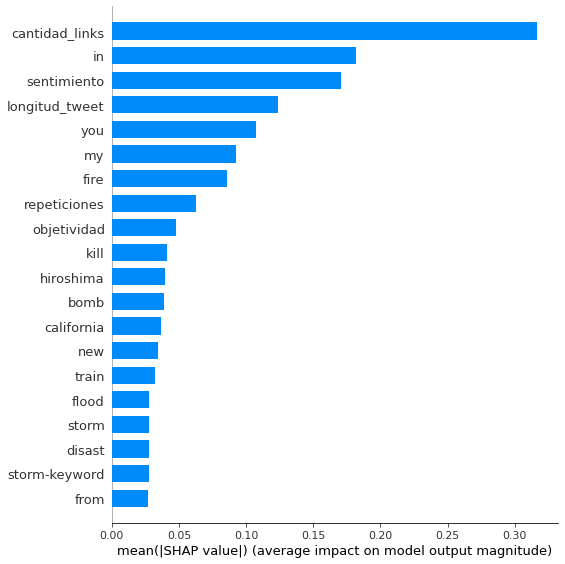

In [16]:
import shap
shap_values = shap.TreeExplainer(cb).shap_values(train_limpio)
shap.summary_plot(shap_values, train_limpio, plot_type="bar")

In [18]:
# Controlo que al menos los 3 primeros features no entorpezcan

In [23]:
top_features=['cantidad_links','in','sentimiento']

In [38]:
resultados = []
for i in top_features:

    train_sin_un_feature = train_limpio.drop(columns = [i])
    
    for j in top_features:

        if(j!=i):
            train_sin_dos_features = train_sin_un_feature.drop(columns = [j])
        else:
            train_sin_dos_features = train_sin_un_feature
            

        x_train, x_test, y_train, y_test = train_test_split(train_sin_dos_features, train_y, test_size=0.2)
        cb = CatBoostClassifier()
        cb.fit(x_train, y_train)
        pred = cb.predict(x_test)
        resultados.append((' El promedio sin ',i,'ni ',j, 'es : ',f1_score(y_test.values, pred, average='macro')))
        
    
resultados

Learning rate set to 0.022283
0:	learn: 0.6901457	total: 54.7ms	remaining: 54.6s
1:	learn: 0.6869459	total: 136ms	remaining: 1m 7s
2:	learn: 0.6841642	total: 187ms	remaining: 1m 2s
3:	learn: 0.6813324	total: 233ms	remaining: 57.9s
4:	learn: 0.6788112	total: 286ms	remaining: 57s
5:	learn: 0.6759045	total: 342ms	remaining: 56.6s
6:	learn: 0.6732911	total: 387ms	remaining: 54.8s
7:	learn: 0.6710984	total: 436ms	remaining: 54s
8:	learn: 0.6688239	total: 482ms	remaining: 53s
9:	learn: 0.6667452	total: 555ms	remaining: 54.9s
10:	learn: 0.6644285	total: 600ms	remaining: 53.9s
11:	learn: 0.6621843	total: 645ms	remaining: 53.1s
12:	learn: 0.6600855	total: 689ms	remaining: 52.3s
13:	learn: 0.6581941	total: 739ms	remaining: 52s
14:	learn: 0.6558495	total: 814ms	remaining: 53.4s
15:	learn: 0.6542157	total: 859ms	remaining: 52.8s
16:	learn: 0.6521127	total: 904ms	remaining: 52.3s
17:	learn: 0.6500822	total: 948ms	remaining: 51.7s
18:	learn: 0.6481933	total: 993ms	remaining: 51.3s
19:	learn: 0.64644

164:	learn: 0.5422452	total: 8.21s	remaining: 41.6s
165:	learn: 0.5417277	total: 8.26s	remaining: 41.5s
166:	learn: 0.5412585	total: 8.3s	remaining: 41.4s
167:	learn: 0.5408203	total: 8.35s	remaining: 41.4s
168:	learn: 0.5405542	total: 8.4s	remaining: 41.3s
169:	learn: 0.5402084	total: 8.46s	remaining: 41.3s
170:	learn: 0.5397159	total: 8.51s	remaining: 41.3s
171:	learn: 0.5393416	total: 8.55s	remaining: 41.2s
172:	learn: 0.5390171	total: 8.6s	remaining: 41.1s
173:	learn: 0.5385928	total: 8.64s	remaining: 41s
174:	learn: 0.5382768	total: 8.7s	remaining: 41s
175:	learn: 0.5379650	total: 8.74s	remaining: 40.9s
176:	learn: 0.5374708	total: 8.8s	remaining: 40.9s
177:	learn: 0.5370692	total: 8.84s	remaining: 40.8s
178:	learn: 0.5367036	total: 8.89s	remaining: 40.8s
179:	learn: 0.5362438	total: 8.94s	remaining: 40.7s
180:	learn: 0.5358616	total: 8.99s	remaining: 40.7s
181:	learn: 0.5355958	total: 9.04s	remaining: 40.6s
182:	learn: 0.5353316	total: 9.08s	remaining: 40.5s
183:	learn: 0.5350349

323:	learn: 0.4962519	total: 15.8s	remaining: 33s
324:	learn: 0.4960703	total: 15.9s	remaining: 33s
325:	learn: 0.4958501	total: 15.9s	remaining: 32.9s
326:	learn: 0.4956093	total: 16s	remaining: 32.9s
327:	learn: 0.4953793	total: 16s	remaining: 32.8s
328:	learn: 0.4952357	total: 16.1s	remaining: 32.8s
329:	learn: 0.4949941	total: 16.1s	remaining: 32.7s
330:	learn: 0.4947457	total: 16.2s	remaining: 32.7s
331:	learn: 0.4945026	total: 16.2s	remaining: 32.6s
332:	learn: 0.4942735	total: 16.3s	remaining: 32.6s
333:	learn: 0.4940166	total: 16.3s	remaining: 32.5s
334:	learn: 0.4937239	total: 16.4s	remaining: 32.5s
335:	learn: 0.4934729	total: 16.4s	remaining: 32.4s
336:	learn: 0.4932923	total: 16.5s	remaining: 32.4s
337:	learn: 0.4930369	total: 16.5s	remaining: 32.3s
338:	learn: 0.4928500	total: 16.6s	remaining: 32.3s
339:	learn: 0.4925984	total: 16.6s	remaining: 32.2s
340:	learn: 0.4923805	total: 16.6s	remaining: 32.2s
341:	learn: 0.4921466	total: 16.7s	remaining: 32.1s
342:	learn: 0.491885

484:	learn: 0.4597272	total: 23.6s	remaining: 25.1s
485:	learn: 0.4595000	total: 23.7s	remaining: 25.1s
486:	learn: 0.4593296	total: 23.7s	remaining: 25s
487:	learn: 0.4591024	total: 23.8s	remaining: 24.9s
488:	learn: 0.4588346	total: 23.8s	remaining: 24.9s
489:	learn: 0.4585543	total: 23.9s	remaining: 24.9s
490:	learn: 0.4583278	total: 23.9s	remaining: 24.8s
491:	learn: 0.4581039	total: 24s	remaining: 24.8s
492:	learn: 0.4579021	total: 24s	remaining: 24.7s
493:	learn: 0.4576652	total: 24.1s	remaining: 24.6s
494:	learn: 0.4575013	total: 24.1s	remaining: 24.6s
495:	learn: 0.4572786	total: 24.2s	remaining: 24.6s
496:	learn: 0.4570478	total: 24.2s	remaining: 24.5s
497:	learn: 0.4568308	total: 24.3s	remaining: 24.4s
498:	learn: 0.4566188	total: 24.3s	remaining: 24.4s
499:	learn: 0.4564346	total: 24.4s	remaining: 24.4s
500:	learn: 0.4561940	total: 24.4s	remaining: 24.3s
501:	learn: 0.4559759	total: 24.4s	remaining: 24.2s
502:	learn: 0.4557642	total: 24.5s	remaining: 24.2s
503:	learn: 0.4555

644:	learn: 0.4272240	total: 31.2s	remaining: 17.2s
645:	learn: 0.4270535	total: 31.3s	remaining: 17.1s
646:	learn: 0.4268819	total: 31.3s	remaining: 17.1s
647:	learn: 0.4266848	total: 31.4s	remaining: 17s
648:	learn: 0.4264847	total: 31.4s	remaining: 17s
649:	learn: 0.4262941	total: 31.5s	remaining: 16.9s
650:	learn: 0.4260775	total: 31.5s	remaining: 16.9s
651:	learn: 0.4258947	total: 31.5s	remaining: 16.8s
652:	learn: 0.4257362	total: 31.6s	remaining: 16.8s
653:	learn: 0.4255878	total: 31.6s	remaining: 16.7s
654:	learn: 0.4254101	total: 31.7s	remaining: 16.7s
655:	learn: 0.4252198	total: 31.7s	remaining: 16.6s
656:	learn: 0.4250492	total: 31.8s	remaining: 16.6s
657:	learn: 0.4249010	total: 31.8s	remaining: 16.5s
658:	learn: 0.4247900	total: 31.9s	remaining: 16.5s
659:	learn: 0.4245440	total: 31.9s	remaining: 16.4s
660:	learn: 0.4244703	total: 32s	remaining: 16.4s
661:	learn: 0.4242770	total: 32s	remaining: 16.3s
662:	learn: 0.4242034	total: 32.1s	remaining: 16.3s
663:	learn: 0.424057

804:	learn: 0.4022193	total: 38.9s	remaining: 9.43s
805:	learn: 0.4020714	total: 39s	remaining: 9.38s
806:	learn: 0.4019258	total: 39s	remaining: 9.33s
807:	learn: 0.4017804	total: 39s	remaining: 9.28s
808:	learn: 0.4015819	total: 39.1s	remaining: 9.23s
809:	learn: 0.4014196	total: 39.1s	remaining: 9.18s
810:	learn: 0.4012343	total: 39.2s	remaining: 9.13s
811:	learn: 0.4011748	total: 39.2s	remaining: 9.09s
812:	learn: 0.4010194	total: 39.3s	remaining: 9.04s
813:	learn: 0.4008529	total: 39.3s	remaining: 8.99s
814:	learn: 0.4006905	total: 39.4s	remaining: 8.94s
815:	learn: 0.4005788	total: 39.4s	remaining: 8.89s
816:	learn: 0.4004086	total: 39.5s	remaining: 8.84s
817:	learn: 0.4002575	total: 39.5s	remaining: 8.79s
818:	learn: 0.4001490	total: 39.6s	remaining: 8.74s
819:	learn: 0.3999623	total: 39.6s	remaining: 8.7s
820:	learn: 0.3998992	total: 39.7s	remaining: 8.65s
821:	learn: 0.3997266	total: 39.7s	remaining: 8.6s
822:	learn: 0.3995722	total: 39.8s	remaining: 8.55s
823:	learn: 0.399385

963:	learn: 0.3817382	total: 46.5s	remaining: 1.74s
964:	learn: 0.3816547	total: 46.5s	remaining: 1.69s
965:	learn: 0.3814990	total: 46.6s	remaining: 1.64s
966:	learn: 0.3813640	total: 46.6s	remaining: 1.59s
967:	learn: 0.3812376	total: 46.7s	remaining: 1.54s
968:	learn: 0.3812063	total: 46.7s	remaining: 1.5s
969:	learn: 0.3811752	total: 46.8s	remaining: 1.45s
970:	learn: 0.3811492	total: 46.8s	remaining: 1.4s
971:	learn: 0.3811280	total: 46.9s	remaining: 1.35s
972:	learn: 0.3810048	total: 46.9s	remaining: 1.3s
973:	learn: 0.3809133	total: 47s	remaining: 1.25s
974:	learn: 0.3808374	total: 47s	remaining: 1.21s
975:	learn: 0.3807088	total: 47.1s	remaining: 1.16s
976:	learn: 0.3806168	total: 47.1s	remaining: 1.11s
977:	learn: 0.3805181	total: 47.2s	remaining: 1.06s
978:	learn: 0.3803415	total: 47.2s	remaining: 1.01s
979:	learn: 0.3801751	total: 47.3s	remaining: 965ms
980:	learn: 0.3801131	total: 47.3s	remaining: 916ms
981:	learn: 0.3800191	total: 47.4s	remaining: 868ms
982:	learn: 0.37985

127:	learn: 0.5629107	total: 6.6s	remaining: 45s
128:	learn: 0.5625492	total: 6.64s	remaining: 44.9s
129:	learn: 0.5621378	total: 6.69s	remaining: 44.8s
130:	learn: 0.5615678	total: 6.73s	remaining: 44.7s
131:	learn: 0.5610023	total: 6.78s	remaining: 44.6s
132:	learn: 0.5605970	total: 6.83s	remaining: 44.5s
133:	learn: 0.5601066	total: 6.88s	remaining: 44.4s
134:	learn: 0.5597045	total: 6.92s	remaining: 44.3s
135:	learn: 0.5592540	total: 6.96s	remaining: 44.3s
136:	learn: 0.5589407	total: 7.02s	remaining: 44.2s
137:	learn: 0.5584305	total: 7.07s	remaining: 44.2s
138:	learn: 0.5578471	total: 7.12s	remaining: 44.1s
139:	learn: 0.5573412	total: 7.16s	remaining: 44s
140:	learn: 0.5567420	total: 7.21s	remaining: 43.9s
141:	learn: 0.5562937	total: 7.25s	remaining: 43.8s
142:	learn: 0.5559485	total: 7.3s	remaining: 43.8s
143:	learn: 0.5556522	total: 7.35s	remaining: 43.7s
144:	learn: 0.5552753	total: 7.39s	remaining: 43.6s
145:	learn: 0.5547927	total: 7.44s	remaining: 43.5s
146:	learn: 0.5544

287:	learn: 0.5103060	total: 14.2s	remaining: 35.2s
288:	learn: 0.5100468	total: 14.3s	remaining: 35.1s
289:	learn: 0.5098146	total: 14.3s	remaining: 35.1s
290:	learn: 0.5095183	total: 14.4s	remaining: 35s
291:	learn: 0.5092855	total: 14.4s	remaining: 34.9s
292:	learn: 0.5090702	total: 14.5s	remaining: 34.9s
293:	learn: 0.5088004	total: 14.5s	remaining: 34.8s
294:	learn: 0.5085284	total: 14.6s	remaining: 34.8s
295:	learn: 0.5083641	total: 14.6s	remaining: 34.7s
296:	learn: 0.5081659	total: 14.6s	remaining: 34.7s
297:	learn: 0.5079903	total: 14.7s	remaining: 34.6s
298:	learn: 0.5077111	total: 14.7s	remaining: 34.6s
299:	learn: 0.5073991	total: 14.8s	remaining: 34.5s
300:	learn: 0.5071344	total: 14.8s	remaining: 34.5s
301:	learn: 0.5069465	total: 14.9s	remaining: 34.4s
302:	learn: 0.5066515	total: 14.9s	remaining: 34.4s
303:	learn: 0.5063404	total: 15s	remaining: 34.3s
304:	learn: 0.5061540	total: 15s	remaining: 34.2s
305:	learn: 0.5058964	total: 15.1s	remaining: 34.2s
306:	learn: 0.5056

447:	learn: 0.4726878	total: 21.8s	remaining: 26.8s
448:	learn: 0.4724749	total: 21.8s	remaining: 26.8s
449:	learn: 0.4722989	total: 21.9s	remaining: 26.7s
450:	learn: 0.4720939	total: 21.9s	remaining: 26.7s
451:	learn: 0.4719400	total: 22s	remaining: 26.6s
452:	learn: 0.4716894	total: 22s	remaining: 26.6s
453:	learn: 0.4714626	total: 22.1s	remaining: 26.6s
454:	learn: 0.4712177	total: 22.1s	remaining: 26.5s
455:	learn: 0.4709768	total: 22.2s	remaining: 26.4s
456:	learn: 0.4707508	total: 22.2s	remaining: 26.4s
457:	learn: 0.4705285	total: 22.3s	remaining: 26.3s
458:	learn: 0.4702661	total: 22.3s	remaining: 26.3s
459:	learn: 0.4700050	total: 22.4s	remaining: 26.2s
460:	learn: 0.4698252	total: 22.4s	remaining: 26.2s
461:	learn: 0.4695776	total: 22.4s	remaining: 26.1s
462:	learn: 0.4693795	total: 22.5s	remaining: 26.1s
463:	learn: 0.4691542	total: 22.5s	remaining: 26s
464:	learn: 0.4689212	total: 22.6s	remaining: 26s
465:	learn: 0.4686571	total: 22.6s	remaining: 25.9s
466:	learn: 0.468447

607:	learn: 0.4383409	total: 29.3s	remaining: 18.9s
608:	learn: 0.4381346	total: 29.4s	remaining: 18.8s
609:	learn: 0.4379565	total: 29.4s	remaining: 18.8s
610:	learn: 0.4377334	total: 29.5s	remaining: 18.8s
611:	learn: 0.4375852	total: 29.5s	remaining: 18.7s
612:	learn: 0.4374081	total: 29.5s	remaining: 18.7s
613:	learn: 0.4372195	total: 29.6s	remaining: 18.6s
614:	learn: 0.4370022	total: 29.6s	remaining: 18.6s
615:	learn: 0.4369158	total: 29.7s	remaining: 18.5s
616:	learn: 0.4367076	total: 29.7s	remaining: 18.5s
617:	learn: 0.4365416	total: 29.8s	remaining: 18.4s
618:	learn: 0.4363826	total: 29.8s	remaining: 18.4s
619:	learn: 0.4361806	total: 29.9s	remaining: 18.3s
620:	learn: 0.4360003	total: 29.9s	remaining: 18.3s
621:	learn: 0.4358079	total: 30s	remaining: 18.2s
622:	learn: 0.4355983	total: 30s	remaining: 18.2s
623:	learn: 0.4354626	total: 30.1s	remaining: 18.1s
624:	learn: 0.4352352	total: 30.1s	remaining: 18.1s
625:	learn: 0.4350554	total: 30.1s	remaining: 18s
626:	learn: 0.4348

766:	learn: 0.4119292	total: 36.9s	remaining: 11.2s
767:	learn: 0.4117752	total: 36.9s	remaining: 11.1s
768:	learn: 0.4116372	total: 36.9s	remaining: 11.1s
769:	learn: 0.4115205	total: 37s	remaining: 11s
770:	learn: 0.4113102	total: 37s	remaining: 11s
771:	learn: 0.4112644	total: 37.1s	remaining: 11s
772:	learn: 0.4111195	total: 37.1s	remaining: 10.9s
773:	learn: 0.4109417	total: 37.2s	remaining: 10.9s
774:	learn: 0.4108108	total: 37.2s	remaining: 10.8s
775:	learn: 0.4106490	total: 37.3s	remaining: 10.8s
776:	learn: 0.4104620	total: 37.3s	remaining: 10.7s
777:	learn: 0.4102987	total: 37.4s	remaining: 10.7s
778:	learn: 0.4100959	total: 37.4s	remaining: 10.6s
779:	learn: 0.4099518	total: 37.5s	remaining: 10.6s
780:	learn: 0.4097809	total: 37.5s	remaining: 10.5s
781:	learn: 0.4096555	total: 37.6s	remaining: 10.5s
782:	learn: 0.4094565	total: 37.6s	remaining: 10.4s
783:	learn: 0.4093453	total: 37.7s	remaining: 10.4s
784:	learn: 0.4092897	total: 37.7s	remaining: 10.3s
785:	learn: 0.4091428	

929:	learn: 0.3897258	total: 44.7s	remaining: 3.37s
930:	learn: 0.3896333	total: 44.8s	remaining: 3.32s
931:	learn: 0.3894989	total: 44.8s	remaining: 3.27s
932:	learn: 0.3893716	total: 44.9s	remaining: 3.22s
933:	learn: 0.3892542	total: 44.9s	remaining: 3.17s
934:	learn: 0.3891392	total: 45s	remaining: 3.13s
935:	learn: 0.3889710	total: 45s	remaining: 3.08s
936:	learn: 0.3889230	total: 45s	remaining: 3.03s
937:	learn: 0.3887845	total: 45.1s	remaining: 2.98s
938:	learn: 0.3887160	total: 45.1s	remaining: 2.93s
939:	learn: 0.3885422	total: 45.2s	remaining: 2.88s
940:	learn: 0.3884773	total: 45.2s	remaining: 2.84s
941:	learn: 0.3883609	total: 45.3s	remaining: 2.79s
942:	learn: 0.3882925	total: 45.3s	remaining: 2.74s
943:	learn: 0.3881625	total: 45.4s	remaining: 2.69s
944:	learn: 0.3880301	total: 45.4s	remaining: 2.64s
945:	learn: 0.3880022	total: 45.5s	remaining: 2.6s
946:	learn: 0.3878716	total: 45.5s	remaining: 2.55s
947:	learn: 0.3877059	total: 45.6s	remaining: 2.5s
948:	learn: 0.387657

90:	learn: 0.5867282	total: 4.39s	remaining: 43.8s
91:	learn: 0.5860376	total: 4.43s	remaining: 43.7s
92:	learn: 0.5854499	total: 4.47s	remaining: 43.6s
93:	learn: 0.5847554	total: 4.52s	remaining: 43.6s
94:	learn: 0.5842848	total: 4.57s	remaining: 43.5s
95:	learn: 0.5837560	total: 4.62s	remaining: 43.5s
96:	learn: 0.5831070	total: 4.67s	remaining: 43.4s
97:	learn: 0.5825793	total: 4.71s	remaining: 43.4s
98:	learn: 0.5819916	total: 4.76s	remaining: 43.3s
99:	learn: 0.5814838	total: 4.8s	remaining: 43.2s
100:	learn: 0.5809042	total: 4.86s	remaining: 43.2s
101:	learn: 0.5804074	total: 4.9s	remaining: 43.2s
102:	learn: 0.5799904	total: 4.95s	remaining: 43.1s
103:	learn: 0.5793411	total: 5s	remaining: 43.1s
104:	learn: 0.5788277	total: 5.05s	remaining: 43s
105:	learn: 0.5781824	total: 5.11s	remaining: 43.1s
106:	learn: 0.5775951	total: 5.15s	remaining: 43s
107:	learn: 0.5771013	total: 5.2s	remaining: 42.9s
108:	learn: 0.5765918	total: 5.25s	remaining: 42.9s
109:	learn: 0.5760129	total: 5.2

250:	learn: 0.5260093	total: 12s	remaining: 35.9s
251:	learn: 0.5258230	total: 12.1s	remaining: 35.9s
252:	learn: 0.5255225	total: 12.1s	remaining: 35.8s
253:	learn: 0.5252481	total: 12.2s	remaining: 35.8s
254:	learn: 0.5249909	total: 12.2s	remaining: 35.7s
255:	learn: 0.5247721	total: 12.3s	remaining: 35.7s
256:	learn: 0.5245244	total: 12.3s	remaining: 35.6s
257:	learn: 0.5243079	total: 12.4s	remaining: 35.6s
258:	learn: 0.5240732	total: 12.4s	remaining: 35.5s
259:	learn: 0.5237980	total: 12.5s	remaining: 35.5s
260:	learn: 0.5235902	total: 12.5s	remaining: 35.4s
261:	learn: 0.5233330	total: 12.6s	remaining: 35.4s
262:	learn: 0.5230939	total: 12.6s	remaining: 35.3s
263:	learn: 0.5228771	total: 12.7s	remaining: 35.3s
264:	learn: 0.5227170	total: 12.7s	remaining: 35.2s
265:	learn: 0.5224158	total: 12.7s	remaining: 35.2s
266:	learn: 0.5221776	total: 12.8s	remaining: 35.1s
267:	learn: 0.5219271	total: 12.8s	remaining: 35.1s
268:	learn: 0.5216285	total: 12.9s	remaining: 35s
269:	learn: 0.52

410:	learn: 0.4883254	total: 19.6s	remaining: 28.1s
411:	learn: 0.4880978	total: 19.7s	remaining: 28s
412:	learn: 0.4878685	total: 19.7s	remaining: 28s
413:	learn: 0.4876218	total: 19.7s	remaining: 27.9s
414:	learn: 0.4873450	total: 19.8s	remaining: 27.9s
415:	learn: 0.4871028	total: 19.8s	remaining: 27.9s
416:	learn: 0.4868457	total: 19.9s	remaining: 27.8s
417:	learn: 0.4865695	total: 19.9s	remaining: 27.8s
418:	learn: 0.4862904	total: 20s	remaining: 27.7s
419:	learn: 0.4859868	total: 20s	remaining: 27.7s
420:	learn: 0.4857911	total: 20.1s	remaining: 27.6s
421:	learn: 0.4855370	total: 20.1s	remaining: 27.6s
422:	learn: 0.4852992	total: 20.2s	remaining: 27.5s
423:	learn: 0.4849921	total: 20.2s	remaining: 27.5s
424:	learn: 0.4847687	total: 20.3s	remaining: 27.4s
425:	learn: 0.4845097	total: 20.3s	remaining: 27.4s
426:	learn: 0.4841587	total: 20.4s	remaining: 27.3s
427:	learn: 0.4839000	total: 20.4s	remaining: 27.3s
428:	learn: 0.4836082	total: 20.5s	remaining: 27.2s
429:	learn: 0.483408

570:	learn: 0.4513559	total: 27.3s	remaining: 20.5s
571:	learn: 0.4511901	total: 27.4s	remaining: 20.5s
572:	learn: 0.4509661	total: 27.4s	remaining: 20.4s
573:	learn: 0.4507611	total: 27.4s	remaining: 20.4s
574:	learn: 0.4506068	total: 27.5s	remaining: 20.3s
575:	learn: 0.4503596	total: 27.5s	remaining: 20.3s
576:	learn: 0.4501513	total: 27.6s	remaining: 20.2s
577:	learn: 0.4499814	total: 27.6s	remaining: 20.2s
578:	learn: 0.4497982	total: 27.7s	remaining: 20.1s
579:	learn: 0.4496522	total: 27.7s	remaining: 20.1s
580:	learn: 0.4494810	total: 27.8s	remaining: 20s
581:	learn: 0.4492994	total: 27.8s	remaining: 20s
582:	learn: 0.4490848	total: 27.9s	remaining: 19.9s
583:	learn: 0.4488659	total: 27.9s	remaining: 19.9s
584:	learn: 0.4486393	total: 28s	remaining: 19.8s
585:	learn: 0.4485029	total: 28s	remaining: 19.8s
586:	learn: 0.4483141	total: 28.1s	remaining: 19.7s
587:	learn: 0.4480556	total: 28.1s	remaining: 19.7s
588:	learn: 0.4478550	total: 28.2s	remaining: 19.6s
589:	learn: 0.447681

730:	learn: 0.4241805	total: 34.9s	remaining: 12.8s
731:	learn: 0.4239682	total: 35s	remaining: 12.8s
732:	learn: 0.4238060	total: 35s	remaining: 12.7s
733:	learn: 0.4236364	total: 35s	remaining: 12.7s
734:	learn: 0.4235186	total: 35.1s	remaining: 12.7s
735:	learn: 0.4233208	total: 35.2s	remaining: 12.6s
736:	learn: 0.4231746	total: 35.2s	remaining: 12.6s
737:	learn: 0.4230114	total: 35.2s	remaining: 12.5s
738:	learn: 0.4228396	total: 35.3s	remaining: 12.5s
739:	learn: 0.4226792	total: 35.3s	remaining: 12.4s
740:	learn: 0.4224933	total: 35.4s	remaining: 12.4s
741:	learn: 0.4223958	total: 35.4s	remaining: 12.3s
742:	learn: 0.4223322	total: 35.5s	remaining: 12.3s
743:	learn: 0.4221821	total: 35.5s	remaining: 12.2s
744:	learn: 0.4220246	total: 35.6s	remaining: 12.2s
745:	learn: 0.4218553	total: 35.6s	remaining: 12.1s
746:	learn: 0.4216972	total: 35.7s	remaining: 12.1s
747:	learn: 0.4215051	total: 35.7s	remaining: 12s
748:	learn: 0.4213467	total: 35.8s	remaining: 12s
749:	learn: 0.4211266	

890:	learn: 0.4021216	total: 42.5s	remaining: 5.19s
891:	learn: 0.4020027	total: 42.5s	remaining: 5.14s
892:	learn: 0.4018536	total: 42.5s	remaining: 5.1s
893:	learn: 0.4016988	total: 42.6s	remaining: 5.05s
894:	learn: 0.4015476	total: 42.6s	remaining: 5s
895:	learn: 0.4014857	total: 42.7s	remaining: 4.95s
896:	learn: 0.4012935	total: 42.7s	remaining: 4.91s
897:	learn: 0.4011792	total: 42.8s	remaining: 4.86s
898:	learn: 0.4010321	total: 42.8s	remaining: 4.81s
899:	learn: 0.4008926	total: 42.9s	remaining: 4.76s
900:	learn: 0.4007221	total: 42.9s	remaining: 4.71s
901:	learn: 0.4006605	total: 43s	remaining: 4.67s
902:	learn: 0.4005381	total: 43s	remaining: 4.62s
903:	learn: 0.4004074	total: 43.1s	remaining: 4.57s
904:	learn: 0.4002239	total: 43.1s	remaining: 4.53s
905:	learn: 0.4001191	total: 43.2s	remaining: 4.48s
906:	learn: 0.3999718	total: 43.2s	remaining: 4.43s
907:	learn: 0.3997968	total: 43.3s	remaining: 4.39s
908:	learn: 0.3996453	total: 43.4s	remaining: 4.34s
909:	learn: 0.399542

54:	learn: 0.6078791	total: 2.75s	remaining: 47.2s
55:	learn: 0.6068644	total: 2.79s	remaining: 47s
56:	learn: 0.6059470	total: 2.83s	remaining: 46.9s
57:	learn: 0.6050094	total: 2.88s	remaining: 46.7s
58:	learn: 0.6040772	total: 2.93s	remaining: 46.7s
59:	learn: 0.6033391	total: 2.98s	remaining: 46.7s
60:	learn: 0.6027257	total: 3.03s	remaining: 46.6s
61:	learn: 0.6018344	total: 3.07s	remaining: 46.5s
62:	learn: 0.6009232	total: 3.12s	remaining: 46.4s
63:	learn: 0.6000744	total: 3.16s	remaining: 46.3s
64:	learn: 0.5991499	total: 3.21s	remaining: 46.3s
65:	learn: 0.5984367	total: 3.26s	remaining: 46.1s
66:	learn: 0.5977840	total: 3.3s	remaining: 46s
67:	learn: 0.5971441	total: 3.35s	remaining: 45.9s
68:	learn: 0.5963346	total: 3.4s	remaining: 45.8s
69:	learn: 0.5954246	total: 3.45s	remaining: 45.8s
70:	learn: 0.5949844	total: 3.5s	remaining: 45.7s
71:	learn: 0.5942315	total: 3.54s	remaining: 45.6s
72:	learn: 0.5936658	total: 3.58s	remaining: 45.5s
73:	learn: 0.5928947	total: 3.63s	rema

214:	learn: 0.5299492	total: 10.4s	remaining: 38s
215:	learn: 0.5295983	total: 10.4s	remaining: 37.9s
216:	learn: 0.5293362	total: 10.5s	remaining: 37.8s
217:	learn: 0.5290179	total: 10.5s	remaining: 37.8s
218:	learn: 0.5287216	total: 10.6s	remaining: 37.7s
219:	learn: 0.5283828	total: 10.6s	remaining: 37.7s
220:	learn: 0.5280980	total: 10.7s	remaining: 37.6s
221:	learn: 0.5278219	total: 10.7s	remaining: 37.6s
222:	learn: 0.5275970	total: 10.8s	remaining: 37.5s
223:	learn: 0.5272268	total: 10.8s	remaining: 37.5s
224:	learn: 0.5269859	total: 10.9s	remaining: 37.5s
225:	learn: 0.5267271	total: 10.9s	remaining: 37.4s
226:	learn: 0.5263215	total: 11s	remaining: 37.3s
227:	learn: 0.5261038	total: 11s	remaining: 37.3s
228:	learn: 0.5258283	total: 11.1s	remaining: 37.2s
229:	learn: 0.5255410	total: 11.1s	remaining: 37.2s
230:	learn: 0.5252649	total: 11.2s	remaining: 37.1s
231:	learn: 0.5249479	total: 11.2s	remaining: 37.1s
232:	learn: 0.5246861	total: 11.2s	remaining: 37s
233:	learn: 0.524419

374:	learn: 0.4899456	total: 18s	remaining: 30s
375:	learn: 0.4897390	total: 18.1s	remaining: 30s
376:	learn: 0.4895211	total: 18.1s	remaining: 29.9s
377:	learn: 0.4892653	total: 18.1s	remaining: 29.9s
378:	learn: 0.4890514	total: 18.2s	remaining: 29.8s
379:	learn: 0.4888454	total: 18.2s	remaining: 29.8s
380:	learn: 0.4886214	total: 18.3s	remaining: 29.7s
381:	learn: 0.4884458	total: 18.3s	remaining: 29.7s
382:	learn: 0.4882108	total: 18.4s	remaining: 29.6s
383:	learn: 0.4880688	total: 18.4s	remaining: 29.6s
384:	learn: 0.4877505	total: 18.5s	remaining: 29.5s
385:	learn: 0.4875885	total: 18.5s	remaining: 29.5s
386:	learn: 0.4873751	total: 18.6s	remaining: 29.4s
387:	learn: 0.4871168	total: 18.6s	remaining: 29.4s
388:	learn: 0.4869570	total: 18.7s	remaining: 29.3s
389:	learn: 0.4867111	total: 18.7s	remaining: 29.3s
390:	learn: 0.4864894	total: 18.8s	remaining: 29.2s
391:	learn: 0.4862543	total: 18.8s	remaining: 29.2s
392:	learn: 0.4860288	total: 18.9s	remaining: 29.1s
393:	learn: 0.4858

534:	learn: 0.4535373	total: 25.5s	remaining: 22.2s
535:	learn: 0.4533415	total: 25.6s	remaining: 22.2s
536:	learn: 0.4531338	total: 25.6s	remaining: 22.1s
537:	learn: 0.4529582	total: 25.7s	remaining: 22.1s
538:	learn: 0.4527313	total: 25.7s	remaining: 22s
539:	learn: 0.4524503	total: 25.8s	remaining: 22s
540:	learn: 0.4522762	total: 25.8s	remaining: 21.9s
541:	learn: 0.4521025	total: 25.9s	remaining: 21.9s
542:	learn: 0.4519527	total: 25.9s	remaining: 21.8s
543:	learn: 0.4517632	total: 26s	remaining: 21.8s
544:	learn: 0.4515480	total: 26s	remaining: 21.7s
545:	learn: 0.4513420	total: 26.1s	remaining: 21.7s
546:	learn: 0.4510988	total: 26.1s	remaining: 21.6s
547:	learn: 0.4508735	total: 26.1s	remaining: 21.6s
548:	learn: 0.4506784	total: 26.2s	remaining: 21.5s
549:	learn: 0.4505114	total: 26.2s	remaining: 21.5s
550:	learn: 0.4502972	total: 26.3s	remaining: 21.4s
551:	learn: 0.4501217	total: 26.3s	remaining: 21.4s
552:	learn: 0.4499303	total: 26.4s	remaining: 21.3s
553:	learn: 0.449687

694:	learn: 0.4234898	total: 33.1s	remaining: 14.5s
695:	learn: 0.4233567	total: 33.2s	remaining: 14.5s
696:	learn: 0.4231851	total: 33.2s	remaining: 14.4s
697:	learn: 0.4229283	total: 33.3s	remaining: 14.4s
698:	learn: 0.4228647	total: 33.3s	remaining: 14.4s
699:	learn: 0.4227083	total: 33.4s	remaining: 14.3s
700:	learn: 0.4225922	total: 33.4s	remaining: 14.3s
701:	learn: 0.4223948	total: 33.5s	remaining: 14.2s
702:	learn: 0.4222247	total: 33.5s	remaining: 14.2s
703:	learn: 0.4220494	total: 33.6s	remaining: 14.1s
704:	learn: 0.4218852	total: 33.6s	remaining: 14.1s
705:	learn: 0.4216850	total: 33.7s	remaining: 14s
706:	learn: 0.4215339	total: 33.7s	remaining: 14s
707:	learn: 0.4213353	total: 33.8s	remaining: 13.9s
708:	learn: 0.4211375	total: 33.8s	remaining: 13.9s
709:	learn: 0.4209314	total: 33.9s	remaining: 13.8s
710:	learn: 0.4207577	total: 33.9s	remaining: 13.8s
711:	learn: 0.4205885	total: 33.9s	remaining: 13.7s
712:	learn: 0.4204240	total: 34s	remaining: 13.7s
713:	learn: 0.4202

857:	learn: 0.3996379	total: 40.9s	remaining: 6.77s
858:	learn: 0.3994864	total: 40.9s	remaining: 6.72s
859:	learn: 0.3993218	total: 41s	remaining: 6.67s
860:	learn: 0.3992756	total: 41s	remaining: 6.62s
861:	learn: 0.3991341	total: 41.1s	remaining: 6.58s
862:	learn: 0.3989666	total: 41.1s	remaining: 6.53s
863:	learn: 0.3988290	total: 41.2s	remaining: 6.48s
864:	learn: 0.3987810	total: 41.2s	remaining: 6.43s
865:	learn: 0.3986501	total: 41.3s	remaining: 6.39s
866:	learn: 0.3985621	total: 41.3s	remaining: 6.34s
867:	learn: 0.3984377	total: 41.4s	remaining: 6.29s
868:	learn: 0.3982893	total: 41.4s	remaining: 6.24s
869:	learn: 0.3981558	total: 41.5s	remaining: 6.2s
870:	learn: 0.3980225	total: 41.5s	remaining: 6.15s
871:	learn: 0.3979460	total: 41.6s	remaining: 6.1s
872:	learn: 0.3977975	total: 41.6s	remaining: 6.05s
873:	learn: 0.3976342	total: 41.7s	remaining: 6.01s
874:	learn: 0.3975275	total: 41.7s	remaining: 5.96s
875:	learn: 0.3973943	total: 41.8s	remaining: 5.91s
876:	learn: 0.3972

16:	learn: 0.6524715	total: 838ms	remaining: 48.4s
17:	learn: 0.6505615	total: 884ms	remaining: 48.2s
18:	learn: 0.6490293	total: 928ms	remaining: 47.9s
19:	learn: 0.6474168	total: 981ms	remaining: 48.1s
20:	learn: 0.6455981	total: 1.03s	remaining: 47.9s
21:	learn: 0.6439690	total: 1.08s	remaining: 48.1s
22:	learn: 0.6419609	total: 1.13s	remaining: 48s
23:	learn: 0.6400294	total: 1.18s	remaining: 48s
24:	learn: 0.6385148	total: 1.23s	remaining: 47.8s
25:	learn: 0.6367588	total: 1.27s	remaining: 47.6s
26:	learn: 0.6350476	total: 1.33s	remaining: 47.8s
27:	learn: 0.6337314	total: 1.38s	remaining: 47.9s
28:	learn: 0.6325412	total: 1.42s	remaining: 47.7s
29:	learn: 0.6313084	total: 1.47s	remaining: 47.5s
30:	learn: 0.6298379	total: 1.51s	remaining: 47.3s
31:	learn: 0.6282458	total: 1.57s	remaining: 47.5s
32:	learn: 0.6265066	total: 1.61s	remaining: 47.4s
33:	learn: 0.6251643	total: 1.66s	remaining: 47.2s
34:	learn: 0.6238522	total: 1.7s	remaining: 47s
35:	learn: 0.6222949	total: 1.75s	rema

178:	learn: 0.5375364	total: 8.75s	remaining: 40.1s
179:	learn: 0.5371690	total: 8.79s	remaining: 40.1s
180:	learn: 0.5368596	total: 8.84s	remaining: 40s
181:	learn: 0.5365683	total: 8.88s	remaining: 39.9s
182:	learn: 0.5361472	total: 8.93s	remaining: 39.9s
183:	learn: 0.5358376	total: 8.98s	remaining: 39.8s
184:	learn: 0.5355117	total: 9.03s	remaining: 39.8s
185:	learn: 0.5352405	total: 9.07s	remaining: 39.7s
186:	learn: 0.5348408	total: 9.12s	remaining: 39.6s
187:	learn: 0.5345686	total: 9.16s	remaining: 39.6s
188:	learn: 0.5342590	total: 9.21s	remaining: 39.5s
189:	learn: 0.5338783	total: 9.26s	remaining: 39.5s
190:	learn: 0.5336190	total: 9.3s	remaining: 39.4s
191:	learn: 0.5333060	total: 9.35s	remaining: 39.3s
192:	learn: 0.5330064	total: 9.39s	remaining: 39.3s
193:	learn: 0.5326622	total: 9.45s	remaining: 39.3s
194:	learn: 0.5324077	total: 9.5s	remaining: 39.2s
195:	learn: 0.5320044	total: 9.54s	remaining: 39.1s
196:	learn: 0.5315660	total: 9.59s	remaining: 39.1s
197:	learn: 0.53

338:	learn: 0.4957664	total: 16.4s	remaining: 31.9s
339:	learn: 0.4955323	total: 16.4s	remaining: 31.9s
340:	learn: 0.4953351	total: 16.5s	remaining: 31.8s
341:	learn: 0.4951280	total: 16.5s	remaining: 31.8s
342:	learn: 0.4948636	total: 16.5s	remaining: 31.7s
343:	learn: 0.4946552	total: 16.6s	remaining: 31.7s
344:	learn: 0.4944406	total: 16.6s	remaining: 31.6s
345:	learn: 0.4941466	total: 16.7s	remaining: 31.6s
346:	learn: 0.4938854	total: 16.7s	remaining: 31.5s
347:	learn: 0.4936866	total: 16.8s	remaining: 31.5s
348:	learn: 0.4934793	total: 16.8s	remaining: 31.4s
349:	learn: 0.4932660	total: 16.9s	remaining: 31.4s
350:	learn: 0.4929843	total: 16.9s	remaining: 31.3s
351:	learn: 0.4927166	total: 17s	remaining: 31.3s
352:	learn: 0.4924876	total: 17s	remaining: 31.2s
353:	learn: 0.4922032	total: 17.1s	remaining: 31.2s
354:	learn: 0.4919634	total: 17.1s	remaining: 31.1s
355:	learn: 0.4917672	total: 17.2s	remaining: 31.1s
356:	learn: 0.4915181	total: 17.2s	remaining: 31s
357:	learn: 0.4913

498:	learn: 0.4588276	total: 24s	remaining: 24.1s
499:	learn: 0.4586703	total: 24s	remaining: 24s
500:	learn: 0.4584137	total: 24.1s	remaining: 24s
501:	learn: 0.4581360	total: 24.1s	remaining: 23.9s
502:	learn: 0.4579516	total: 24.2s	remaining: 23.9s
503:	learn: 0.4577257	total: 24.2s	remaining: 23.9s
504:	learn: 0.4574816	total: 24.3s	remaining: 23.8s
505:	learn: 0.4572617	total: 24.3s	remaining: 23.8s
506:	learn: 0.4570801	total: 24.4s	remaining: 23.7s
507:	learn: 0.4568488	total: 24.4s	remaining: 23.7s
508:	learn: 0.4566443	total: 24.5s	remaining: 23.6s
509:	learn: 0.4563951	total: 24.5s	remaining: 23.6s
510:	learn: 0.4561401	total: 24.6s	remaining: 23.5s
511:	learn: 0.4559018	total: 24.6s	remaining: 23.5s
512:	learn: 0.4556730	total: 24.7s	remaining: 23.4s
513:	learn: 0.4554553	total: 24.7s	remaining: 23.4s
514:	learn: 0.4551727	total: 24.8s	remaining: 23.3s
515:	learn: 0.4550192	total: 24.8s	remaining: 23.3s
516:	learn: 0.4547776	total: 24.9s	remaining: 23.2s
517:	learn: 0.454564

658:	learn: 0.4270938	total: 31.7s	remaining: 16.4s
659:	learn: 0.4268914	total: 31.8s	remaining: 16.4s
660:	learn: 0.4267175	total: 31.8s	remaining: 16.3s
661:	learn: 0.4265256	total: 31.9s	remaining: 16.3s
662:	learn: 0.4263381	total: 31.9s	remaining: 16.2s
663:	learn: 0.4261620	total: 32s	remaining: 16.2s
664:	learn: 0.4260011	total: 32.1s	remaining: 16.1s
665:	learn: 0.4257809	total: 32.1s	remaining: 16.1s
666:	learn: 0.4255454	total: 32.2s	remaining: 16.1s
667:	learn: 0.4254475	total: 32.2s	remaining: 16s
668:	learn: 0.4253703	total: 32.3s	remaining: 16s
669:	learn: 0.4251952	total: 32.3s	remaining: 15.9s
670:	learn: 0.4250642	total: 32.4s	remaining: 15.9s
671:	learn: 0.4249063	total: 32.4s	remaining: 15.8s
672:	learn: 0.4246940	total: 32.5s	remaining: 15.8s
673:	learn: 0.4244876	total: 32.5s	remaining: 15.7s
674:	learn: 0.4243008	total: 32.6s	remaining: 15.7s
675:	learn: 0.4241494	total: 32.6s	remaining: 15.6s
676:	learn: 0.4239175	total: 32.7s	remaining: 15.6s
677:	learn: 0.4237

819:	learn: 0.4032339	total: 39.6s	remaining: 8.7s
820:	learn: 0.4030608	total: 39.7s	remaining: 8.65s
821:	learn: 0.4028911	total: 39.7s	remaining: 8.6s
822:	learn: 0.4027958	total: 39.8s	remaining: 8.55s
823:	learn: 0.4027507	total: 39.8s	remaining: 8.5s
824:	learn: 0.4025618	total: 39.9s	remaining: 8.46s
825:	learn: 0.4024126	total: 39.9s	remaining: 8.41s
826:	learn: 0.4022718	total: 40s	remaining: 8.36s
827:	learn: 0.4020915	total: 40s	remaining: 8.31s
828:	learn: 0.4019460	total: 40.1s	remaining: 8.26s
829:	learn: 0.4018279	total: 40.1s	remaining: 8.21s
830:	learn: 0.4016780	total: 40.2s	remaining: 8.16s
831:	learn: 0.4015062	total: 40.2s	remaining: 8.12s
832:	learn: 0.4013591	total: 40.2s	remaining: 8.07s
833:	learn: 0.4012209	total: 40.3s	remaining: 8.02s
834:	learn: 0.4010876	total: 40.4s	remaining: 7.97s
835:	learn: 0.4009796	total: 40.4s	remaining: 7.92s
836:	learn: 0.4009102	total: 40.4s	remaining: 7.88s
837:	learn: 0.4007569	total: 40.5s	remaining: 7.83s
838:	learn: 0.40064

978:	learn: 0.3838818	total: 47.3s	remaining: 1.01s
979:	learn: 0.3837396	total: 47.3s	remaining: 965ms
980:	learn: 0.3836060	total: 47.4s	remaining: 917ms
981:	learn: 0.3834583	total: 47.4s	remaining: 869ms
982:	learn: 0.3833249	total: 47.5s	remaining: 821ms
983:	learn: 0.3832180	total: 47.5s	remaining: 772ms
984:	learn: 0.3830622	total: 47.6s	remaining: 724ms
985:	learn: 0.3829325	total: 47.6s	remaining: 676ms
986:	learn: 0.3828782	total: 47.6s	remaining: 628ms
987:	learn: 0.3827641	total: 47.7s	remaining: 579ms
988:	learn: 0.3826201	total: 47.7s	remaining: 531ms
989:	learn: 0.3825871	total: 47.8s	remaining: 483ms
990:	learn: 0.3824813	total: 47.8s	remaining: 434ms
991:	learn: 0.3823629	total: 47.9s	remaining: 386ms
992:	learn: 0.3823348	total: 47.9s	remaining: 338ms
993:	learn: 0.3821957	total: 48s	remaining: 290ms
994:	learn: 0.3821020	total: 48s	remaining: 241ms
995:	learn: 0.3820083	total: 48.1s	remaining: 193ms
996:	learn: 0.3818439	total: 48.1s	remaining: 145ms
997:	learn: 0.38

142:	learn: 0.5450186	total: 7.07s	remaining: 42.4s
143:	learn: 0.5445527	total: 7.12s	remaining: 42.3s
144:	learn: 0.5440619	total: 7.18s	remaining: 42.3s
145:	learn: 0.5435898	total: 7.24s	remaining: 42.4s
146:	learn: 0.5432287	total: 7.31s	remaining: 42.4s
147:	learn: 0.5426771	total: 7.37s	remaining: 42.4s
148:	learn: 0.5422919	total: 7.43s	remaining: 42.4s
149:	learn: 0.5419063	total: 7.48s	remaining: 42.4s
150:	learn: 0.5415305	total: 7.54s	remaining: 42.4s
151:	learn: 0.5412639	total: 7.59s	remaining: 42.3s
152:	learn: 0.5408978	total: 7.65s	remaining: 42.3s
153:	learn: 0.5404451	total: 7.7s	remaining: 42.3s
154:	learn: 0.5399785	total: 7.76s	remaining: 42.3s
155:	learn: 0.5396518	total: 7.82s	remaining: 42.3s
156:	learn: 0.5392954	total: 7.88s	remaining: 42.3s
157:	learn: 0.5389467	total: 7.92s	remaining: 42.2s
158:	learn: 0.5385856	total: 7.98s	remaining: 42.2s
159:	learn: 0.5382534	total: 8.03s	remaining: 42.2s
160:	learn: 0.5379441	total: 8.09s	remaining: 42.1s
161:	learn: 0

301:	learn: 0.4964319	total: 21.7s	remaining: 50.1s
302:	learn: 0.4962028	total: 21.7s	remaining: 50s
303:	learn: 0.4959978	total: 21.8s	remaining: 49.8s
304:	learn: 0.4957342	total: 21.8s	remaining: 49.7s
305:	learn: 0.4954401	total: 21.9s	remaining: 49.6s
306:	learn: 0.4952105	total: 21.9s	remaining: 49.4s
307:	learn: 0.4949998	total: 22s	remaining: 49.3s
308:	learn: 0.4947464	total: 22s	remaining: 49.2s
309:	learn: 0.4945112	total: 22s	remaining: 49.1s
310:	learn: 0.4942716	total: 22.1s	remaining: 48.9s
311:	learn: 0.4940827	total: 22.1s	remaining: 48.8s
312:	learn: 0.4938678	total: 22.2s	remaining: 48.7s
313:	learn: 0.4936653	total: 22.2s	remaining: 48.6s
314:	learn: 0.4934538	total: 22.3s	remaining: 48.5s
315:	learn: 0.4932867	total: 22.3s	remaining: 48.3s
316:	learn: 0.4930856	total: 22.4s	remaining: 48.2s
317:	learn: 0.4928528	total: 22.4s	remaining: 48.1s
318:	learn: 0.4926126	total: 22.5s	remaining: 48s
319:	learn: 0.4924251	total: 22.5s	remaining: 47.8s
320:	learn: 0.4921236	

461:	learn: 0.4605410	total: 29.3s	remaining: 34.1s
462:	learn: 0.4602889	total: 29.3s	remaining: 34s
463:	learn: 0.4600654	total: 29.4s	remaining: 33.9s
464:	learn: 0.4598379	total: 29.4s	remaining: 33.9s
465:	learn: 0.4596427	total: 29.5s	remaining: 33.8s
466:	learn: 0.4594319	total: 29.5s	remaining: 33.7s
467:	learn: 0.4591753	total: 29.6s	remaining: 33.6s
468:	learn: 0.4589404	total: 29.6s	remaining: 33.5s
469:	learn: 0.4587382	total: 29.7s	remaining: 33.5s
470:	learn: 0.4584565	total: 29.7s	remaining: 33.4s
471:	learn: 0.4582851	total: 29.8s	remaining: 33.3s
472:	learn: 0.4579904	total: 29.8s	remaining: 33.2s
473:	learn: 0.4577516	total: 29.8s	remaining: 33.1s
474:	learn: 0.4575202	total: 29.9s	remaining: 33s
475:	learn: 0.4573251	total: 29.9s	remaining: 33s
476:	learn: 0.4570972	total: 30s	remaining: 32.9s
477:	learn: 0.4568993	total: 30s	remaining: 32.8s
478:	learn: 0.4567030	total: 30.1s	remaining: 32.7s
479:	learn: 0.4564488	total: 30.1s	remaining: 32.6s
480:	learn: 0.4562443	

621:	learn: 0.4287399	total: 36.8s	remaining: 22.4s
622:	learn: 0.4285349	total: 36.9s	remaining: 22.3s
623:	learn: 0.4283183	total: 36.9s	remaining: 22.3s
624:	learn: 0.4281381	total: 37s	remaining: 22.2s
625:	learn: 0.4279787	total: 37s	remaining: 22.1s
626:	learn: 0.4278032	total: 37.1s	remaining: 22.1s
627:	learn: 0.4276499	total: 37.1s	remaining: 22s
628:	learn: 0.4274681	total: 37.2s	remaining: 21.9s
629:	learn: 0.4272605	total: 37.2s	remaining: 21.9s
630:	learn: 0.4270822	total: 37.3s	remaining: 21.8s
631:	learn: 0.4270076	total: 37.3s	remaining: 21.7s
632:	learn: 0.4268416	total: 37.4s	remaining: 21.7s
633:	learn: 0.4266748	total: 37.4s	remaining: 21.6s
634:	learn: 0.4265148	total: 37.5s	remaining: 21.5s
635:	learn: 0.4263050	total: 37.5s	remaining: 21.5s
636:	learn: 0.4261761	total: 37.6s	remaining: 21.4s
637:	learn: 0.4260586	total: 37.6s	remaining: 21.3s
638:	learn: 0.4258922	total: 37.6s	remaining: 21.3s
639:	learn: 0.4257168	total: 37.7s	remaining: 21.2s
640:	learn: 0.4255

781:	learn: 0.4028335	total: 44.4s	remaining: 12.4s
782:	learn: 0.4026663	total: 44.4s	remaining: 12.3s
783:	learn: 0.4025068	total: 44.5s	remaining: 12.3s
784:	learn: 0.4023856	total: 44.5s	remaining: 12.2s
785:	learn: 0.4022067	total: 44.6s	remaining: 12.1s
786:	learn: 0.4020148	total: 44.6s	remaining: 12.1s
787:	learn: 0.4018928	total: 44.7s	remaining: 12s
788:	learn: 0.4017519	total: 44.7s	remaining: 12s
789:	learn: 0.4016480	total: 44.8s	remaining: 11.9s
790:	learn: 0.4014919	total: 44.8s	remaining: 11.8s
791:	learn: 0.4013647	total: 44.9s	remaining: 11.8s
792:	learn: 0.4011940	total: 44.9s	remaining: 11.7s
793:	learn: 0.4009868	total: 45s	remaining: 11.7s
794:	learn: 0.4008315	total: 45s	remaining: 11.6s
795:	learn: 0.4006722	total: 45.1s	remaining: 11.5s
796:	learn: 0.4006202	total: 45.1s	remaining: 11.5s
797:	learn: 0.4005615	total: 45.2s	remaining: 11.4s
798:	learn: 0.4004023	total: 45.2s	remaining: 11.4s
799:	learn: 0.4002253	total: 45.2s	remaining: 11.3s
800:	learn: 0.400073

941:	learn: 0.3825907	total: 52s	remaining: 3.2s
942:	learn: 0.3824436	total: 52s	remaining: 3.14s
943:	learn: 0.3823968	total: 52.1s	remaining: 3.09s
944:	learn: 0.3822707	total: 52.1s	remaining: 3.03s
945:	learn: 0.3822221	total: 52.2s	remaining: 2.98s
946:	learn: 0.3821348	total: 52.2s	remaining: 2.92s
947:	learn: 0.3821141	total: 52.2s	remaining: 2.87s
948:	learn: 0.3819889	total: 52.3s	remaining: 2.81s
949:	learn: 0.3819324	total: 52.3s	remaining: 2.75s
950:	learn: 0.3818283	total: 52.4s	remaining: 2.7s
951:	learn: 0.3817040	total: 52.4s	remaining: 2.64s
952:	learn: 0.3816644	total: 52.5s	remaining: 2.59s
953:	learn: 0.3815680	total: 52.5s	remaining: 2.53s
954:	learn: 0.3814152	total: 52.6s	remaining: 2.48s
955:	learn: 0.3812570	total: 52.6s	remaining: 2.42s
956:	learn: 0.3811417	total: 52.7s	remaining: 2.37s
957:	learn: 0.3810341	total: 52.7s	remaining: 2.31s
958:	learn: 0.3809083	total: 52.8s	remaining: 2.26s
959:	learn: 0.3807831	total: 52.8s	remaining: 2.2s
960:	learn: 0.38067

102:	learn: 0.5735033	total: 4.92s	remaining: 42.8s
103:	learn: 0.5729654	total: 4.96s	remaining: 42.7s
104:	learn: 0.5724267	total: 5s	remaining: 42.7s
105:	learn: 0.5719152	total: 5.05s	remaining: 42.6s
106:	learn: 0.5714320	total: 5.09s	remaining: 42.5s
107:	learn: 0.5709667	total: 5.15s	remaining: 42.5s
108:	learn: 0.5704960	total: 5.19s	remaining: 42.4s
109:	learn: 0.5700562	total: 5.24s	remaining: 42.4s
110:	learn: 0.5696914	total: 5.28s	remaining: 42.3s
111:	learn: 0.5691068	total: 5.33s	remaining: 42.3s
112:	learn: 0.5686207	total: 5.38s	remaining: 42.3s
113:	learn: 0.5680700	total: 5.43s	remaining: 42.2s
114:	learn: 0.5676044	total: 5.48s	remaining: 42.1s
115:	learn: 0.5671215	total: 5.52s	remaining: 42.1s
116:	learn: 0.5665739	total: 5.57s	remaining: 42.1s
117:	learn: 0.5661802	total: 5.63s	remaining: 42.1s
118:	learn: 0.5657485	total: 5.67s	remaining: 42s
119:	learn: 0.5653470	total: 5.72s	remaining: 42s
120:	learn: 0.5648241	total: 5.76s	remaining: 41.9s
121:	learn: 0.56428

263:	learn: 0.5158630	total: 14s	remaining: 39s
264:	learn: 0.5154903	total: 14.1s	remaining: 39s
265:	learn: 0.5152131	total: 14.1s	remaining: 38.9s
266:	learn: 0.5149177	total: 14.2s	remaining: 38.9s
267:	learn: 0.5146306	total: 14.2s	remaining: 38.9s
268:	learn: 0.5144004	total: 14.3s	remaining: 38.9s
269:	learn: 0.5141587	total: 14.4s	remaining: 38.9s
270:	learn: 0.5139545	total: 14.4s	remaining: 38.9s
271:	learn: 0.5136429	total: 14.5s	remaining: 38.8s
272:	learn: 0.5133683	total: 14.6s	remaining: 38.8s
273:	learn: 0.5131382	total: 14.7s	remaining: 38.8s
274:	learn: 0.5129657	total: 14.7s	remaining: 38.8s
275:	learn: 0.5127817	total: 14.8s	remaining: 38.7s
276:	learn: 0.5125739	total: 14.8s	remaining: 38.7s
277:	learn: 0.5123783	total: 14.9s	remaining: 38.7s
278:	learn: 0.5121219	total: 14.9s	remaining: 38.6s
279:	learn: 0.5119516	total: 15s	remaining: 38.5s
280:	learn: 0.5116505	total: 15s	remaining: 38.5s
281:	learn: 0.5114443	total: 15.1s	remaining: 38.5s
282:	learn: 0.5112606	

422:	learn: 0.4787052	total: 22.1s	remaining: 30.2s
423:	learn: 0.4784938	total: 22.2s	remaining: 30.1s
424:	learn: 0.4782406	total: 22.2s	remaining: 30s
425:	learn: 0.4780191	total: 22.2s	remaining: 30s
426:	learn: 0.4778112	total: 22.3s	remaining: 29.9s
427:	learn: 0.4775558	total: 22.4s	remaining: 29.9s
428:	learn: 0.4773448	total: 22.4s	remaining: 29.8s
429:	learn: 0.4771492	total: 22.5s	remaining: 29.8s
430:	learn: 0.4768700	total: 22.5s	remaining: 29.7s
431:	learn: 0.4766462	total: 22.5s	remaining: 29.6s
432:	learn: 0.4764075	total: 22.6s	remaining: 29.6s
433:	learn: 0.4760932	total: 22.6s	remaining: 29.5s
434:	learn: 0.4758149	total: 22.7s	remaining: 29.5s
435:	learn: 0.4755975	total: 22.7s	remaining: 29.4s
436:	learn: 0.4753646	total: 22.8s	remaining: 29.3s
437:	learn: 0.4751988	total: 22.8s	remaining: 29.3s
438:	learn: 0.4749701	total: 22.9s	remaining: 29.2s
439:	learn: 0.4747404	total: 22.9s	remaining: 29.2s
440:	learn: 0.4744864	total: 23s	remaining: 29.1s
441:	learn: 0.4742

582:	learn: 0.4438858	total: 29.8s	remaining: 21.3s
583:	learn: 0.4436796	total: 29.8s	remaining: 21.2s
584:	learn: 0.4434702	total: 29.9s	remaining: 21.2s
585:	learn: 0.4433079	total: 29.9s	remaining: 21.1s
586:	learn: 0.4431364	total: 30s	remaining: 21.1s
587:	learn: 0.4429362	total: 30s	remaining: 21s
588:	learn: 0.4427266	total: 30.1s	remaining: 21s
589:	learn: 0.4426447	total: 30.1s	remaining: 20.9s
590:	learn: 0.4424298	total: 30.1s	remaining: 20.9s
591:	learn: 0.4421931	total: 30.2s	remaining: 20.8s
592:	learn: 0.4419888	total: 30.2s	remaining: 20.8s
593:	learn: 0.4417173	total: 30.3s	remaining: 20.7s
594:	learn: 0.4415203	total: 30.3s	remaining: 20.7s
595:	learn: 0.4413260	total: 30.4s	remaining: 20.6s
596:	learn: 0.4411605	total: 30.4s	remaining: 20.5s
597:	learn: 0.4410240	total: 30.5s	remaining: 20.5s
598:	learn: 0.4408160	total: 30.5s	remaining: 20.4s
599:	learn: 0.4406350	total: 30.6s	remaining: 20.4s
600:	learn: 0.4404399	total: 30.6s	remaining: 20.3s
601:	learn: 0.440254

742:	learn: 0.4166136	total: 37.4s	remaining: 12.9s
743:	learn: 0.4165105	total: 37.4s	remaining: 12.9s
744:	learn: 0.4164425	total: 37.5s	remaining: 12.8s
745:	learn: 0.4163033	total: 37.5s	remaining: 12.8s
746:	learn: 0.4161156	total: 37.6s	remaining: 12.7s
747:	learn: 0.4159508	total: 37.6s	remaining: 12.7s
748:	learn: 0.4158029	total: 37.7s	remaining: 12.6s
749:	learn: 0.4156801	total: 37.7s	remaining: 12.6s
750:	learn: 0.4154404	total: 37.8s	remaining: 12.5s
751:	learn: 0.4152948	total: 37.8s	remaining: 12.5s
752:	learn: 0.4151769	total: 37.9s	remaining: 12.4s
753:	learn: 0.4149504	total: 37.9s	remaining: 12.4s
754:	learn: 0.4148067	total: 37.9s	remaining: 12.3s
755:	learn: 0.4146506	total: 38s	remaining: 12.3s
756:	learn: 0.4144710	total: 38s	remaining: 12.2s
757:	learn: 0.4143284	total: 38.1s	remaining: 12.2s
758:	learn: 0.4142072	total: 38.1s	remaining: 12.1s
759:	learn: 0.4141207	total: 38.2s	remaining: 12.1s
760:	learn: 0.4139399	total: 38.2s	remaining: 12s
761:	learn: 0.4138

901:	learn: 0.3948861	total: 44.9s	remaining: 4.88s
902:	learn: 0.3947846	total: 45s	remaining: 4.83s
903:	learn: 0.3946109	total: 45s	remaining: 4.78s
904:	learn: 0.3945522	total: 45.1s	remaining: 4.73s
905:	learn: 0.3943763	total: 45.1s	remaining: 4.68s
906:	learn: 0.3942608	total: 45.1s	remaining: 4.63s
907:	learn: 0.3941267	total: 45.2s	remaining: 4.58s
908:	learn: 0.3939954	total: 45.2s	remaining: 4.53s
909:	learn: 0.3938190	total: 45.3s	remaining: 4.48s
910:	learn: 0.3936795	total: 45.3s	remaining: 4.43s
911:	learn: 0.3935693	total: 45.4s	remaining: 4.38s
912:	learn: 0.3935277	total: 45.4s	remaining: 4.33s
913:	learn: 0.3933934	total: 45.5s	remaining: 4.28s
914:	learn: 0.3932183	total: 45.5s	remaining: 4.23s
915:	learn: 0.3930746	total: 45.6s	remaining: 4.18s
916:	learn: 0.3929254	total: 45.6s	remaining: 4.13s
917:	learn: 0.3928015	total: 45.7s	remaining: 4.08s
918:	learn: 0.3926631	total: 45.7s	remaining: 4.03s
919:	learn: 0.3925770	total: 45.8s	remaining: 3.98s
920:	learn: 0.39

61:	learn: 0.5976720	total: 3s	remaining: 45.4s
62:	learn: 0.5968152	total: 3.04s	remaining: 45.3s
63:	learn: 0.5960328	total: 3.09s	remaining: 45.2s
64:	learn: 0.5953068	total: 3.14s	remaining: 45.1s
65:	learn: 0.5946935	total: 3.18s	remaining: 45s
66:	learn: 0.5939558	total: 3.25s	remaining: 45.2s
67:	learn: 0.5932610	total: 3.29s	remaining: 45.1s
68:	learn: 0.5928059	total: 3.34s	remaining: 45s
69:	learn: 0.5922865	total: 3.38s	remaining: 44.9s
70:	learn: 0.5914444	total: 3.42s	remaining: 44.8s
71:	learn: 0.5906034	total: 3.48s	remaining: 44.9s
72:	learn: 0.5901491	total: 3.53s	remaining: 44.8s
73:	learn: 0.5893884	total: 3.57s	remaining: 44.7s
74:	learn: 0.5886978	total: 3.62s	remaining: 44.6s
75:	learn: 0.5881501	total: 3.67s	remaining: 44.6s
76:	learn: 0.5873920	total: 3.73s	remaining: 44.7s
77:	learn: 0.5868595	total: 3.77s	remaining: 44.6s
78:	learn: 0.5860655	total: 3.83s	remaining: 44.6s
79:	learn: 0.5852659	total: 3.87s	remaining: 44.5s
80:	learn: 0.5846134	total: 3.92s	rema

225:	learn: 0.5263959	total: 10.8s	remaining: 37.1s
226:	learn: 0.5261381	total: 10.9s	remaining: 37s
227:	learn: 0.5258297	total: 10.9s	remaining: 37s
228:	learn: 0.5254967	total: 11s	remaining: 36.9s
229:	learn: 0.5252330	total: 11s	remaining: 36.9s
230:	learn: 0.5250851	total: 11.1s	remaining: 36.8s
231:	learn: 0.5248236	total: 11.1s	remaining: 36.8s
232:	learn: 0.5245387	total: 11.2s	remaining: 36.7s
233:	learn: 0.5243142	total: 11.2s	remaining: 36.7s
234:	learn: 0.5240672	total: 11.2s	remaining: 36.6s
235:	learn: 0.5238057	total: 11.3s	remaining: 36.6s
236:	learn: 0.5235272	total: 11.3s	remaining: 36.5s
237:	learn: 0.5232518	total: 11.4s	remaining: 36.4s
238:	learn: 0.5229334	total: 11.4s	remaining: 36.4s
239:	learn: 0.5225207	total: 11.5s	remaining: 36.4s
240:	learn: 0.5222604	total: 11.5s	remaining: 36.4s
241:	learn: 0.5219827	total: 11.6s	remaining: 36.3s
242:	learn: 0.5217657	total: 11.6s	remaining: 36.2s
243:	learn: 0.5214986	total: 11.7s	remaining: 36.2s
244:	learn: 0.521278

387:	learn: 0.4893402	total: 18.8s	remaining: 29.6s
388:	learn: 0.4891293	total: 18.8s	remaining: 29.6s
389:	learn: 0.4888796	total: 18.9s	remaining: 29.5s
390:	learn: 0.4886200	total: 18.9s	remaining: 29.5s
391:	learn: 0.4883023	total: 19s	remaining: 29.4s
392:	learn: 0.4880777	total: 19s	remaining: 29.4s
393:	learn: 0.4878670	total: 19.1s	remaining: 29.3s
394:	learn: 0.4876108	total: 19.1s	remaining: 29.3s
395:	learn: 0.4873875	total: 19.2s	remaining: 29.2s
396:	learn: 0.4871589	total: 19.2s	remaining: 29.2s
397:	learn: 0.4869590	total: 19.3s	remaining: 29.1s
398:	learn: 0.4867309	total: 19.3s	remaining: 29.1s
399:	learn: 0.4864184	total: 19.4s	remaining: 29s
400:	learn: 0.4862081	total: 19.4s	remaining: 29s
401:	learn: 0.4860058	total: 19.4s	remaining: 28.9s
402:	learn: 0.4858283	total: 19.5s	remaining: 28.9s
403:	learn: 0.4855689	total: 19.5s	remaining: 28.8s
404:	learn: 0.4853699	total: 19.6s	remaining: 28.8s
405:	learn: 0.4851556	total: 19.6s	remaining: 28.7s
406:	learn: 0.484939

546:	learn: 0.4535642	total: 26.4s	remaining: 21.9s
547:	learn: 0.4533173	total: 26.5s	remaining: 21.9s
548:	learn: 0.4530974	total: 26.6s	remaining: 21.8s
549:	learn: 0.4529533	total: 26.6s	remaining: 21.8s
550:	learn: 0.4527227	total: 26.6s	remaining: 21.7s
551:	learn: 0.4525427	total: 26.7s	remaining: 21.7s
552:	learn: 0.4523439	total: 26.7s	remaining: 21.6s
553:	learn: 0.4522013	total: 26.8s	remaining: 21.6s
554:	learn: 0.4520710	total: 26.8s	remaining: 21.5s
555:	learn: 0.4518628	total: 26.9s	remaining: 21.5s
556:	learn: 0.4516557	total: 26.9s	remaining: 21.4s
557:	learn: 0.4514677	total: 27s	remaining: 21.4s
558:	learn: 0.4513222	total: 27s	remaining: 21.3s
559:	learn: 0.4510748	total: 27.1s	remaining: 21.3s
560:	learn: 0.4509617	total: 27.1s	remaining: 21.2s
561:	learn: 0.4507132	total: 27.2s	remaining: 21.2s
562:	learn: 0.4506104	total: 27.2s	remaining: 21.1s
563:	learn: 0.4503909	total: 27.3s	remaining: 21.1s
564:	learn: 0.4503043	total: 27.3s	remaining: 21s
565:	learn: 0.4501

709:	learn: 0.4252485	total: 34.3s	remaining: 14s
710:	learn: 0.4250993	total: 34.3s	remaining: 14s
711:	learn: 0.4250210	total: 34.4s	remaining: 13.9s
712:	learn: 0.4247912	total: 34.4s	remaining: 13.9s
713:	learn: 0.4245597	total: 34.5s	remaining: 13.8s
714:	learn: 0.4244587	total: 34.5s	remaining: 13.8s
715:	learn: 0.4243131	total: 34.6s	remaining: 13.7s
716:	learn: 0.4241432	total: 34.6s	remaining: 13.7s
717:	learn: 0.4240033	total: 34.7s	remaining: 13.6s
718:	learn: 0.4238399	total: 34.7s	remaining: 13.6s
719:	learn: 0.4237270	total: 34.8s	remaining: 13.5s
720:	learn: 0.4236062	total: 34.8s	remaining: 13.5s
721:	learn: 0.4234260	total: 34.9s	remaining: 13.4s
722:	learn: 0.4233657	total: 34.9s	remaining: 13.4s
723:	learn: 0.4232200	total: 35s	remaining: 13.3s
724:	learn: 0.4230554	total: 35s	remaining: 13.3s
725:	learn: 0.4228774	total: 35.1s	remaining: 13.2s
726:	learn: 0.4226634	total: 35.1s	remaining: 13.2s
727:	learn: 0.4225357	total: 35.1s	remaining: 13.1s
728:	learn: 0.422350

869:	learn: 0.4022163	total: 41.9s	remaining: 6.26s
870:	learn: 0.4021015	total: 41.9s	remaining: 6.21s
871:	learn: 0.4019660	total: 42s	remaining: 6.16s
872:	learn: 0.4018906	total: 42s	remaining: 6.11s
873:	learn: 0.4017533	total: 42.1s	remaining: 6.06s
874:	learn: 0.4015968	total: 42.1s	remaining: 6.02s
875:	learn: 0.4014205	total: 42.2s	remaining: 5.97s
876:	learn: 0.4013537	total: 42.2s	remaining: 5.92s
877:	learn: 0.4012129	total: 42.3s	remaining: 5.87s
878:	learn: 0.4011157	total: 42.3s	remaining: 5.82s
879:	learn: 0.4009798	total: 42.3s	remaining: 5.77s
880:	learn: 0.4009328	total: 42.4s	remaining: 5.73s
881:	learn: 0.4007882	total: 42.4s	remaining: 5.68s
882:	learn: 0.4006213	total: 42.5s	remaining: 5.63s
883:	learn: 0.4005771	total: 42.5s	remaining: 5.58s
884:	learn: 0.4003863	total: 42.6s	remaining: 5.53s
885:	learn: 0.4002725	total: 42.6s	remaining: 5.49s
886:	learn: 0.4001368	total: 42.7s	remaining: 5.44s
887:	learn: 0.3999967	total: 42.7s	remaining: 5.39s
888:	learn: 0.39

32:	learn: 0.6208115	total: 1.57s	remaining: 45.9s
33:	learn: 0.6196100	total: 1.61s	remaining: 45.8s
34:	learn: 0.6183928	total: 1.66s	remaining: 45.6s
35:	learn: 0.6172161	total: 1.7s	remaining: 45.7s
36:	learn: 0.6161789	total: 1.75s	remaining: 45.5s
37:	learn: 0.6149662	total: 1.8s	remaining: 45.6s
38:	learn: 0.6136931	total: 1.84s	remaining: 45.5s
39:	learn: 0.6123452	total: 1.89s	remaining: 45.3s
40:	learn: 0.6111837	total: 1.93s	remaining: 45.2s
41:	learn: 0.6100049	total: 1.98s	remaining: 45.1s
42:	learn: 0.6092088	total: 2.03s	remaining: 45.2s
43:	learn: 0.6081914	total: 2.08s	remaining: 45.1s
44:	learn: 0.6071361	total: 2.12s	remaining: 45s
45:	learn: 0.6062173	total: 2.17s	remaining: 44.9s
46:	learn: 0.6051394	total: 2.21s	remaining: 44.8s
47:	learn: 0.6041701	total: 2.26s	remaining: 44.8s
48:	learn: 0.6032571	total: 2.31s	remaining: 44.8s
49:	learn: 0.6022251	total: 2.35s	remaining: 44.7s
50:	learn: 0.6013493	total: 2.4s	remaining: 44.6s
51:	learn: 0.6002918	total: 2.44s	re

192:	learn: 0.5303053	total: 9.19s	remaining: 38.4s
193:	learn: 0.5299888	total: 9.24s	remaining: 38.4s
194:	learn: 0.5296231	total: 9.28s	remaining: 38.3s
195:	learn: 0.5293697	total: 9.32s	remaining: 38.3s
196:	learn: 0.5290211	total: 9.37s	remaining: 38.2s
197:	learn: 0.5287018	total: 9.43s	remaining: 38.2s
198:	learn: 0.5285162	total: 9.47s	remaining: 38.1s
199:	learn: 0.5281909	total: 9.52s	remaining: 38.1s
200:	learn: 0.5279166	total: 9.56s	remaining: 38s
201:	learn: 0.5276327	total: 9.61s	remaining: 38s
202:	learn: 0.5273025	total: 9.66s	remaining: 37.9s
203:	learn: 0.5270686	total: 9.71s	remaining: 37.9s
204:	learn: 0.5267247	total: 9.75s	remaining: 37.8s
205:	learn: 0.5264221	total: 9.8s	remaining: 37.8s
206:	learn: 0.5262094	total: 9.85s	remaining: 37.7s
207:	learn: 0.5258672	total: 9.9s	remaining: 37.7s
208:	learn: 0.5255776	total: 9.94s	remaining: 37.6s
209:	learn: 0.5253097	total: 9.99s	remaining: 37.6s
210:	learn: 0.5250073	total: 10s	remaining: 37.5s
211:	learn: 0.524661

352:	learn: 0.4904312	total: 16.7s	remaining: 30.6s
353:	learn: 0.4902427	total: 16.8s	remaining: 30.6s
354:	learn: 0.4900926	total: 16.8s	remaining: 30.5s
355:	learn: 0.4899057	total: 16.9s	remaining: 30.5s
356:	learn: 0.4897018	total: 16.9s	remaining: 30.4s
357:	learn: 0.4894594	total: 17s	remaining: 30.4s
358:	learn: 0.4891631	total: 17s	remaining: 30.4s
359:	learn: 0.4889588	total: 17.1s	remaining: 30.3s
360:	learn: 0.4887286	total: 17.1s	remaining: 30.3s
361:	learn: 0.4884412	total: 17.1s	remaining: 30.2s
362:	learn: 0.4882051	total: 17.2s	remaining: 30.2s
363:	learn: 0.4879871	total: 17.2s	remaining: 30.1s
364:	learn: 0.4878226	total: 17.3s	remaining: 30.1s
365:	learn: 0.4875610	total: 17.3s	remaining: 30s
366:	learn: 0.4872265	total: 17.4s	remaining: 30s
367:	learn: 0.4870517	total: 17.4s	remaining: 29.9s
368:	learn: 0.4868482	total: 17.5s	remaining: 29.9s
369:	learn: 0.4866219	total: 17.5s	remaining: 29.8s
370:	learn: 0.4863779	total: 17.6s	remaining: 29.8s
371:	learn: 0.486127

512:	learn: 0.4559177	total: 24.3s	remaining: 23.1s
513:	learn: 0.4556827	total: 24.4s	remaining: 23s
514:	learn: 0.4554998	total: 24.4s	remaining: 23s
515:	learn: 0.4552716	total: 24.5s	remaining: 22.9s
516:	learn: 0.4550727	total: 24.5s	remaining: 22.9s
517:	learn: 0.4548560	total: 24.5s	remaining: 22.8s
518:	learn: 0.4546607	total: 24.6s	remaining: 22.8s
519:	learn: 0.4544641	total: 24.6s	remaining: 22.7s
520:	learn: 0.4542627	total: 24.7s	remaining: 22.7s
521:	learn: 0.4540593	total: 24.7s	remaining: 22.6s
522:	learn: 0.4538256	total: 24.8s	remaining: 22.6s
523:	learn: 0.4535927	total: 24.8s	remaining: 22.6s
524:	learn: 0.4533753	total: 24.9s	remaining: 22.5s
525:	learn: 0.4532181	total: 24.9s	remaining: 22.5s
526:	learn: 0.4530487	total: 25s	remaining: 22.4s
527:	learn: 0.4528180	total: 25s	remaining: 22.4s
528:	learn: 0.4526143	total: 25.1s	remaining: 22.3s
529:	learn: 0.4524450	total: 25.1s	remaining: 22.3s
530:	learn: 0.4523007	total: 25.1s	remaining: 22.2s
531:	learn: 0.452093

672:	learn: 0.4273587	total: 31.9s	remaining: 15.5s
673:	learn: 0.4271784	total: 32s	remaining: 15.5s
674:	learn: 0.4270790	total: 32s	remaining: 15.4s
675:	learn: 0.4269042	total: 32.1s	remaining: 15.4s
676:	learn: 0.4267169	total: 32.1s	remaining: 15.3s
677:	learn: 0.4265372	total: 32.1s	remaining: 15.3s
678:	learn: 0.4264517	total: 32.2s	remaining: 15.2s
679:	learn: 0.4262513	total: 32.2s	remaining: 15.2s
680:	learn: 0.4260593	total: 32.3s	remaining: 15.1s
681:	learn: 0.4260061	total: 32.3s	remaining: 15.1s
682:	learn: 0.4258190	total: 32.4s	remaining: 15s
683:	learn: 0.4256605	total: 32.4s	remaining: 15s
684:	learn: 0.4255358	total: 32.5s	remaining: 14.9s
685:	learn: 0.4253512	total: 32.5s	remaining: 14.9s
686:	learn: 0.4251324	total: 32.6s	remaining: 14.8s
687:	learn: 0.4249661	total: 32.6s	remaining: 14.8s
688:	learn: 0.4247903	total: 32.7s	remaining: 14.7s
689:	learn: 0.4246460	total: 32.7s	remaining: 14.7s
690:	learn: 0.4244606	total: 32.8s	remaining: 14.6s
691:	learn: 0.424315

834:	learn: 0.4043617	total: 39.8s	remaining: 7.86s
835:	learn: 0.4042129	total: 39.9s	remaining: 7.82s
836:	learn: 0.4041596	total: 40s	remaining: 7.78s
837:	learn: 0.4040160	total: 40.1s	remaining: 7.75s
838:	learn: 0.4038824	total: 40.2s	remaining: 7.71s
839:	learn: 0.4037770	total: 40.3s	remaining: 7.68s
840:	learn: 0.4035598	total: 40.4s	remaining: 7.64s
841:	learn: 0.4034112	total: 40.5s	remaining: 7.6s
842:	learn: 0.4032366	total: 40.6s	remaining: 7.55s
843:	learn: 0.4031157	total: 40.6s	remaining: 7.5s
844:	learn: 0.4029471	total: 40.6s	remaining: 7.46s
845:	learn: 0.4028456	total: 40.7s	remaining: 7.42s
846:	learn: 0.4026891	total: 40.8s	remaining: 7.38s
847:	learn: 0.4025817	total: 40.9s	remaining: 7.33s
848:	learn: 0.4024556	total: 41s	remaining: 7.29s
849:	learn: 0.4023276	total: 41.1s	remaining: 7.25s
850:	learn: 0.4021685	total: 41.2s	remaining: 7.22s
851:	learn: 0.4020240	total: 41.3s	remaining: 7.18s
852:	learn: 0.4018944	total: 41.4s	remaining: 7.14s
853:	learn: 0.4017

995:	learn: 0.3857672	total: 50.9s	remaining: 205ms
996:	learn: 0.3856766	total: 51s	remaining: 153ms
997:	learn: 0.3855493	total: 51s	remaining: 102ms
998:	learn: 0.3853980	total: 51.1s	remaining: 51.1ms
999:	learn: 0.3852685	total: 51.1s	remaining: 0us


[(' El promedio sin ',
  'cantidad_links',
  'ni ',
  'cantidad_links',
  'es : ',
  0.7618838293454326),
 (' El promedio sin ',
  'cantidad_links',
  'ni ',
  'in',
  'es : ',
  0.7752288900576385),
 (' El promedio sin ',
  'cantidad_links',
  'ni ',
  'sentimiento',
  'es : ',
  0.7896239498258247),
 (' El promedio sin ',
  'in',
  'ni ',
  'cantidad_links',
  'es : ',
  0.7736873968079252),
 (' El promedio sin ', 'in', 'ni ', 'in', 'es : ', 0.7891376911425028),
 (' El promedio sin ',
  'in',
  'ni ',
  'sentimiento',
  'es : ',
  0.7724436757461606),
 (' El promedio sin ',
  'sentimiento',
  'ni ',
  'cantidad_links',
  'es : ',
  0.7853311906343705),
 (' El promedio sin ',
  'sentimiento',
  'ni ',
  'in',
  'es : ',
  0.7888492770845712),
 (' El promedio sin ',
  'sentimiento',
  'ni ',
  'sentimiento',
  'es : ',
  0.7953555105854175)]

In [39]:
for i in resultados:
    print(i)

(' El promedio sin ', 'cantidad_links', 'ni ', 'cantidad_links', 'es : ', 0.7618838293454326)
(' El promedio sin ', 'cantidad_links', 'ni ', 'in', 'es : ', 0.7752288900576385)
(' El promedio sin ', 'cantidad_links', 'ni ', 'sentimiento', 'es : ', 0.7896239498258247)
(' El promedio sin ', 'in', 'ni ', 'cantidad_links', 'es : ', 0.7736873968079252)
(' El promedio sin ', 'in', 'ni ', 'in', 'es : ', 0.7891376911425028)
(' El promedio sin ', 'in', 'ni ', 'sentimiento', 'es : ', 0.7724436757461606)
(' El promedio sin ', 'sentimiento', 'ni ', 'cantidad_links', 'es : ', 0.7853311906343705)
(' El promedio sin ', 'sentimiento', 'ni ', 'in', 'es : ', 0.7888492770845712)
(' El promedio sin ', 'sentimiento', 'ni ', 'sentimiento', 'es : ', 0.7953555105854175)


In [29]:
# Dio, muy levemente, mejor sin 'sentimiento', pruebo éste con k-folds

In [32]:
training_error=[]
test_error=[]

train_sin_un_feature = train_limpio.drop(columns = ['sentimiento'])

for train_index,test_index in kf.split(train_sin_un_feature):
    x_train,x_test = train_sin_un_feature.loc[train_index], train_sin_un_feature.loc[test_index]
    y_train,y_test = train_y[train_index], train_y[test_index]
    
    cb = CatBoostClassifier()
    cb.fit(x_train, y_train)
    
    #error de entrenamiento:
    pred = cb.predict(x_train)
    training_error.append(f1_score(y_train.values, pred, average='macro'))
    
    
        
    #error de test:
    pred = cb.predict(x_test)
    test_error.append(f1_score(y_test.values, pred, average='macro'))
    
print('Error de entrenamiento:',training_error)
print('Error de test:',test_error)

Learning rate set to 0.022283
0:	learn: 0.6898574	total: 50ms	remaining: 49.9s
1:	learn: 0.6868928	total: 93.6ms	remaining: 46.7s
2:	learn: 0.6835830	total: 141ms	remaining: 47s
3:	learn: 0.6802123	total: 204ms	remaining: 50.8s
4:	learn: 0.6774946	total: 249ms	remaining: 49.5s
5:	learn: 0.6748093	total: 294ms	remaining: 48.7s
6:	learn: 0.6716370	total: 338ms	remaining: 47.9s
7:	learn: 0.6693231	total: 408ms	remaining: 50.5s
8:	learn: 0.6667938	total: 451ms	remaining: 49.7s
9:	learn: 0.6643941	total: 499ms	remaining: 49.4s
10:	learn: 0.6621015	total: 543ms	remaining: 48.8s
11:	learn: 0.6601364	total: 587ms	remaining: 48.4s
12:	learn: 0.6578967	total: 659ms	remaining: 50.1s
13:	learn: 0.6559729	total: 704ms	remaining: 49.6s
14:	learn: 0.6539843	total: 748ms	remaining: 49.1s
15:	learn: 0.6521115	total: 797ms	remaining: 49s
16:	learn: 0.6498639	total: 840ms	remaining: 48.6s
17:	learn: 0.6483627	total: 911ms	remaining: 49.7s
18:	learn: 0.6461868	total: 955ms	remaining: 49.3s
19:	learn: 0.64

160:	learn: 0.5409195	total: 7.87s	remaining: 41s
161:	learn: 0.5404512	total: 7.92s	remaining: 40.9s
162:	learn: 0.5399599	total: 7.96s	remaining: 40.9s
163:	learn: 0.5395023	total: 8.01s	remaining: 40.8s
164:	learn: 0.5391001	total: 8.06s	remaining: 40.8s
165:	learn: 0.5387509	total: 8.11s	remaining: 40.8s
166:	learn: 0.5384255	total: 8.16s	remaining: 40.7s
167:	learn: 0.5380613	total: 8.21s	remaining: 40.7s
168:	learn: 0.5377164	total: 8.25s	remaining: 40.6s
169:	learn: 0.5373619	total: 8.3s	remaining: 40.5s
170:	learn: 0.5369756	total: 8.35s	remaining: 40.5s
171:	learn: 0.5365700	total: 8.4s	remaining: 40.5s
172:	learn: 0.5362355	total: 8.45s	remaining: 40.4s
173:	learn: 0.5359699	total: 8.49s	remaining: 40.3s
174:	learn: 0.5357220	total: 8.54s	remaining: 40.2s
175:	learn: 0.5354728	total: 8.59s	remaining: 40.2s
176:	learn: 0.5351718	total: 8.63s	remaining: 40.1s
177:	learn: 0.5349064	total: 8.68s	remaining: 40.1s
178:	learn: 0.5344557	total: 8.72s	remaining: 40s
179:	learn: 0.5340

320:	learn: 0.4963733	total: 15.3s	remaining: 32.4s
321:	learn: 0.4961612	total: 15.4s	remaining: 32.4s
322:	learn: 0.4960032	total: 15.4s	remaining: 32.3s
323:	learn: 0.4957508	total: 15.5s	remaining: 32.3s
324:	learn: 0.4955193	total: 15.5s	remaining: 32.2s
325:	learn: 0.4953116	total: 15.6s	remaining: 32.2s
326:	learn: 0.4950910	total: 15.6s	remaining: 32.1s
327:	learn: 0.4948749	total: 15.7s	remaining: 32.1s
328:	learn: 0.4946895	total: 15.7s	remaining: 32s
329:	learn: 0.4943964	total: 15.7s	remaining: 32s
330:	learn: 0.4942413	total: 15.8s	remaining: 32s
331:	learn: 0.4939770	total: 15.9s	remaining: 31.9s
332:	learn: 0.4936644	total: 15.9s	remaining: 31.8s
333:	learn: 0.4934899	total: 15.9s	remaining: 31.8s
334:	learn: 0.4933467	total: 16s	remaining: 31.7s
335:	learn: 0.4931552	total: 16s	remaining: 31.7s
336:	learn: 0.4929763	total: 16.1s	remaining: 31.6s
337:	learn: 0.4927831	total: 16.1s	remaining: 31.6s
338:	learn: 0.4925070	total: 16.2s	remaining: 31.5s
339:	learn: 0.4923322	

480:	learn: 0.4606750	total: 22.7s	remaining: 24.5s
481:	learn: 0.4604926	total: 22.8s	remaining: 24.5s
482:	learn: 0.4603426	total: 22.8s	remaining: 24.4s
483:	learn: 0.4600892	total: 22.9s	remaining: 24.4s
484:	learn: 0.4598534	total: 22.9s	remaining: 24.3s
485:	learn: 0.4596551	total: 23s	remaining: 24.3s
486:	learn: 0.4593868	total: 23s	remaining: 24.3s
487:	learn: 0.4591659	total: 23.1s	remaining: 24.2s
488:	learn: 0.4589074	total: 23.1s	remaining: 24.2s
489:	learn: 0.4587215	total: 23.2s	remaining: 24.1s
490:	learn: 0.4584799	total: 23.2s	remaining: 24.1s
491:	learn: 0.4582867	total: 23.3s	remaining: 24s
492:	learn: 0.4580913	total: 23.3s	remaining: 24s
493:	learn: 0.4578482	total: 23.3s	remaining: 23.9s
494:	learn: 0.4575812	total: 23.4s	remaining: 23.9s
495:	learn: 0.4573558	total: 23.4s	remaining: 23.8s
496:	learn: 0.4571565	total: 23.5s	remaining: 23.8s
497:	learn: 0.4570099	total: 23.5s	remaining: 23.7s
498:	learn: 0.4567495	total: 23.6s	remaining: 23.7s
499:	learn: 0.456534

640:	learn: 0.4297225	total: 30.2s	remaining: 16.9s
641:	learn: 0.4295562	total: 30.3s	remaining: 16.9s
642:	learn: 0.4293231	total: 30.3s	remaining: 16.8s
643:	learn: 0.4291620	total: 30.4s	remaining: 16.8s
644:	learn: 0.4290175	total: 30.4s	remaining: 16.7s
645:	learn: 0.4287781	total: 30.4s	remaining: 16.7s
646:	learn: 0.4286980	total: 30.5s	remaining: 16.6s
647:	learn: 0.4285471	total: 30.5s	remaining: 16.6s
648:	learn: 0.4283828	total: 30.6s	remaining: 16.5s
649:	learn: 0.4283172	total: 30.6s	remaining: 16.5s
650:	learn: 0.4281918	total: 30.7s	remaining: 16.4s
651:	learn: 0.4280173	total: 30.7s	remaining: 16.4s
652:	learn: 0.4278434	total: 30.8s	remaining: 16.3s
653:	learn: 0.4276636	total: 30.8s	remaining: 16.3s
654:	learn: 0.4275741	total: 30.9s	remaining: 16.3s
655:	learn: 0.4274455	total: 30.9s	remaining: 16.2s
656:	learn: 0.4273202	total: 30.9s	remaining: 16.2s
657:	learn: 0.4271052	total: 31s	remaining: 16.1s
658:	learn: 0.4269059	total: 31s	remaining: 16.1s
659:	learn: 0.42

800:	learn: 0.4061491	total: 37.6s	remaining: 9.35s
801:	learn: 0.4060392	total: 37.7s	remaining: 9.3s
802:	learn: 0.4058105	total: 37.7s	remaining: 9.25s
803:	learn: 0.4056313	total: 37.8s	remaining: 9.21s
804:	learn: 0.4054306	total: 37.8s	remaining: 9.16s
805:	learn: 0.4053799	total: 37.9s	remaining: 9.11s
806:	learn: 0.4052447	total: 37.9s	remaining: 9.06s
807:	learn: 0.4050867	total: 37.9s	remaining: 9.02s
808:	learn: 0.4049450	total: 38s	remaining: 8.97s
809:	learn: 0.4047771	total: 38s	remaining: 8.92s
810:	learn: 0.4045798	total: 38.1s	remaining: 8.87s
811:	learn: 0.4045381	total: 38.1s	remaining: 8.82s
812:	learn: 0.4043932	total: 38.2s	remaining: 8.78s
813:	learn: 0.4042390	total: 38.2s	remaining: 8.73s
814:	learn: 0.4041567	total: 38.2s	remaining: 8.68s
815:	learn: 0.4039693	total: 38.3s	remaining: 8.64s
816:	learn: 0.4039098	total: 38.4s	remaining: 8.59s
817:	learn: 0.4037697	total: 38.4s	remaining: 8.54s
818:	learn: 0.4036548	total: 38.5s	remaining: 8.5s
819:	learn: 0.4034

962:	learn: 0.3863046	total: 45.2s	remaining: 1.74s
963:	learn: 0.3862058	total: 45.3s	remaining: 1.69s
964:	learn: 0.3860560	total: 45.3s	remaining: 1.64s
965:	learn: 0.3859085	total: 45.4s	remaining: 1.6s
966:	learn: 0.3858498	total: 45.4s	remaining: 1.55s
967:	learn: 0.3856249	total: 45.5s	remaining: 1.5s
968:	learn: 0.3855077	total: 45.5s	remaining: 1.46s
969:	learn: 0.3853729	total: 45.6s	remaining: 1.41s
970:	learn: 0.3853531	total: 45.6s	remaining: 1.36s
971:	learn: 0.3852025	total: 45.6s	remaining: 1.31s
972:	learn: 0.3850887	total: 45.7s	remaining: 1.27s
973:	learn: 0.3849546	total: 45.7s	remaining: 1.22s
974:	learn: 0.3848169	total: 45.8s	remaining: 1.17s
975:	learn: 0.3847051	total: 45.8s	remaining: 1.13s
976:	learn: 0.3845583	total: 45.9s	remaining: 1.08s
977:	learn: 0.3844484	total: 45.9s	remaining: 1.03s
978:	learn: 0.3843374	total: 46s	remaining: 986ms
979:	learn: 0.3841948	total: 46s	remaining: 939ms
980:	learn: 0.3840519	total: 46.1s	remaining: 892ms
981:	learn: 0.3839

122:	learn: 0.5489744	total: 5.81s	remaining: 41.4s
123:	learn: 0.5485945	total: 5.85s	remaining: 41.4s
124:	learn: 0.5481617	total: 5.9s	remaining: 41.3s
125:	learn: 0.5477077	total: 5.94s	remaining: 41.2s
126:	learn: 0.5472192	total: 5.98s	remaining: 41.1s
127:	learn: 0.5468412	total: 6.04s	remaining: 41.2s
128:	learn: 0.5463863	total: 6.09s	remaining: 41.1s
129:	learn: 0.5457877	total: 6.15s	remaining: 41.2s
130:	learn: 0.5453860	total: 6.2s	remaining: 41.1s
131:	learn: 0.5450454	total: 6.25s	remaining: 41.1s
132:	learn: 0.5446198	total: 6.31s	remaining: 41.1s
133:	learn: 0.5442861	total: 6.35s	remaining: 41.1s
134:	learn: 0.5438972	total: 6.4s	remaining: 41s
135:	learn: 0.5435233	total: 6.44s	remaining: 40.9s
136:	learn: 0.5431125	total: 6.5s	remaining: 40.9s
137:	learn: 0.5426178	total: 6.54s	remaining: 40.9s
138:	learn: 0.5423088	total: 6.58s	remaining: 40.8s
139:	learn: 0.5419268	total: 6.63s	remaining: 40.7s
140:	learn: 0.5415849	total: 6.67s	remaining: 40.6s
141:	learn: 0.5413

281:	learn: 0.4979840	total: 13.2s	remaining: 33.6s
282:	learn: 0.4976028	total: 13.3s	remaining: 33.6s
283:	learn: 0.4974027	total: 13.3s	remaining: 33.6s
284:	learn: 0.4971067	total: 13.4s	remaining: 33.5s
285:	learn: 0.4968503	total: 13.4s	remaining: 33.5s
286:	learn: 0.4966400	total: 13.5s	remaining: 33.4s
287:	learn: 0.4964251	total: 13.5s	remaining: 33.4s
288:	learn: 0.4961970	total: 13.5s	remaining: 33.3s
289:	learn: 0.4960074	total: 13.6s	remaining: 33.3s
290:	learn: 0.4958300	total: 13.6s	remaining: 33.2s
291:	learn: 0.4955019	total: 13.7s	remaining: 33.2s
292:	learn: 0.4952230	total: 13.7s	remaining: 33.1s
293:	learn: 0.4950097	total: 13.8s	remaining: 33.1s
294:	learn: 0.4948109	total: 13.8s	remaining: 33s
295:	learn: 0.4945859	total: 13.9s	remaining: 33s
296:	learn: 0.4943376	total: 13.9s	remaining: 32.9s
297:	learn: 0.4941044	total: 14s	remaining: 32.9s
298:	learn: 0.4939167	total: 14s	remaining: 32.8s
299:	learn: 0.4937172	total: 14.1s	remaining: 32.8s
300:	learn: 0.493436

441:	learn: 0.4619278	total: 20.6s	remaining: 26.1s
442:	learn: 0.4617310	total: 20.7s	remaining: 26s
443:	learn: 0.4615209	total: 20.7s	remaining: 26s
444:	learn: 0.4613284	total: 20.8s	remaining: 25.9s
445:	learn: 0.4610949	total: 20.8s	remaining: 25.9s
446:	learn: 0.4609131	total: 20.9s	remaining: 25.8s
447:	learn: 0.4606883	total: 20.9s	remaining: 25.8s
448:	learn: 0.4604458	total: 21s	remaining: 25.7s
449:	learn: 0.4602623	total: 21s	remaining: 25.7s
450:	learn: 0.4600254	total: 21.1s	remaining: 25.6s
451:	learn: 0.4598002	total: 21.1s	remaining: 25.6s
452:	learn: 0.4595545	total: 21.2s	remaining: 25.6s
453:	learn: 0.4593148	total: 21.2s	remaining: 25.5s
454:	learn: 0.4589839	total: 21.3s	remaining: 25.5s
455:	learn: 0.4587173	total: 21.3s	remaining: 25.4s
456:	learn: 0.4584725	total: 21.4s	remaining: 25.4s
457:	learn: 0.4582556	total: 21.4s	remaining: 25.3s
458:	learn: 0.4580391	total: 21.4s	remaining: 25.3s
459:	learn: 0.4578364	total: 21.5s	remaining: 25.2s
460:	learn: 0.457631

604:	learn: 0.4268876	total: 28.6s	remaining: 18.7s
605:	learn: 0.4266877	total: 28.7s	remaining: 18.6s
606:	learn: 0.4265041	total: 28.7s	remaining: 18.6s
607:	learn: 0.4263680	total: 28.8s	remaining: 18.5s
608:	learn: 0.4261761	total: 28.8s	remaining: 18.5s
609:	learn: 0.4259965	total: 28.9s	remaining: 18.4s
610:	learn: 0.4257949	total: 28.9s	remaining: 18.4s
611:	learn: 0.4255618	total: 28.9s	remaining: 18.4s
612:	learn: 0.4253388	total: 29s	remaining: 18.3s
613:	learn: 0.4251809	total: 29s	remaining: 18.3s
614:	learn: 0.4250316	total: 29.1s	remaining: 18.2s
615:	learn: 0.4248182	total: 29.1s	remaining: 18.2s
616:	learn: 0.4245298	total: 29.2s	remaining: 18.1s
617:	learn: 0.4244417	total: 29.2s	remaining: 18.1s
618:	learn: 0.4242533	total: 29.3s	remaining: 18s
619:	learn: 0.4240158	total: 29.3s	remaining: 18s
620:	learn: 0.4238030	total: 29.4s	remaining: 17.9s
621:	learn: 0.4237168	total: 29.4s	remaining: 17.9s
622:	learn: 0.4235580	total: 29.4s	remaining: 17.8s
623:	learn: 0.423381

764:	learn: 0.4002868	total: 36.1s	remaining: 11.1s
765:	learn: 0.4001671	total: 36.1s	remaining: 11s
766:	learn: 0.4000514	total: 36.2s	remaining: 11s
767:	learn: 0.3998648	total: 36.2s	remaining: 10.9s
768:	learn: 0.3996616	total: 36.3s	remaining: 10.9s
769:	learn: 0.3994984	total: 36.3s	remaining: 10.9s
770:	learn: 0.3993254	total: 36.4s	remaining: 10.8s
771:	learn: 0.3992562	total: 36.4s	remaining: 10.8s
772:	learn: 0.3991856	total: 36.5s	remaining: 10.7s
773:	learn: 0.3990457	total: 36.5s	remaining: 10.7s
774:	learn: 0.3988511	total: 36.6s	remaining: 10.6s
775:	learn: 0.3986787	total: 36.6s	remaining: 10.6s
776:	learn: 0.3986044	total: 36.6s	remaining: 10.5s
777:	learn: 0.3985549	total: 36.7s	remaining: 10.5s
778:	learn: 0.3984137	total: 36.7s	remaining: 10.4s
779:	learn: 0.3982227	total: 36.8s	remaining: 10.4s
780:	learn: 0.3980044	total: 36.8s	remaining: 10.3s
781:	learn: 0.3978640	total: 36.9s	remaining: 10.3s
782:	learn: 0.3977354	total: 36.9s	remaining: 10.2s
783:	learn: 0.39

923:	learn: 0.3794402	total: 43.6s	remaining: 3.58s
924:	learn: 0.3793002	total: 43.6s	remaining: 3.54s
925:	learn: 0.3791298	total: 43.7s	remaining: 3.49s
926:	learn: 0.3790977	total: 43.7s	remaining: 3.44s
927:	learn: 0.3790690	total: 43.7s	remaining: 3.39s
928:	learn: 0.3789688	total: 43.8s	remaining: 3.35s
929:	learn: 0.3788229	total: 43.8s	remaining: 3.3s
930:	learn: 0.3786741	total: 43.9s	remaining: 3.25s
931:	learn: 0.3785238	total: 43.9s	remaining: 3.21s
932:	learn: 0.3784123	total: 44s	remaining: 3.16s
933:	learn: 0.3782056	total: 44s	remaining: 3.11s
934:	learn: 0.3780353	total: 44.1s	remaining: 3.06s
935:	learn: 0.3779218	total: 44.1s	remaining: 3.02s
936:	learn: 0.3778165	total: 44.2s	remaining: 2.97s
937:	learn: 0.3776948	total: 44.2s	remaining: 2.92s
938:	learn: 0.3776213	total: 44.3s	remaining: 2.88s
939:	learn: 0.3774991	total: 44.3s	remaining: 2.83s
940:	learn: 0.3774655	total: 44.4s	remaining: 2.78s
941:	learn: 0.3773343	total: 44.4s	remaining: 2.73s
942:	learn: 0.377

86:	learn: 0.5648372	total: 4.14s	remaining: 43.4s
87:	learn: 0.5641145	total: 4.19s	remaining: 43.4s
88:	learn: 0.5635154	total: 4.23s	remaining: 43.3s
89:	learn: 0.5630716	total: 4.28s	remaining: 43.2s
90:	learn: 0.5622822	total: 4.32s	remaining: 43.1s
91:	learn: 0.5615087	total: 4.38s	remaining: 43.2s
92:	learn: 0.5606815	total: 4.42s	remaining: 43.1s
93:	learn: 0.5601627	total: 4.46s	remaining: 43s
94:	learn: 0.5595380	total: 4.51s	remaining: 43s
95:	learn: 0.5589925	total: 4.56s	remaining: 42.9s
96:	learn: 0.5583603	total: 4.61s	remaining: 42.9s
97:	learn: 0.5579511	total: 4.65s	remaining: 42.8s
98:	learn: 0.5572668	total: 4.7s	remaining: 42.7s
99:	learn: 0.5568526	total: 4.74s	remaining: 42.7s
100:	learn: 0.5562520	total: 4.78s	remaining: 42.6s
101:	learn: 0.5557236	total: 4.83s	remaining: 42.6s
102:	learn: 0.5550745	total: 4.88s	remaining: 42.5s
103:	learn: 0.5544023	total: 4.92s	remaining: 42.4s
104:	learn: 0.5538985	total: 4.96s	remaining: 42.3s
105:	learn: 0.5533955	total: 5.

246:	learn: 0.5015983	total: 11.6s	remaining: 35.3s
247:	learn: 0.5013969	total: 11.6s	remaining: 35.2s
248:	learn: 0.5010881	total: 11.7s	remaining: 35.2s
249:	learn: 0.5007252	total: 11.7s	remaining: 35.1s
250:	learn: 0.5004449	total: 11.8s	remaining: 35.1s
251:	learn: 0.5000972	total: 11.8s	remaining: 35.1s
252:	learn: 0.4998239	total: 11.9s	remaining: 35s
253:	learn: 0.4995408	total: 11.9s	remaining: 34.9s
254:	learn: 0.4991409	total: 11.9s	remaining: 34.9s
255:	learn: 0.4988522	total: 12s	remaining: 34.8s
256:	learn: 0.4986159	total: 12s	remaining: 34.8s
257:	learn: 0.4984183	total: 12.1s	remaining: 34.8s
258:	learn: 0.4981243	total: 12.1s	remaining: 34.7s
259:	learn: 0.4978604	total: 12.2s	remaining: 34.7s
260:	learn: 0.4975799	total: 12.2s	remaining: 34.6s
261:	learn: 0.4973417	total: 12.3s	remaining: 34.6s
262:	learn: 0.4970744	total: 12.3s	remaining: 34.5s
263:	learn: 0.4968878	total: 12.4s	remaining: 34.5s
264:	learn: 0.4966089	total: 12.4s	remaining: 34.4s
265:	learn: 0.4964

407:	learn: 0.4639674	total: 19.2s	remaining: 27.9s
408:	learn: 0.4637199	total: 19.3s	remaining: 27.8s
409:	learn: 0.4634532	total: 19.3s	remaining: 27.8s
410:	learn: 0.4631622	total: 19.4s	remaining: 27.7s
411:	learn: 0.4629465	total: 19.4s	remaining: 27.7s
412:	learn: 0.4627235	total: 19.4s	remaining: 27.6s
413:	learn: 0.4625067	total: 19.5s	remaining: 27.6s
414:	learn: 0.4622597	total: 19.5s	remaining: 27.5s
415:	learn: 0.4619084	total: 19.6s	remaining: 27.5s
416:	learn: 0.4617561	total: 19.6s	remaining: 27.4s
417:	learn: 0.4615364	total: 19.7s	remaining: 27.4s
418:	learn: 0.4612893	total: 19.7s	remaining: 27.3s
419:	learn: 0.4610518	total: 19.8s	remaining: 27.3s
420:	learn: 0.4608409	total: 19.8s	remaining: 27.2s
421:	learn: 0.4606154	total: 19.8s	remaining: 27.2s
422:	learn: 0.4603369	total: 19.9s	remaining: 27.1s
423:	learn: 0.4600727	total: 19.9s	remaining: 27.1s
424:	learn: 0.4598816	total: 20s	remaining: 27s
425:	learn: 0.4597202	total: 20s	remaining: 27s
426:	learn: 0.459516

567:	learn: 0.4290025	total: 26.7s	remaining: 20.3s
568:	learn: 0.4287690	total: 26.7s	remaining: 20.2s
569:	learn: 0.4285023	total: 26.7s	remaining: 20.2s
570:	learn: 0.4283146	total: 26.8s	remaining: 20.1s
571:	learn: 0.4280768	total: 26.8s	remaining: 20.1s
572:	learn: 0.4278670	total: 26.9s	remaining: 20s
573:	learn: 0.4276753	total: 26.9s	remaining: 20s
574:	learn: 0.4274817	total: 27s	remaining: 19.9s
575:	learn: 0.4272853	total: 27s	remaining: 19.9s
576:	learn: 0.4270876	total: 27.1s	remaining: 19.8s
577:	learn: 0.4269098	total: 27.1s	remaining: 19.8s
578:	learn: 0.4267502	total: 27.2s	remaining: 19.7s
579:	learn: 0.4265727	total: 27.2s	remaining: 19.7s
580:	learn: 0.4264816	total: 27.2s	remaining: 19.7s
581:	learn: 0.4263769	total: 27.3s	remaining: 19.6s
582:	learn: 0.4262906	total: 27.4s	remaining: 19.6s
583:	learn: 0.4260741	total: 27.4s	remaining: 19.5s
584:	learn: 0.4258498	total: 27.4s	remaining: 19.5s
585:	learn: 0.4256683	total: 27.5s	remaining: 19.4s
586:	learn: 0.425482

727:	learn: 0.4018803	total: 34.1s	remaining: 12.7s
728:	learn: 0.4017426	total: 34.1s	remaining: 12.7s
729:	learn: 0.4015373	total: 34.2s	remaining: 12.6s
730:	learn: 0.4013016	total: 34.2s	remaining: 12.6s
731:	learn: 0.4010971	total: 34.3s	remaining: 12.5s
732:	learn: 0.4009237	total: 34.3s	remaining: 12.5s
733:	learn: 0.4007718	total: 34.4s	remaining: 12.5s
734:	learn: 0.4005897	total: 34.4s	remaining: 12.4s
735:	learn: 0.4004277	total: 34.5s	remaining: 12.4s
736:	learn: 0.4003207	total: 34.5s	remaining: 12.3s
737:	learn: 0.4001483	total: 34.6s	remaining: 12.3s
738:	learn: 0.4000219	total: 34.6s	remaining: 12.2s
739:	learn: 0.3998131	total: 34.6s	remaining: 12.2s
740:	learn: 0.3997583	total: 34.7s	remaining: 12.1s
741:	learn: 0.3996185	total: 34.7s	remaining: 12.1s
742:	learn: 0.3995544	total: 34.8s	remaining: 12s
743:	learn: 0.3994943	total: 34.8s	remaining: 12s
744:	learn: 0.3993203	total: 34.9s	remaining: 11.9s
745:	learn: 0.3992639	total: 34.9s	remaining: 11.9s
746:	learn: 0.39

887:	learn: 0.3811530	total: 41.5s	remaining: 5.24s
888:	learn: 0.3810361	total: 41.6s	remaining: 5.19s
889:	learn: 0.3808654	total: 41.6s	remaining: 5.14s
890:	learn: 0.3807329	total: 41.6s	remaining: 5.09s
891:	learn: 0.3805668	total: 41.7s	remaining: 5.05s
892:	learn: 0.3804890	total: 41.8s	remaining: 5s
893:	learn: 0.3804429	total: 41.8s	remaining: 4.96s
894:	learn: 0.3803954	total: 41.8s	remaining: 4.91s
895:	learn: 0.3803476	total: 41.9s	remaining: 4.86s
896:	learn: 0.3803244	total: 41.9s	remaining: 4.81s
897:	learn: 0.3802091	total: 42s	remaining: 4.77s
898:	learn: 0.3800668	total: 42s	remaining: 4.72s
899:	learn: 0.3799266	total: 42.1s	remaining: 4.67s
900:	learn: 0.3797943	total: 42.1s	remaining: 4.63s
901:	learn: 0.3797393	total: 42.2s	remaining: 4.58s
902:	learn: 0.3796926	total: 42.2s	remaining: 4.53s
903:	learn: 0.3796711	total: 42.2s	remaining: 4.49s
904:	learn: 0.3796356	total: 42.3s	remaining: 4.44s
905:	learn: 0.3795349	total: 42.3s	remaining: 4.39s
906:	learn: 0.37951

46:	learn: 0.6056053	total: 2.23s	remaining: 45.2s
47:	learn: 0.6045237	total: 2.29s	remaining: 45.4s
48:	learn: 0.6034247	total: 2.33s	remaining: 45.3s
49:	learn: 0.6023038	total: 2.38s	remaining: 45.2s
50:	learn: 0.6013015	total: 2.42s	remaining: 45s
51:	learn: 0.6003610	total: 2.47s	remaining: 45.1s
52:	learn: 0.5992825	total: 2.52s	remaining: 45.1s
53:	learn: 0.5979689	total: 2.58s	remaining: 45.1s
54:	learn: 0.5968242	total: 2.63s	remaining: 45.1s
55:	learn: 0.5959896	total: 2.68s	remaining: 45.2s
56:	learn: 0.5953418	total: 2.75s	remaining: 45.5s
57:	learn: 0.5943316	total: 2.81s	remaining: 45.7s
58:	learn: 0.5935160	total: 2.86s	remaining: 45.6s
59:	learn: 0.5926983	total: 2.9s	remaining: 45.5s
60:	learn: 0.5916442	total: 2.95s	remaining: 45.4s
61:	learn: 0.5907560	total: 2.99s	remaining: 45.2s
62:	learn: 0.5899664	total: 3.05s	remaining: 45.4s
63:	learn: 0.5892618	total: 3.1s	remaining: 45.4s
64:	learn: 0.5884558	total: 3.15s	remaining: 45.4s
65:	learn: 0.5877004	total: 3.23s	r

207:	learn: 0.5219356	total: 9.93s	remaining: 37.8s
208:	learn: 0.5217206	total: 9.97s	remaining: 37.7s
209:	learn: 0.5214403	total: 10s	remaining: 37.7s
210:	learn: 0.5210873	total: 10.1s	remaining: 37.6s
211:	learn: 0.5208434	total: 10.1s	remaining: 37.5s
212:	learn: 0.5205122	total: 10.2s	remaining: 37.5s
213:	learn: 0.5201869	total: 10.2s	remaining: 37.5s
214:	learn: 0.5199090	total: 10.2s	remaining: 37.4s
215:	learn: 0.5196366	total: 10.3s	remaining: 37.3s
216:	learn: 0.5194535	total: 10.3s	remaining: 37.3s
217:	learn: 0.5191047	total: 10.4s	remaining: 37.3s
218:	learn: 0.5187625	total: 10.4s	remaining: 37.2s
219:	learn: 0.5184434	total: 10.5s	remaining: 37.1s
220:	learn: 0.5182796	total: 10.5s	remaining: 37.1s
221:	learn: 0.5179868	total: 10.6s	remaining: 37s
222:	learn: 0.5176208	total: 10.6s	remaining: 37s
223:	learn: 0.5173525	total: 10.7s	remaining: 37s
224:	learn: 0.5170298	total: 10.7s	remaining: 36.9s
225:	learn: 0.5167564	total: 10.8s	remaining: 36.8s
226:	learn: 0.516477

367:	learn: 0.4840921	total: 17.4s	remaining: 29.9s
368:	learn: 0.4838423	total: 17.4s	remaining: 29.8s
369:	learn: 0.4836125	total: 17.5s	remaining: 29.8s
370:	learn: 0.4834648	total: 17.5s	remaining: 29.7s
371:	learn: 0.4832987	total: 17.6s	remaining: 29.6s
372:	learn: 0.4830512	total: 17.6s	remaining: 29.6s
373:	learn: 0.4828651	total: 17.7s	remaining: 29.6s
374:	learn: 0.4827012	total: 17.7s	remaining: 29.5s
375:	learn: 0.4825324	total: 17.8s	remaining: 29.5s
376:	learn: 0.4822557	total: 17.8s	remaining: 29.4s
377:	learn: 0.4821052	total: 17.9s	remaining: 29.4s
378:	learn: 0.4818960	total: 17.9s	remaining: 29.3s
379:	learn: 0.4816092	total: 17.9s	remaining: 29.3s
380:	learn: 0.4814029	total: 18s	remaining: 29.2s
381:	learn: 0.4811222	total: 18s	remaining: 29.2s
382:	learn: 0.4809419	total: 18.1s	remaining: 29.1s
383:	learn: 0.4807234	total: 18.1s	remaining: 29.1s
384:	learn: 0.4804988	total: 18.2s	remaining: 29s
385:	learn: 0.4803134	total: 18.2s	remaining: 29s
386:	learn: 0.480117

527:	learn: 0.4484946	total: 24.8s	remaining: 22.2s
528:	learn: 0.4482266	total: 24.9s	remaining: 22.2s
529:	learn: 0.4479432	total: 24.9s	remaining: 22.1s
530:	learn: 0.4477113	total: 25s	remaining: 22.1s
531:	learn: 0.4474167	total: 25s	remaining: 22s
532:	learn: 0.4471718	total: 25.1s	remaining: 22s
533:	learn: 0.4470336	total: 25.1s	remaining: 21.9s
534:	learn: 0.4467471	total: 25.2s	remaining: 21.9s
535:	learn: 0.4465705	total: 25.2s	remaining: 21.8s
536:	learn: 0.4463603	total: 25.2s	remaining: 21.8s
537:	learn: 0.4461825	total: 25.3s	remaining: 21.7s
538:	learn: 0.4459163	total: 25.3s	remaining: 21.7s
539:	learn: 0.4457228	total: 25.4s	remaining: 21.6s
540:	learn: 0.4455044	total: 25.4s	remaining: 21.6s
541:	learn: 0.4452795	total: 25.5s	remaining: 21.5s
542:	learn: 0.4450586	total: 25.5s	remaining: 21.5s
543:	learn: 0.4448508	total: 25.6s	remaining: 21.4s
544:	learn: 0.4446756	total: 25.6s	remaining: 21.4s
545:	learn: 0.4444617	total: 25.7s	remaining: 21.3s
546:	learn: 0.444266

686:	learn: 0.4188361	total: 32.3s	remaining: 14.7s
687:	learn: 0.4186908	total: 32.3s	remaining: 14.7s
688:	learn: 0.4184759	total: 32.4s	remaining: 14.6s
689:	learn: 0.4183003	total: 32.4s	remaining: 14.6s
690:	learn: 0.4181479	total: 32.5s	remaining: 14.5s
691:	learn: 0.4180797	total: 32.5s	remaining: 14.5s
692:	learn: 0.4178887	total: 32.6s	remaining: 14.4s
693:	learn: 0.4177445	total: 32.6s	remaining: 14.4s
694:	learn: 0.4175797	total: 32.7s	remaining: 14.3s
695:	learn: 0.4173986	total: 32.7s	remaining: 14.3s
696:	learn: 0.4172697	total: 32.8s	remaining: 14.2s
697:	learn: 0.4171093	total: 32.8s	remaining: 14.2s
698:	learn: 0.4169599	total: 32.8s	remaining: 14.1s
699:	learn: 0.4167790	total: 32.9s	remaining: 14.1s
700:	learn: 0.4165485	total: 32.9s	remaining: 14s
701:	learn: 0.4163749	total: 33s	remaining: 14s
702:	learn: 0.4162608	total: 33s	remaining: 14s
703:	learn: 0.4160520	total: 33.1s	remaining: 13.9s
704:	learn: 0.4159842	total: 33.1s	remaining: 13.9s
705:	learn: 0.4157861	

846:	learn: 0.3965023	total: 39.7s	remaining: 7.17s
847:	learn: 0.3963660	total: 39.7s	remaining: 7.12s
848:	learn: 0.3962436	total: 39.8s	remaining: 7.08s
849:	learn: 0.3960871	total: 39.8s	remaining: 7.03s
850:	learn: 0.3959300	total: 39.9s	remaining: 6.98s
851:	learn: 0.3957841	total: 39.9s	remaining: 6.94s
852:	learn: 0.3957371	total: 40s	remaining: 6.89s
853:	learn: 0.3955472	total: 40s	remaining: 6.84s
854:	learn: 0.3954129	total: 40.1s	remaining: 6.79s
855:	learn: 0.3953440	total: 40.1s	remaining: 6.75s
856:	learn: 0.3951842	total: 40.2s	remaining: 6.7s
857:	learn: 0.3950227	total: 40.2s	remaining: 6.65s
858:	learn: 0.3949172	total: 40.2s	remaining: 6.61s
859:	learn: 0.3947921	total: 40.3s	remaining: 6.56s
860:	learn: 0.3946251	total: 40.3s	remaining: 6.51s
861:	learn: 0.3944952	total: 40.4s	remaining: 6.47s
862:	learn: 0.3943640	total: 40.4s	remaining: 6.42s
863:	learn: 0.3941896	total: 40.5s	remaining: 6.37s
864:	learn: 0.3940491	total: 40.5s	remaining: 6.32s
865:	learn: 0.393

7:	learn: 0.6711290	total: 381ms	remaining: 47.2s
8:	learn: 0.6689003	total: 426ms	remaining: 46.9s
9:	learn: 0.6665366	total: 470ms	remaining: 46.5s
10:	learn: 0.6645053	total: 514ms	remaining: 46.2s
11:	learn: 0.6618409	total: 558ms	remaining: 45.9s
12:	learn: 0.6594331	total: 615ms	remaining: 46.7s
13:	learn: 0.6570830	total: 659ms	remaining: 46.4s
14:	learn: 0.6550477	total: 703ms	remaining: 46.1s
15:	learn: 0.6525292	total: 747ms	remaining: 45.9s
16:	learn: 0.6508878	total: 790ms	remaining: 45.7s
17:	learn: 0.6490145	total: 848ms	remaining: 46.3s
18:	learn: 0.6475179	total: 898ms	remaining: 46.4s
19:	learn: 0.6455703	total: 943ms	remaining: 46.2s
20:	learn: 0.6439492	total: 987ms	remaining: 46s
21:	learn: 0.6421896	total: 1.03s	remaining: 46s
22:	learn: 0.6404369	total: 1.08s	remaining: 46.1s
23:	learn: 0.6392034	total: 1.13s	remaining: 45.9s
24:	learn: 0.6374834	total: 1.18s	remaining: 45.9s
25:	learn: 0.6358208	total: 1.22s	remaining: 45.7s
26:	learn: 0.6347281	total: 1.27s	rema

172:	learn: 0.5372253	total: 8.13s	remaining: 38.8s
173:	learn: 0.5369162	total: 8.17s	remaining: 38.8s
174:	learn: 0.5366810	total: 8.22s	remaining: 38.7s
175:	learn: 0.5362978	total: 8.26s	remaining: 38.7s
176:	learn: 0.5359237	total: 8.3s	remaining: 38.6s
177:	learn: 0.5356493	total: 8.36s	remaining: 38.6s
178:	learn: 0.5353250	total: 8.4s	remaining: 38.5s
179:	learn: 0.5350245	total: 8.45s	remaining: 38.5s
180:	learn: 0.5347073	total: 8.49s	remaining: 38.4s
181:	learn: 0.5343639	total: 8.54s	remaining: 38.4s
182:	learn: 0.5340820	total: 8.59s	remaining: 38.4s
183:	learn: 0.5337430	total: 8.63s	remaining: 38.3s
184:	learn: 0.5334649	total: 8.68s	remaining: 38.2s
185:	learn: 0.5331874	total: 8.72s	remaining: 38.2s
186:	learn: 0.5329073	total: 8.77s	remaining: 38.1s
187:	learn: 0.5325599	total: 8.83s	remaining: 38.1s
188:	learn: 0.5322148	total: 8.87s	remaining: 38.1s
189:	learn: 0.5320096	total: 8.92s	remaining: 38s
190:	learn: 0.5316370	total: 8.97s	remaining: 38s
191:	learn: 0.5313

332:	learn: 0.4960388	total: 15.6s	remaining: 31.2s
333:	learn: 0.4957922	total: 15.6s	remaining: 31.1s
334:	learn: 0.4956190	total: 15.7s	remaining: 31.1s
335:	learn: 0.4954050	total: 15.7s	remaining: 31s
336:	learn: 0.4952835	total: 15.7s	remaining: 31s
337:	learn: 0.4951089	total: 15.8s	remaining: 30.9s
338:	learn: 0.4949064	total: 15.8s	remaining: 30.9s
339:	learn: 0.4947569	total: 15.9s	remaining: 30.8s
340:	learn: 0.4945443	total: 15.9s	remaining: 30.8s
341:	learn: 0.4943590	total: 16s	remaining: 30.7s
342:	learn: 0.4942085	total: 16s	remaining: 30.7s
343:	learn: 0.4940708	total: 16.1s	remaining: 30.7s
344:	learn: 0.4938590	total: 16.1s	remaining: 30.6s
345:	learn: 0.4937204	total: 16.2s	remaining: 30.6s
346:	learn: 0.4935365	total: 16.2s	remaining: 30.5s
347:	learn: 0.4933791	total: 16.3s	remaining: 30.5s
348:	learn: 0.4931284	total: 16.3s	remaining: 30.4s
349:	learn: 0.4928405	total: 16.4s	remaining: 30.4s
350:	learn: 0.4926306	total: 16.4s	remaining: 30.3s
351:	learn: 0.492404

492:	learn: 0.4606983	total: 23s	remaining: 23.7s
493:	learn: 0.4605041	total: 23.1s	remaining: 23.6s
494:	learn: 0.4602865	total: 23.1s	remaining: 23.6s
495:	learn: 0.4599367	total: 23.2s	remaining: 23.5s
496:	learn: 0.4597570	total: 23.2s	remaining: 23.5s
497:	learn: 0.4595442	total: 23.3s	remaining: 23.4s
498:	learn: 0.4593703	total: 23.3s	remaining: 23.4s
499:	learn: 0.4591804	total: 23.3s	remaining: 23.3s
500:	learn: 0.4589770	total: 23.4s	remaining: 23.3s
501:	learn: 0.4587136	total: 23.4s	remaining: 23.2s
502:	learn: 0.4584606	total: 23.5s	remaining: 23.2s
503:	learn: 0.4581747	total: 23.5s	remaining: 23.2s
504:	learn: 0.4579294	total: 23.6s	remaining: 23.1s
505:	learn: 0.4577067	total: 23.6s	remaining: 23.1s
506:	learn: 0.4574960	total: 23.7s	remaining: 23s
507:	learn: 0.4572580	total: 23.7s	remaining: 23s
508:	learn: 0.4570173	total: 23.8s	remaining: 22.9s
509:	learn: 0.4568282	total: 23.8s	remaining: 22.9s
510:	learn: 0.4566455	total: 23.9s	remaining: 22.8s
511:	learn: 0.4564

652:	learn: 0.4297834	total: 30.5s	remaining: 16.2s
653:	learn: 0.4295934	total: 30.6s	remaining: 16.2s
654:	learn: 0.4294573	total: 30.6s	remaining: 16.1s
655:	learn: 0.4293338	total: 30.7s	remaining: 16.1s
656:	learn: 0.4291324	total: 30.7s	remaining: 16s
657:	learn: 0.4289908	total: 30.8s	remaining: 16s
658:	learn: 0.4288244	total: 30.8s	remaining: 15.9s
659:	learn: 0.4286565	total: 30.8s	remaining: 15.9s
660:	learn: 0.4285132	total: 30.9s	remaining: 15.8s
661:	learn: 0.4283396	total: 30.9s	remaining: 15.8s
662:	learn: 0.4281806	total: 31s	remaining: 15.8s
663:	learn: 0.4280086	total: 31s	remaining: 15.7s
664:	learn: 0.4279313	total: 31.1s	remaining: 15.7s
665:	learn: 0.4277938	total: 31.1s	remaining: 15.6s
666:	learn: 0.4277332	total: 31.2s	remaining: 15.6s
667:	learn: 0.4275641	total: 31.2s	remaining: 15.5s
668:	learn: 0.4274041	total: 31.3s	remaining: 15.5s
669:	learn: 0.4271877	total: 31.3s	remaining: 15.4s
670:	learn: 0.4270299	total: 31.4s	remaining: 15.4s
671:	learn: 0.426875

812:	learn: 0.4060108	total: 38s	remaining: 8.74s
813:	learn: 0.4058547	total: 38.1s	remaining: 8.7s
814:	learn: 0.4056580	total: 38.1s	remaining: 8.65s
815:	learn: 0.4054860	total: 38.2s	remaining: 8.6s
816:	learn: 0.4053832	total: 38.2s	remaining: 8.55s
817:	learn: 0.4052596	total: 38.3s	remaining: 8.51s
818:	learn: 0.4051893	total: 38.3s	remaining: 8.46s
819:	learn: 0.4050658	total: 38.3s	remaining: 8.42s
820:	learn: 0.4049467	total: 38.4s	remaining: 8.37s
821:	learn: 0.4047938	total: 38.4s	remaining: 8.32s
822:	learn: 0.4046183	total: 38.5s	remaining: 8.28s
823:	learn: 0.4044659	total: 38.5s	remaining: 8.23s
824:	learn: 0.4042988	total: 38.6s	remaining: 8.18s
825:	learn: 0.4041883	total: 38.6s	remaining: 8.14s
826:	learn: 0.4040703	total: 38.7s	remaining: 8.09s
827:	learn: 0.4039928	total: 38.7s	remaining: 8.04s
828:	learn: 0.4038335	total: 38.8s	remaining: 8s
829:	learn: 0.4037176	total: 38.8s	remaining: 7.95s
830:	learn: 0.4035643	total: 38.9s	remaining: 7.9s
831:	learn: 0.403427

971:	learn: 0.3874490	total: 45.6s	remaining: 1.31s
972:	learn: 0.3873072	total: 45.6s	remaining: 1.26s
973:	learn: 0.3872652	total: 45.6s	remaining: 1.22s
974:	learn: 0.3871043	total: 45.7s	remaining: 1.17s
975:	learn: 0.3869661	total: 45.7s	remaining: 1.12s
976:	learn: 0.3868753	total: 45.8s	remaining: 1.08s
977:	learn: 0.3867288	total: 45.8s	remaining: 1.03s
978:	learn: 0.3865553	total: 45.9s	remaining: 984ms
979:	learn: 0.3865082	total: 45.9s	remaining: 938ms
980:	learn: 0.3863855	total: 46s	remaining: 891ms
981:	learn: 0.3862642	total: 46s	remaining: 844ms
982:	learn: 0.3862351	total: 46.1s	remaining: 797ms
983:	learn: 0.3861041	total: 46.1s	remaining: 750ms
984:	learn: 0.3860027	total: 46.2s	remaining: 703ms
985:	learn: 0.3858235	total: 46.2s	remaining: 656ms
986:	learn: 0.3857089	total: 46.3s	remaining: 609ms
987:	learn: 0.3856846	total: 46.3s	remaining: 563ms
988:	learn: 0.3855523	total: 46.4s	remaining: 516ms
989:	learn: 0.3853924	total: 46.4s	remaining: 469ms
990:	learn: 0.38

In [33]:
# Quizas da un poquiito mejor, tnego que realizar un subtim en kaggle para estar seguro

In [34]:
cb = CatBoostClassifier()
cb.fit(train_sin_un_feature, train_y)

Learning rate set to 0.024511
0:	learn: 0.6894984	total: 77.9ms	remaining: 1m 17s
1:	learn: 0.6852716	total: 173ms	remaining: 1m 26s
2:	learn: 0.6812384	total: 256ms	remaining: 1m 25s
3:	learn: 0.6774682	total: 346ms	remaining: 1m 26s
4:	learn: 0.6746726	total: 437ms	remaining: 1m 26s
5:	learn: 0.6719239	total: 551ms	remaining: 1m 31s
6:	learn: 0.6689637	total: 651ms	remaining: 1m 32s
7:	learn: 0.6658170	total: 779ms	remaining: 1m 36s
8:	learn: 0.6625576	total: 912ms	remaining: 1m 40s
9:	learn: 0.6601728	total: 986ms	remaining: 1m 37s
10:	learn: 0.6576996	total: 1.06s	remaining: 1m 34s
11:	learn: 0.6552989	total: 1.11s	remaining: 1m 31s
12:	learn: 0.6527069	total: 1.18s	remaining: 1m 29s
13:	learn: 0.6502067	total: 1.27s	remaining: 1m 29s
14:	learn: 0.6477435	total: 1.35s	remaining: 1m 28s
15:	learn: 0.6459907	total: 1.45s	remaining: 1m 28s
16:	learn: 0.6440183	total: 1.55s	remaining: 1m 29s
17:	learn: 0.6418612	total: 1.62s	remaining: 1m 28s
18:	learn: 0.6397603	total: 1.68s	remaining

161:	learn: 0.5343785	total: 11.8s	remaining: 1m 1s
162:	learn: 0.5340586	total: 11.8s	remaining: 1m
163:	learn: 0.5337387	total: 11.9s	remaining: 1m
164:	learn: 0.5334627	total: 12s	remaining: 1m
165:	learn: 0.5331362	total: 12s	remaining: 1m
166:	learn: 0.5327802	total: 12.1s	remaining: 1m
167:	learn: 0.5325077	total: 12.1s	remaining: 1m
168:	learn: 0.5321362	total: 12.2s	remaining: 60s
169:	learn: 0.5319223	total: 12.3s	remaining: 59.9s
170:	learn: 0.5315601	total: 12.3s	remaining: 59.8s
171:	learn: 0.5312245	total: 12.4s	remaining: 59.7s
172:	learn: 0.5309336	total: 12.5s	remaining: 59.6s
173:	learn: 0.5304850	total: 12.5s	remaining: 59.6s
174:	learn: 0.5301220	total: 12.6s	remaining: 59.4s
175:	learn: 0.5297208	total: 12.7s	remaining: 59.3s
176:	learn: 0.5293552	total: 12.7s	remaining: 59.1s
177:	learn: 0.5290584	total: 12.8s	remaining: 59s
178:	learn: 0.5287893	total: 12.8s	remaining: 58.8s
179:	learn: 0.5285148	total: 12.9s	remaining: 58.6s
180:	learn: 0.5282356	total: 12.9s	rem

322:	learn: 0.4920820	total: 22.2s	remaining: 46.4s
323:	learn: 0.4918971	total: 22.2s	remaining: 46.4s
324:	learn: 0.4916412	total: 22.3s	remaining: 46.3s
325:	learn: 0.4913658	total: 22.3s	remaining: 46.2s
326:	learn: 0.4911534	total: 22.4s	remaining: 46.1s
327:	learn: 0.4908915	total: 22.5s	remaining: 46s
328:	learn: 0.4907115	total: 22.5s	remaining: 45.9s
329:	learn: 0.4904476	total: 22.6s	remaining: 45.9s
330:	learn: 0.4901779	total: 22.7s	remaining: 45.8s
331:	learn: 0.4899102	total: 22.7s	remaining: 45.7s
332:	learn: 0.4897149	total: 22.8s	remaining: 45.6s
333:	learn: 0.4894579	total: 22.8s	remaining: 45.6s
334:	learn: 0.4892458	total: 22.9s	remaining: 45.5s
335:	learn: 0.4889991	total: 23s	remaining: 45.4s
336:	learn: 0.4888317	total: 23s	remaining: 45.3s
337:	learn: 0.4886502	total: 23.1s	remaining: 45.2s
338:	learn: 0.4884443	total: 23.1s	remaining: 45.1s
339:	learn: 0.4882749	total: 23.2s	remaining: 45s
340:	learn: 0.4880490	total: 23.2s	remaining: 44.9s
341:	learn: 0.487837

482:	learn: 0.4556599	total: 32.5s	remaining: 34.8s
483:	learn: 0.4554012	total: 32.5s	remaining: 34.7s
484:	learn: 0.4551851	total: 32.6s	remaining: 34.6s
485:	learn: 0.4550003	total: 32.7s	remaining: 34.6s
486:	learn: 0.4548191	total: 32.8s	remaining: 34.5s
487:	learn: 0.4546605	total: 32.8s	remaining: 34.5s
488:	learn: 0.4544297	total: 32.9s	remaining: 34.4s
489:	learn: 0.4541704	total: 33s	remaining: 34.4s
490:	learn: 0.4539876	total: 33.1s	remaining: 34.3s
491:	learn: 0.4538366	total: 33.2s	remaining: 34.2s
492:	learn: 0.4536504	total: 33.2s	remaining: 34.2s
493:	learn: 0.4534143	total: 33.3s	remaining: 34.1s
494:	learn: 0.4531892	total: 33.4s	remaining: 34s
495:	learn: 0.4529362	total: 33.4s	remaining: 34s
496:	learn: 0.4527109	total: 33.5s	remaining: 33.9s
497:	learn: 0.4525398	total: 33.6s	remaining: 33.9s
498:	learn: 0.4523217	total: 33.7s	remaining: 33.8s
499:	learn: 0.4521689	total: 33.7s	remaining: 33.7s
500:	learn: 0.4519679	total: 33.8s	remaining: 33.6s
501:	learn: 0.4517

642:	learn: 0.4263971	total: 41.8s	remaining: 23.2s
643:	learn: 0.4261899	total: 41.9s	remaining: 23.1s
644:	learn: 0.4260037	total: 41.9s	remaining: 23.1s
645:	learn: 0.4258292	total: 41.9s	remaining: 23s
646:	learn: 0.4257426	total: 42s	remaining: 22.9s
647:	learn: 0.4255876	total: 42.1s	remaining: 22.8s
648:	learn: 0.4254295	total: 42.1s	remaining: 22.8s
649:	learn: 0.4252744	total: 42.2s	remaining: 22.7s
650:	learn: 0.4251257	total: 42.2s	remaining: 22.6s
651:	learn: 0.4249855	total: 42.3s	remaining: 22.6s
652:	learn: 0.4248312	total: 42.3s	remaining: 22.5s
653:	learn: 0.4246504	total: 42.4s	remaining: 22.4s
654:	learn: 0.4244710	total: 42.4s	remaining: 22.4s
655:	learn: 0.4243386	total: 42.5s	remaining: 22.3s
656:	learn: 0.4241904	total: 42.5s	remaining: 22.2s
657:	learn: 0.4240387	total: 42.6s	remaining: 22.1s
658:	learn: 0.4238924	total: 42.7s	remaining: 22.1s
659:	learn: 0.4237381	total: 42.7s	remaining: 22s
660:	learn: 0.4235670	total: 42.8s	remaining: 21.9s
661:	learn: 0.4233

803:	learn: 0.4035487	total: 50.3s	remaining: 12.3s
804:	learn: 0.4034006	total: 50.4s	remaining: 12.2s
805:	learn: 0.4032737	total: 50.4s	remaining: 12.1s
806:	learn: 0.4032212	total: 50.5s	remaining: 12.1s
807:	learn: 0.4031660	total: 50.5s	remaining: 12s
808:	learn: 0.4030451	total: 50.6s	remaining: 11.9s
809:	learn: 0.4029294	total: 50.7s	remaining: 11.9s
810:	learn: 0.4028011	total: 50.7s	remaining: 11.8s
811:	learn: 0.4027244	total: 50.8s	remaining: 11.8s
812:	learn: 0.4025905	total: 50.8s	remaining: 11.7s
813:	learn: 0.4024512	total: 50.9s	remaining: 11.6s
814:	learn: 0.4022790	total: 50.9s	remaining: 11.6s
815:	learn: 0.4021225	total: 51s	remaining: 11.5s
816:	learn: 0.4019622	total: 51s	remaining: 11.4s
817:	learn: 0.4017816	total: 51.1s	remaining: 11.4s
818:	learn: 0.4016041	total: 51.1s	remaining: 11.3s
819:	learn: 0.4014498	total: 51.2s	remaining: 11.2s
820:	learn: 0.4013116	total: 51.2s	remaining: 11.2s
821:	learn: 0.4012460	total: 51.3s	remaining: 11.1s
822:	learn: 0.4011

964:	learn: 0.3848484	total: 59.3s	remaining: 2.15s
965:	learn: 0.3847083	total: 59.4s	remaining: 2.09s
966:	learn: 0.3846544	total: 59.5s	remaining: 2.03s
967:	learn: 0.3845268	total: 59.5s	remaining: 1.97s
968:	learn: 0.3844214	total: 59.6s	remaining: 1.91s
969:	learn: 0.3842558	total: 59.7s	remaining: 1.84s
970:	learn: 0.3841339	total: 59.7s	remaining: 1.78s
971:	learn: 0.3839963	total: 59.8s	remaining: 1.72s
972:	learn: 0.3839136	total: 59.9s	remaining: 1.66s
973:	learn: 0.3837867	total: 60s	remaining: 1.6s
974:	learn: 0.3837153	total: 1m	remaining: 1.54s
975:	learn: 0.3836634	total: 1m	remaining: 1.48s
976:	learn: 0.3836441	total: 1m	remaining: 1.42s
977:	learn: 0.3836262	total: 1m	remaining: 1.35s
978:	learn: 0.3835552	total: 1m	remaining: 1.29s
979:	learn: 0.3834406	total: 1m	remaining: 1.23s
980:	learn: 0.3833587	total: 1m	remaining: 1.17s
981:	learn: 0.3832172	total: 1m	remaining: 1.11s
982:	learn: 0.3830886	total: 1m	remaining: 1.05s
983:	learn: 0.3829741	total: 1m	remaining:

In [35]:
pred = cb.predict(test_limpio)
pred

array([0, 1, 1, ..., 1, 1, 0])

In [36]:
sample.target = pred

In [37]:
sample.to_csv('prediccion_catBoost_removiendo_sentimiento_por_map.csv', index=False)

In [40]:
# Dio un poco mejor